##  Banking and Financial services Case Study

* Basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

* Problem Statement : Use EDA to analyse the patterns present in the data. This will ensure that the applicants are capable of repaying the loan are not rejected.

#### Import liberaries

In [1]:
# lets import basic liberaries
import numpy as np
import pandas as pd

# full display of columns and rows
pd.set_option('display.max_column',None,'display.max_colwidth',1000,"display.max_rows",10000)

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Read dataset

##### 'application_data.csv'  :- contains all the information of the client at the time of application.The data is about whether a client has payment difficulties. Named dataframe as data

In [2]:
data = pd.read_csv("application_data.csv")
data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

#### Inspect the dataframe's columns, shapes, variable types etc

In [3]:
data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [4]:
data.shape

(307511, 122)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [6]:
data.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


In [7]:
data.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

##### 'previous_application.csv'  :-  contains information about the client’s previous loan data. It contains the data whether the previous application had been Approved, Cancelled, Refused or Unused offer. Named dataframe as pre_data1

In [8]:
pre_data1 = pd.read_csv("previous_application.csv")
pre_data1.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

#### Inspect the dataframe's columns, shapes, variable types etc

In [9]:
pre_data1.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [10]:
pre_data1.shape

(1670214, 37)

In [11]:
pre_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [12]:
pre_data1.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTEREST_PRIVILEGED       float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE             

In [13]:
pre_data1.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  \
count            5951.000000               5951.000000   1.670214e+06   
mean                0.188357                  0.773503  -8.806797e+02   
std                 0.087671                  0.100879   7.790997e+02   
min                 0.034781                  0.373150  -2.922000e+03   
25%                 0.160716                  0.715645  -1.300000e+03   
50%                 0.189122                  0.835095  -5.810000e+02   
75%                 0.193330                  0.852537  -2.800000e+02   
max                 1.000000                  1.000000  -1.000000e+00   

       SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count      1.670214e+06  1.297984e+06       997149.000000   997149.000000   
mean       3.139511e+02  1.605408e+01       342209.855039    13826.269337   
std        7.127443e+03  1.456729e+01        88916.115834    72444.869708   
min       -1.000000e+00  0.000000e+00        -2922.000000    -2892.000000   
25%       -1.000000e+00  6.000000e+00       365243.000000    -1628.000000   
50%        3.000000e+00  1.200000e+01       365243.000000     -831.000000   
75%        8.200000e+01  2.400000e+01       365243.000000     -411.000000   
max        4.000000e+06  8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.0000

### Inspect and clean the data

#### Inspect Null values on dataframe as data
* Find out the number of Null values in all the columns and rows. Also, find the percentage of Null values in each column. Round off the percentages upto two decimal places.

In [14]:
# count column-wise null
data.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [15]:
# count row-wise null
data.isnull().sum(axis=1)

0          1
1          2
2         48
3         56
4         50
          ..
307506     8
307507    10
307508     4
307509    30
307510    17
Length: 307511, dtype: int64

In [16]:
# count column-wise null in percentages
round(100*(data.isnull().sum()/len(data.index)),2)

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

In [17]:
# count row-wise null in percentages
round(100*(data.isnull().sum(axis=1)/len(data.index)),2)

0         0.00
1         0.00
2         0.02
3         0.02
4         0.02
          ... 
307506    0.00
307507    0.00
307508    0.00
307509    0.01
307510    0.01
Length: 307511, dtype: float64

In [18]:
# count the missing values
data.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [19]:
# showing only column-wise Null value in detail from highest to lowest in percentage

all_data_na = (data.isnull().sum() / len(data)) * 100

# finding null value containing column by droping all non-null containing column
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False) 

missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data

Missing Ratio
COMMONAREA_MEDI                   69.872297
COMMONAREA_AVG                    69.872297
COMMONAREA_MODE                   69.872297
NONLIVINGAPARTMENTS_AVG           69.432963
NONLIVINGAPARTMENTS_MODE          69.432963
NONLIVINGAPARTMENTS_MEDI          69.432963
FONDKAPREMONT_MODE                68.386172
LIVINGAPARTMENTS_AVG              68.354953
LIVINGAPARTMENTS_MEDI             68.354953
LIVINGAPARTMENTS_MODE             68.354953
FLOORSMIN_AVG                     67.848630
FLOORSMIN_MEDI                    67.848630
FLOORSMIN_MODE                    67.848630
YEARS_BUILD_AVG                   66.497784
YEARS_BUILD_MEDI                  66.497784
YEARS_BUILD_MODE                  66.497784
OWN_CAR_AGE                       65.990810
LANDAREA_AVG                      59.376738
LANDAREA_MEDI                     59.376738
LANDAREA_MODE                     59.376738
BASEMENTAREA_MODE                 58.515956
BASEMENTAREA_AVG                  58.515956
BASEMENTAREA_MEDI                 58.515956
EXT_SOURCE_1                      56.381073
NONLIVINGAREA_AVG                 55.179164
NONLIVINGAREA_MODE                55.179164
NONLIVINGAREA_MEDI                55.179164
ELEVATORS_MODE                    53.295980
ELEVATORS_MEDI                    53.295980
ELEVATORS_AVG                     53.295980
WALLSMATERIAL_MODE                50.840783
APARTMENTS_MEDI                   50.749729
APARTMENTS_MODE                   50.749729
APARTMENTS_AVG                    50.749729
ENTRANCES_MODE                    50.348768
ENTRANCES_AVG                     50.348768
ENTRANCES_MEDI                    50.348768
LIVINGAREA_MEDI                   50.193326
LIVINGAREA_MODE                   50.193326
LIVINGAREA_AVG                    50.193326
HOUSETYPE_MODE                    50.176091
FLOORSMAX_MODE                    49.760822
FLOORSMAX_MEDI                    49.760822
FLOORSMAX_AVG                     49.760822
YEARS_BEGINEXPLUATATION_MEDI      48.781019
YEARS_BEGINEXPLUATATION_MODE      48.781019
YEARS_BEGINEXPLUATATION_AVG       48.781019
TOTALAREA_MODE                    48.268517
EMERGENCYSTATE_MODE               47.398304
OCCUPATION_TYPE                   31.345545
EXT_SOURCE_3                      19.825307
AMT_REQ_CREDIT_BUREAU_YEAR        13.501631
AMT_REQ_CREDIT_BUREAU_QRT         13.501631
AMT_REQ_CREDIT_BUREAU_HOUR        13.501631
AMT_REQ_CREDIT_BUREAU_DAY         13.501631
AMT_REQ_CREDIT_BUREAU_WEEK        13.501631
AMT_REQ_CREDIT_BUREAU_MON         13.501631
NAME_TYPE_SUITE                    0.420148
OBS_30_CNT_SOCIAL_CIRCLE           0.332021
DEF_30_CNT_SOCIAL_CIRCLE           0.332021
OBS_60_CNT_SOCIAL_CIRCLE           0.332021
DEF_60_CNT_SOCIAL_CIRCLE           0.332021
EXT_SOURCE_2                       0.214626
AMT_GOODS_PRICE                    0.090403
AMT_ANNUITY                        0.003902
CNT_FAM_MEMBERS                    0.000650
DAYS_LAST_PHONE_CHANGE             0.000325

#### Drop unnecessary column which has highest null values
* For analysing banking and financial services: required only information of the client at the time of application.
* The data is about whether a client has payment difficulties. So, no need of detailed leaving area of client is required.Therefore, we can drop those column  

In [20]:
# droping those column which has null value more than 50 percent
data = data.dropna(axis=1,thresh = int(0.50*data.shape[0]))   # threshold =1-0.50 =0.50

In [21]:
# showing only column-wise Null value in detail from highest to lowest in percentage

all_data_na = (data.isnull().sum() / len(data)) * 100

# finding null value containing column by droping all non-null containing column
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False) 

missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data

Missing Ratio
FLOORSMAX_MEDI                    49.760822
FLOORSMAX_AVG                     49.760822
FLOORSMAX_MODE                    49.760822
YEARS_BEGINEXPLUATATION_AVG       48.781019
YEARS_BEGINEXPLUATATION_MODE      48.781019
YEARS_BEGINEXPLUATATION_MEDI      48.781019
TOTALAREA_MODE                    48.268517
EMERGENCYSTATE_MODE               47.398304
OCCUPATION_TYPE                   31.345545
EXT_SOURCE_3                      19.825307
AMT_REQ_CREDIT_BUREAU_QRT         13.501631
AMT_REQ_CREDIT_BUREAU_YEAR        13.501631
AMT_REQ_CREDIT_BUREAU_HOUR        13.501631
AMT_REQ_CREDIT_BUREAU_DAY         13.501631
AMT_REQ_CREDIT_BUREAU_WEEK        13.501631
AMT_REQ_CREDIT_BUREAU_MON         13.501631
NAME_TYPE_SUITE                    0.420148
OBS_30_CNT_SOCIAL_CIRCLE           0.332021
DEF_30_CNT_SOCIAL_CIRCLE           0.332021
OBS_60_CNT_SOCIAL_CIRCLE           0.332021
DEF_60_CNT_SOCIAL_CIRCLE           0.332021
EXT_SOURCE_2                       0.214626
AMT_GOODS_PRICE                    0.090403
AMT_ANNUITY                        0.003902
CNT_FAM_MEMBERS                    0.000650
DAYS_LAST_PHONE_CHANGE             0.000325

* Again it is better to drop unnecessary column those were above 45 percent

In [22]:
# droping those column which has null value more than 45 percent

data = data.dropna(axis=1,thresh = int(0.65*data.shape[0]))  
# threshold =1-0.45 =0.65 means keeping those 0.65 value and rest were deleted

In [23]:
# showing only column-wise Null value in detail from highest to lowest in percentage

all_data_na = (data.isnull().sum() / len(data)) * 100

# finding null value containing column by droping all non-null containing column
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False) 

missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data

Missing Ratio
OCCUPATION_TYPE                 31.345545
EXT_SOURCE_3                    19.825307
AMT_REQ_CREDIT_BUREAU_YEAR      13.501631
AMT_REQ_CREDIT_BUREAU_MON       13.501631
AMT_REQ_CREDIT_BUREAU_WEEK      13.501631
AMT_REQ_CREDIT_BUREAU_DAY       13.501631
AMT_REQ_CREDIT_BUREAU_HOUR      13.501631
AMT_REQ_CREDIT_BUREAU_QRT       13.501631
NAME_TYPE_SUITE                  0.420148
OBS_30_CNT_SOCIAL_CIRCLE         0.332021
DEF_30_CNT_SOCIAL_CIRCLE         0.332021
OBS_60_CNT_SOCIAL_CIRCLE         0.332021
DEF_60_CNT_SOCIAL_CIRCLE         0.332021
EXT_SOURCE_2                     0.214626
AMT_GOODS_PRICE                  0.090403
AMT_ANNUITY                      0.003902
CNT_FAM_MEMBERS                  0.000650
DAYS_LAST_PHONE_CHANGE           0.000325

#### Investigating OCCUPATION_TYPE column 

In [24]:
# checking OCCUPATION_TYPE column by describing
data.loc[:,['OCCUPATION_TYPE']].describe()

OCCUPATION_TYPE
count           211120
unique              18
top           Laborers
freq             55186

In [25]:
data.OCCUPATION_TYPE.value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

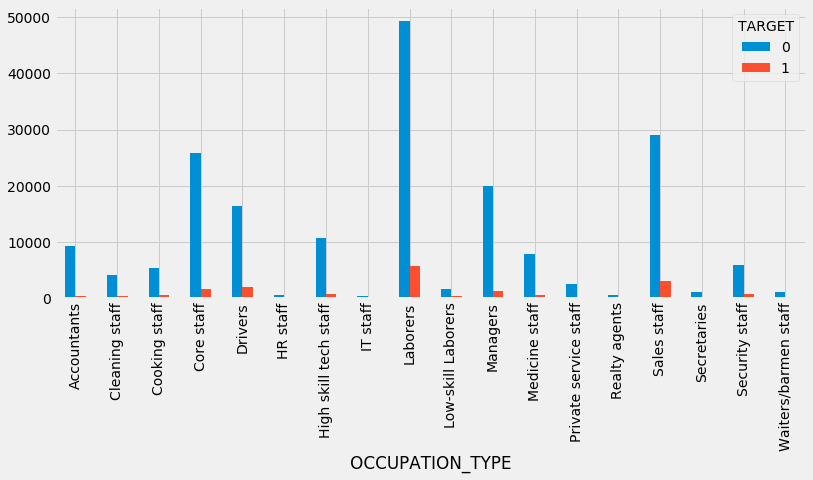

In [26]:
# Barplot between x = OCCUPATION_TYPE and y =TARGET column

plt.rcParams['figure.figsize'] = (12, 5)
plt.style.use('fivethirtyeight')

pd.crosstab(data.OCCUPATION_TYPE, data.TARGET).plot(kind= 'bar')
plt.show()

#### From this we can infer that client from Laborers shows higher in 1 - Client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample and 0 - all other cases
* It will be wrong to assume that to impute all null values with Laborers because lot of Pensioner were there which has missing values in OCCUPATION_TYPE and also due to high percentage of null values better to drop OCCUPATION_TYPE column. 

In [27]:
# so we will drop OCCUPATION_TYPE
data = data.drop('OCCUPATION_TYPE',axis=1)

In [28]:
# showing only column-wise Null value in detail from highest to lowest in percentage

all_data_na = (data.isnull().sum() / len(data)) * 100

# finding null value containing column by droping all non-null containing column
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False) 

missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data

Missing Ratio
EXT_SOURCE_3                    19.825307
AMT_REQ_CREDIT_BUREAU_YEAR      13.501631
AMT_REQ_CREDIT_BUREAU_MON       13.501631
AMT_REQ_CREDIT_BUREAU_WEEK      13.501631
AMT_REQ_CREDIT_BUREAU_DAY       13.501631
AMT_REQ_CREDIT_BUREAU_HOUR      13.501631
AMT_REQ_CREDIT_BUREAU_QRT       13.501631
NAME_TYPE_SUITE                  0.420148
OBS_30_CNT_SOCIAL_CIRCLE         0.332021
OBS_60_CNT_SOCIAL_CIRCLE         0.332021
DEF_30_CNT_SOCIAL_CIRCLE         0.332021
DEF_60_CNT_SOCIAL_CIRCLE         0.332021
EXT_SOURCE_2                     0.214626
AMT_GOODS_PRICE                  0.090403
AMT_ANNUITY                      0.003902
CNT_FAM_MEMBERS                  0.000650
DAYS_LAST_PHONE_CHANGE           0.000325

###  Drop unecessary rows using columns with high Null percentages
##### Now, on inspection we might notice that some columns have large percentage (greater than 10%) of Null values. Drop all the rows which have Null values for such columns.

In [29]:
# code for dropping the rows here
data = data[~np.isnan(data['EXT_SOURCE_3'])]

In [30]:
data.shape

(246546, 72)

In [31]:
# showing only column-wise Null value in detail from highest to lowest in percentage

all_data_na = (data.isnull().sum() / len(data)) * 100

# finding null value containing column by droping all non-null containing column
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False) 

missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data

Missing Ratio
NAME_TYPE_SUITE                0.437241
DEF_60_CNT_SOCIAL_CIRCLE       0.303797
OBS_60_CNT_SOCIAL_CIRCLE       0.303797
DEF_30_CNT_SOCIAL_CIRCLE       0.303797
OBS_30_CNT_SOCIAL_CIRCLE       0.303797
EXT_SOURCE_2                   0.174410
AMT_GOODS_PRICE                0.085177
AMT_ANNUITY                    0.004462
CNT_FAM_MEMBERS                0.000406

In [32]:
# checking NAME_TYPE_SUITE column 
data.NAME_TYPE_SUITE.value_counts()

Unaccompanied      200221
Family              31759
Spouse, partner      8768
Children             2551
Other_B              1323
Other_A               637
Group of people       209
Name: NAME_TYPE_SUITE, dtype: int64

#### Fill nan values
* We might notice that the NAME_TYPE_SUITE column has some NaN values. 
* Here, on inspection, we will see that it is safe to replace all the missing values with 'Unaccompanied'.

In [33]:
# convert to type 'category'
data['NAME_TYPE_SUITE'] = data['NAME_TYPE_SUITE'].astype('category')

In [34]:
# inputing NaN values by 'Unaccompanied'
data.loc[pd.isnull(data['NAME_TYPE_SUITE']),['NAME_TYPE_SUITE']] = 'Unaccompanied'

In [35]:
# showing only column-wise Null value in detail from highest to lowest in percentage

all_data_na = (data.isnull().sum() / len(data)) * 100

# finding null value containing column by droping all non-null containing column
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False) 

missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data

Missing Ratio
DEF_60_CNT_SOCIAL_CIRCLE       0.303797
OBS_60_CNT_SOCIAL_CIRCLE       0.303797
DEF_30_CNT_SOCIAL_CIRCLE       0.303797
OBS_30_CNT_SOCIAL_CIRCLE       0.303797
EXT_SOURCE_2                   0.174410
AMT_GOODS_PRICE                0.085177
AMT_ANNUITY                    0.004462
CNT_FAM_MEMBERS                0.000406

In [36]:
# lets check the data types of the columns, where missing values occur
data.dtypes[data.isnull().any()]

AMT_ANNUITY                 float64
AMT_GOODS_PRICE             float64
CNT_FAM_MEMBERS             float64
EXT_SOURCE_2                float64
OBS_30_CNT_SOCIAL_CIRCLE    float64
DEF_30_CNT_SOCIAL_CIRCLE    float64
OBS_60_CNT_SOCIAL_CIRCLE    float64
DEF_60_CNT_SOCIAL_CIRCLE    float64
dtype: object

##### Checking AMT_ANNUITY column

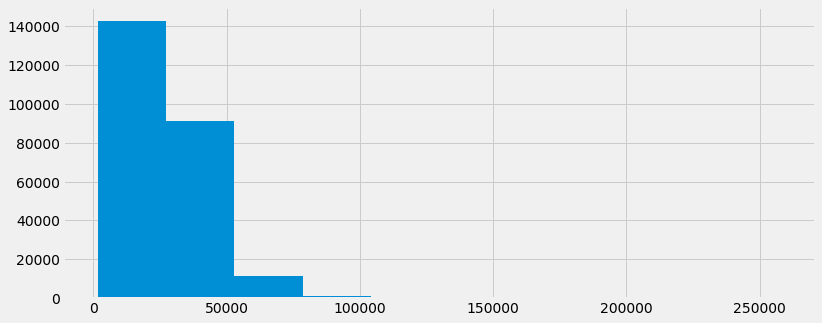

In [37]:
#plot the histogram of AMT_ANNUITY variable.
data.AMT_ANNUITY.hist()
plt.show()

##### we can see from histogram that it is positive scewed. So, it is better to fill NaN values with Median

In [38]:
# lets perform numerical imputation for the column AMT_ANNUITY
data['AMT_ANNUITY'] = data['AMT_ANNUITY'].fillna(data['AMT_ANNUITY'].median())

In [39]:
# lets check the data types of the columns, where missing values occur
data.dtypes[data.isnull().any()]

AMT_GOODS_PRICE             float64
CNT_FAM_MEMBERS             float64
EXT_SOURCE_2                float64
OBS_30_CNT_SOCIAL_CIRCLE    float64
DEF_30_CNT_SOCIAL_CIRCLE    float64
OBS_60_CNT_SOCIAL_CIRCLE    float64
DEF_60_CNT_SOCIAL_CIRCLE    float64
dtype: object

####  Checking AMT_GOODS_PRICE column

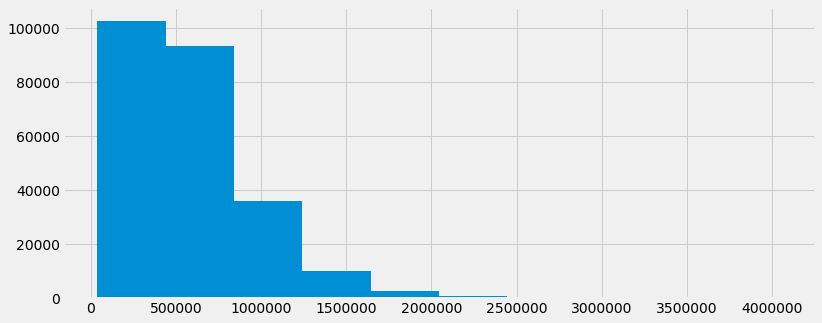

In [40]:
#plot the histogram of AMT_GOODS_PRICE variable.
data.AMT_GOODS_PRICE.hist()
plt.show()

#### we can see from histogram that it is positive scewed. So, it is better to fill NaN values with Median

In [41]:
# lets perform numerical imputation for the column AMT_GOODS_PRICE
data['AMT_GOODS_PRICE'] = data['AMT_GOODS_PRICE'].fillna(data['AMT_GOODS_PRICE'].median())

In [42]:
# lets check the data types of the columns, where missing values occur
data.dtypes[data.isnull().any()]

CNT_FAM_MEMBERS             float64
EXT_SOURCE_2                float64
OBS_30_CNT_SOCIAL_CIRCLE    float64
DEF_30_CNT_SOCIAL_CIRCLE    float64
OBS_60_CNT_SOCIAL_CIRCLE    float64
DEF_60_CNT_SOCIAL_CIRCLE    float64
dtype: object

##### Checking CNT_FAM_MEMBERS column

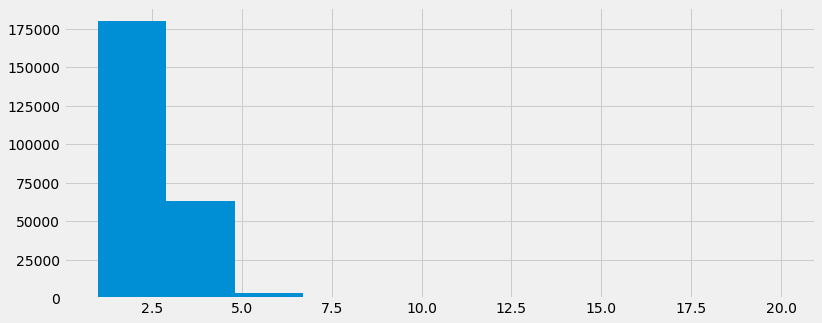

In [43]:
#plot the histogram of CNT_FAM_MEMBERS variable.
data.CNT_FAM_MEMBERS.hist()
plt.show()

##### we can see from histogram that it is positive scewed. So, it is better to fill NaN values with Median

In [44]:
# lets perform numerical imputation for the column CNT_FAM_MEMBERS
data['CNT_FAM_MEMBERS'] = data['CNT_FAM_MEMBERS'].fillna(data['CNT_FAM_MEMBERS'].median())

In [45]:
# lets check the data types of the columns, where missing values occur
data.dtypes[data.isnull().any()]

EXT_SOURCE_2                float64
OBS_30_CNT_SOCIAL_CIRCLE    float64
DEF_30_CNT_SOCIAL_CIRCLE    float64
OBS_60_CNT_SOCIAL_CIRCLE    float64
DEF_60_CNT_SOCIAL_CIRCLE    float64
dtype: object

##### Checking EXT_SOURCE_2 column

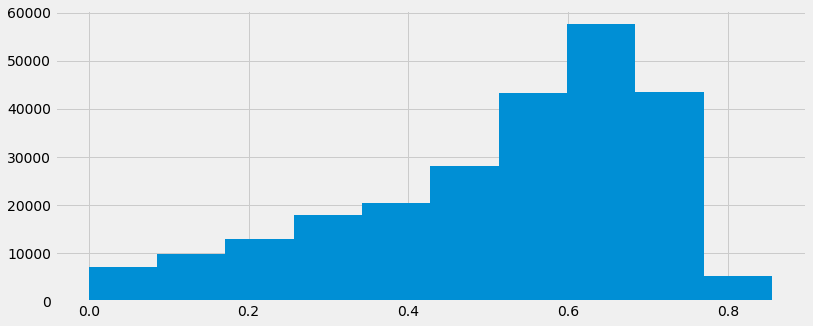

In [46]:
#plot the histogram of EXT_SOURCE_2 variable.
data.EXT_SOURCE_2.hist()
plt.show()

##### we can see from histogram that it is negative scewed. So, it is better to fill NaN values with Median

In [47]:
# lets perform numerical imputation for the column EXT_SOURCE_2
data['EXT_SOURCE_2'] = data['EXT_SOURCE_2'].fillna(data['EXT_SOURCE_2'].median())

In [48]:
# lets check the data types of the columns, where missing values occur
data.dtypes[data.isnull().any()]

OBS_30_CNT_SOCIAL_CIRCLE    float64
DEF_30_CNT_SOCIAL_CIRCLE    float64
OBS_60_CNT_SOCIAL_CIRCLE    float64
DEF_60_CNT_SOCIAL_CIRCLE    float64
dtype: object

##### Checking OBS_30_CNT_SOCIAL_CIRCLE column

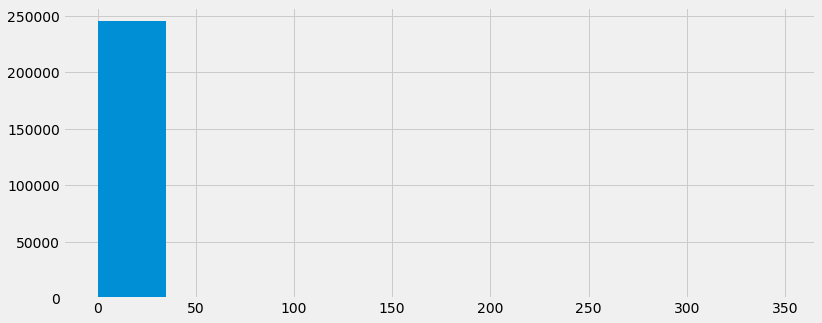

In [49]:
#plot the histogram of OBS_30_CNT_SOCIAL_CIRCLE variable.
data.OBS_30_CNT_SOCIAL_CIRCLE.hist()
plt.show()

#### by ploting get difficult to infer. So we can see its value_counts()

In [50]:
data.OBS_30_CNT_SOCIAL_CIRCLE.value_counts()

0.0      130377
1.0       39444
2.0       24048
3.0       16537
4.0       11451
5.0        7789
6.0        5255
7.0        3580
8.0        2381
9.0        1619
10.0       1126
11.0        657
12.0        513
13.0        331
14.0        206
15.0        135
16.0        108
17.0         68
19.0         37
18.0         36
21.0         23
20.0         19
22.0         18
23.0          9
25.0          9
24.0          9
27.0          5
30.0          2
28.0          1
348.0         1
47.0          1
29.0          1
26.0          1
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: int64

##### In this column it shows {How many observation of client's social surroundings with observable 30 DPD (days past due) default}
* Though the value of Zero is very high in number. So it is better to replace the missing values with mode 0 

In [51]:
data['OBS_30_CNT_SOCIAL_CIRCLE'] = data['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(0)

In [52]:
# lets check the data types of the columns, where missing values occur
data.dtypes[data.isnull().any()]

DEF_30_CNT_SOCIAL_CIRCLE    float64
OBS_60_CNT_SOCIAL_CIRCLE    float64
DEF_60_CNT_SOCIAL_CIRCLE    float64
dtype: object

##### Checking DEF_30_CNT_SOCIAL_CIRCLE column

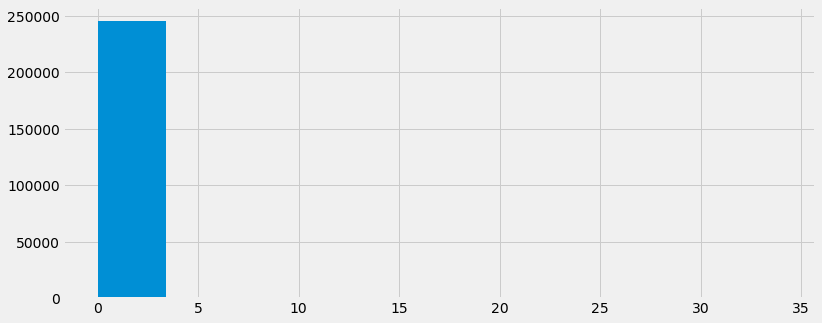

In [53]:
#plot the histogram of DEF_30_CNT_SOCIAL_CIRCLE variable.
data.DEF_30_CNT_SOCIAL_CIRCLE.hist()
plt.show()

#### by ploting get difficult to infer. So we can see its value_counts()

In [54]:
data.DEF_30_CNT_SOCIAL_CIRCLE.value_counts()

0.0     217350
1.0      22972
2.0       4265
3.0        960
4.0        192
5.0         48
6.0          7
7.0          1
8.0          1
34.0         1
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: int64

##### In this column it shows {How many observation of client's social surroundings defaulted on 30 DPD (days past due)}
* Though the value of Zero is very high in number. So it is better to replace the missing values with mode 0 

In [55]:
data['DEF_30_CNT_SOCIAL_CIRCLE'] = data['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(0)

In [56]:
# lets check the data types of the columns, where missing values occur
data.dtypes[data.isnull().any()]

OBS_60_CNT_SOCIAL_CIRCLE    float64
DEF_60_CNT_SOCIAL_CIRCLE    float64
dtype: object

##### Checking OBS_60_CNT_SOCIAL_CIRCLE column

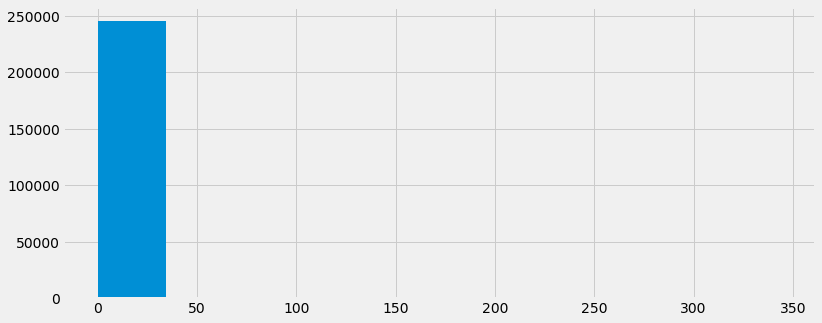

In [57]:
#plot the histogram of OBS_60_CNT_SOCIAL_CIRCLE variable.
data.OBS_60_CNT_SOCIAL_CIRCLE.hist()
plt.show()

#### by ploting get difficult to infer. So we can see its value_counts()

In [58]:
data.OBS_60_CNT_SOCIAL_CIRCLE.value_counts()

0.0      130993
1.0       39479
2.0       24033
3.0       16445
4.0       11311
5.0        7711
6.0        5172
7.0        3542
8.0        2323
9.0        1576
10.0       1094
11.0        642
12.0        491
13.0        323
14.0        189
15.0        138
16.0        106
17.0         57
18.0         41
19.0         37
21.0         22
20.0         19
22.0         14
23.0         10
24.0          9
25.0          9
27.0          5
29.0          2
30.0          1
28.0          1
47.0          1
344.0         1
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: int64

##### In this column it shows {How many observation of client's social surroundings with observable 60 DPD (days past due) default}
* Though the value of Zero is very high in number. So it is better to replace the missing values with mode 0 

In [59]:
data['OBS_60_CNT_SOCIAL_CIRCLE'] = data['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(0)

In [60]:
# lets check the data types of the columns, where missing values occur
data.dtypes[data.isnull().any()]

DEF_60_CNT_SOCIAL_CIRCLE    float64
dtype: object

##### Checking DEF_60_CNT_SOCIAL_CIRCLE column

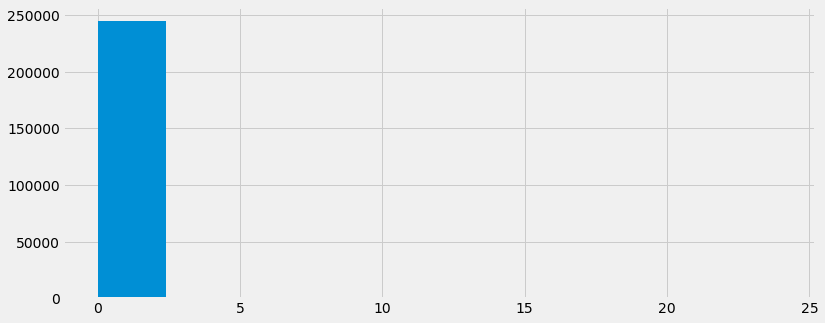

In [61]:
#plot the histogram of DEF_60_CNT_SOCIAL_CIRCLE variable.
data.DEF_60_CNT_SOCIAL_CIRCLE.hist()
plt.show()

#### by ploting get difficult to infer. So we can see its value_counts()

In [62]:
data.DEF_60_CNT_SOCIAL_CIRCLE.value_counts()

0.0     225064
1.0      17591
2.0       2546
3.0        469
4.0        105
5.0         18
6.0          2
7.0          1
24.0         1
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: int64

##### In this column it shows {How many observation of client's social surroundings defaulted on 60 (days past due) DPD}
* Though the value of Zero is very high in number. So it is better to replace the missing values with mode 0 

In [63]:
data['DEF_60_CNT_SOCIAL_CIRCLE'] = data['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(0)

#### Checking missing values

In [64]:
# showing only column-wise Null value in detail from highest to lowest in percentage

all_data_na = (data.isnull().sum() / len(data)) * 100

# finding null value containing column by droping all non-null containing column
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False) 

missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data

Empty DataFrame
Columns: [Missing Ratio]
Index: []

#### None are there. 

In [65]:
round(100*(data.isnull().sum(axis=0)/len(data.index)),2)

SK_ID_CURR                     0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
FLAG_OWN_REALTY                0.0
CNT_CHILDREN                   0.0
AMT_INCOME_TOTAL               0.0
AMT_CREDIT                     0.0
AMT_ANNUITY                    0.0
AMT_GOODS_PRICE                0.0
NAME_TYPE_SUITE                0.0
NAME_INCOME_TYPE               0.0
NAME_EDUCATION_TYPE            0.0
NAME_FAMILY_STATUS             0.0
NAME_HOUSING_TYPE              0.0
REGION_POPULATION_RELATIVE     0.0
DAYS_BIRTH                     0.0
DAYS_EMPLOYED                  0.0
DAYS_REGISTRATION              0.0
DAYS_ID_PUBLISH                0.0
FLAG_MOBIL                     0.0
FLAG_EMP_PHONE                 0.0
FLAG_WORK_PHONE                0.0
FLAG_CONT_MOBILE               0.0
FLAG_PHONE                     0.0
FLAG_EMAIL                     0.0
CNT_FAM_MEMBERS                0.0
REGION_RATING_CLIENT

#### Check number of retained rows

In [66]:
data.count()

SK_ID_CURR                     246546
TARGET                         246546
NAME_CONTRACT_TYPE             246546
CODE_GENDER                    246546
FLAG_OWN_CAR                   246546
FLAG_OWN_REALTY                246546
CNT_CHILDREN                   246546
AMT_INCOME_TOTAL               246546
AMT_CREDIT                     246546
AMT_ANNUITY                    246546
AMT_GOODS_PRICE                246546
NAME_TYPE_SUITE                246546
NAME_INCOME_TYPE               246546
NAME_EDUCATION_TYPE            246546
NAME_FAMILY_STATUS             246546
NAME_HOUSING_TYPE              246546
REGION_POPULATION_RELATIVE     246546
DAYS_BIRTH                     246546
DAYS_EMPLOYED                  246546
DAYS_REGISTRATION              246546
DAYS_ID_PUBLISH                246546
FLAG_MOBIL                     246546
FLAG_EMP_PHONE                 246546
FLAG_WORK_PHONE                246546
FLAG_CONT_MOBILE               246546
FLAG_PHONE                     246546
FLAG_EMAIL  

In [67]:
data.shape

(246546, 72)

In [68]:
# check number of retained rows:
len(data.index)/307511

0.8017469293781361

* The retained row came to be 80%

### Handing Outliers

In [69]:
# lets first check the shape of the data
data.shape

(246546, 72)

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246546 entries, 0 to 307510
Data columns (total 72 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   246546 non-null  int64   
 1   TARGET                       246546 non-null  int64   
 2   NAME_CONTRACT_TYPE           246546 non-null  object  
 3   CODE_GENDER                  246546 non-null  object  
 4   FLAG_OWN_CAR                 246546 non-null  object  
 5   FLAG_OWN_REALTY              246546 non-null  object  
 6   CNT_CHILDREN                 246546 non-null  int64   
 7   AMT_INCOME_TOTAL             246546 non-null  float64 
 8   AMT_CREDIT                   246546 non-null  float64 
 9   AMT_ANNUITY                  246546 non-null  float64 
 10  AMT_GOODS_PRICE              246546 non-null  float64 
 11  NAME_TYPE_SUITE              246546 non-null  category
 12  NAME_INCOME_TYPE             246546 non-null

#### Lets check the skewness of dtypes: int64 

In [71]:
# lets check the skewness of the data

from scipy.stats import skew

# lets select only the numerical features present inside the data
numerical_feats = data.dtypes[data.dtypes == 'int64'].index

# checking the skewness in all the numerical features
skewed_feats = data[numerical_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending = False)

# converting the features into a dataframe
skewness = pd.DataFrame({'skew':skewed_feats})

# checking the head of skewness dataset
skewness.head(41)

skew
FLAG_DOCUMENT_12             351.098277
FLAG_DOCUMENT_10             187.664214
FLAG_DOCUMENT_4              111.014864
FLAG_DOCUMENT_7               75.700912
FLAG_DOCUMENT_17              58.089093
FLAG_DOCUMENT_21              55.487164
FLAG_DOCUMENT_20              40.504822
FLAG_DOCUMENT_19              39.974350
FLAG_DOCUMENT_15              27.703024
FLAG_DOCUMENT_14              17.717233
FLAG_DOCUMENT_11              17.189683
FLAG_DOCUMENT_9               16.441906
FLAG_DOCUMENT_13              15.973955
FLAG_DOCUMENT_18              10.688498
FLAG_DOCUMENT_16               9.611775
REG_REGION_NOT_LIVE_REGION     8.226673
FLAG_DOCUMENT_5                7.969038
LIVE_REGION_NOT_WORK_REGION    4.725245
REG_REGION_NOT_WORK_REGION     4.185500
FLAG_EMAIL                     3.767171
REG_CITY_NOT_LIVE_CITY         3.235925
TARGET                         3.155949
FLAG_DOCUMENT_8                3.063210
FLAG_DOCUMENT_6                2.910330
CNT_CHILDREN                   1.923127
LIVE_CITY_NOT_WORK_CITY        1.692919
DAYS_EMPLOYED                  1.667548
FLAG_WORK_PHONE                1.506549
REG_CITY_NOT_WORK_CITY         1.316016
FLAG_PHONE                     0.937845
DAYS_ID_PUBLISH                0.390151
REGION_RATING_CLIENT           0.102385
REGION_RATING_CLIENT_W_CITY    0.072136
FLAG_MOBIL                     0.000000
FLAG_DOCUMENT_2                0.000000
SK_ID_CURR                    -0.000918
HOUR_APPR_PROCESS_START       -0.019593
DAYS_BIRTH                    -0.111578
FLAG_DOCUMENT_3               -0.946193
FLAG_EMP_PHONE                -1.668154
FLAG_CONT_MOBILE             -22.433381

* I wanted to identify which column is continuous and which is categorical

In [72]:
# Look at the number of unique categries in a column
data.nunique().sort_values()

FLAG_DOCUMENT_2                     1
FLAG_MOBIL                          1
REG_CITY_NOT_LIVE_CITY              2
FLAG_PHONE                          2
FLAG_DOCUMENT_8                     2
FLAG_DOCUMENT_16                    2
REG_REGION_NOT_LIVE_REGION          2
REG_REGION_NOT_WORK_REGION          2
LIVE_REGION_NOT_WORK_REGION         2
REG_CITY_NOT_WORK_CITY              2
LIVE_CITY_NOT_WORK_CITY             2
FLAG_DOCUMENT_15                    2
FLAG_DOCUMENT_14                    2
FLAG_DOCUMENT_12                    2
FLAG_DOCUMENT_11                    2
FLAG_DOCUMENT_10                    2
FLAG_DOCUMENT_3                     2
FLAG_DOCUMENT_4                     2
FLAG_DOCUMENT_5                     2
FLAG_DOCUMENT_6                     2
FLAG_DOCUMENT_7                     2
FLAG_DOCUMENT_13                    2
FLAG_CONT_MOBILE                    2
FLAG_EMAIL                          2
FLAG_EMP_PHONE                      2
TARGET                              2
NAME_CONTRAC

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246546 entries, 0 to 307510
Data columns (total 72 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   246546 non-null  int64   
 1   TARGET                       246546 non-null  int64   
 2   NAME_CONTRACT_TYPE           246546 non-null  object  
 3   CODE_GENDER                  246546 non-null  object  
 4   FLAG_OWN_CAR                 246546 non-null  object  
 5   FLAG_OWN_REALTY              246546 non-null  object  
 6   CNT_CHILDREN                 246546 non-null  int64   
 7   AMT_INCOME_TOTAL             246546 non-null  float64 
 8   AMT_CREDIT                   246546 non-null  float64 
 9   AMT_ANNUITY                  246546 non-null  float64 
 10  AMT_GOODS_PRICE              246546 non-null  float64 
 11  NAME_TYPE_SUITE              246546 non-null  category
 12  NAME_INCOME_TYPE             246546 non-null

#### Changing those integer column which meant to be object type.
* Because it's value contain either 1 or 0. So, it has to be categorical type 

In [74]:
data['FLAG_DOCUMENT_12'] = data['FLAG_DOCUMENT_12'].astype(object)
data['FLAG_DOCUMENT_10'] = data['FLAG_DOCUMENT_10'].astype(object)
data['FLAG_DOCUMENT_4'] = data['FLAG_DOCUMENT_4'].astype(object)
data['FLAG_DOCUMENT_7'] = data['FLAG_DOCUMENT_7'].astype(object)
data['FLAG_DOCUMENT_17'] = data['FLAG_DOCUMENT_17'].astype(object)
data['FLAG_DOCUMENT_21'] = data['FLAG_DOCUMENT_21'].astype(object)
data['FLAG_DOCUMENT_20'] = data['FLAG_DOCUMENT_20'].astype(object)
data['FLAG_DOCUMENT_19'] = data['FLAG_DOCUMENT_19'].astype(object)
data['FLAG_DOCUMENT_15'] = data['FLAG_DOCUMENT_15'].astype(object)
data['FLAG_DOCUMENT_11'] = data['FLAG_DOCUMENT_11'].astype(object)
data['FLAG_DOCUMENT_14'] = data['FLAG_DOCUMENT_14'].astype(object)
data['FLAG_DOCUMENT_9'] = data['FLAG_DOCUMENT_9'].astype(object)
data['FLAG_DOCUMENT_13'] = data['FLAG_DOCUMENT_13'].astype(object)
data['FLAG_DOCUMENT_18'] = data['FLAG_DOCUMENT_18'].astype(object)
data['FLAG_DOCUMENT_16'] = data['FLAG_DOCUMENT_16'].astype(object)
data['REG_REGION_NOT_LIVE_REGION'] = data['REG_REGION_NOT_LIVE_REGION'].astype(object)
data['FLAG_DOCUMENT_5'] = data['FLAG_DOCUMENT_5'].astype(object)
data['LIVE_REGION_NOT_WORK_REGION'] = data['LIVE_REGION_NOT_WORK_REGION'].astype(object)
data['REG_REGION_NOT_WORK_REGION'] = data['REG_REGION_NOT_WORK_REGION'].astype(object)
data['FLAG_EMAIL'] = data['FLAG_EMAIL'].astype(object)
data['REG_CITY_NOT_LIVE_CITY'] = data['REG_CITY_NOT_LIVE_CITY'].astype(object)
data['TARGET'] = data['TARGET'].astype(object)
data['FLAG_DOCUMENT_6'] = data['FLAG_DOCUMENT_6'].astype(object)
data['FLAG_DOCUMENT_8'] = data['FLAG_DOCUMENT_8'].astype(object)
data['LIVE_CITY_NOT_WORK_CITY'] = data['LIVE_CITY_NOT_WORK_CITY'].astype(object)
data['FLAG_WORK_PHONE'] = data['FLAG_WORK_PHONE'].astype(object)
data['REG_CITY_NOT_WORK_CITY'] = data['REG_CITY_NOT_WORK_CITY'].astype(object)
data['FLAG_PHONE'] = data['FLAG_PHONE'].astype(object)
data['FLAG_EMP_PHONE'] = data['FLAG_EMP_PHONE'].astype(object)
data['FLAG_DOCUMENT_3'] = data['FLAG_DOCUMENT_3'].astype(object)
data['FLAG_CONT_MOBILE'] = data['FLAG_CONT_MOBILE'].astype(object)

data['REGION_RATING_CLIENT_W_CITY'] = data['REGION_RATING_CLIENT_W_CITY'].astype(object)
data['REGION_RATING_CLIENT'] = data['REGION_RATING_CLIENT'].astype(object)
data['CNT_FAM_MEMBERS'] = data['CNT_FAM_MEMBERS'].astype(object)
data['FLAG_CONT_MOBILE'] = data['FLAG_CONT_MOBILE'].astype(object)
data['FLAG_CONT_MOBILE'] = data['FLAG_CONT_MOBILE'].astype(object)
data['FLAG_CONT_MOBILE'] = data['FLAG_CONT_MOBILE'].astype(object)
data['FLAG_CONT_MOBILE'] = data['FLAG_CONT_MOBILE'].astype(object)
data['FLAG_CONT_MOBILE'] = data['FLAG_CONT_MOBILE'].astype(object)

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246546 entries, 0 to 307510
Data columns (total 72 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   246546 non-null  int64   
 1   TARGET                       246546 non-null  object  
 2   NAME_CONTRACT_TYPE           246546 non-null  object  
 3   CODE_GENDER                  246546 non-null  object  
 4   FLAG_OWN_CAR                 246546 non-null  object  
 5   FLAG_OWN_REALTY              246546 non-null  object  
 6   CNT_CHILDREN                 246546 non-null  int64   
 7   AMT_INCOME_TOTAL             246546 non-null  float64 
 8   AMT_CREDIT                   246546 non-null  float64 
 9   AMT_ANNUITY                  246546 non-null  float64 
 10  AMT_GOODS_PRICE              246546 non-null  float64 
 11  NAME_TYPE_SUITE              246546 non-null  category
 12  NAME_INCOME_TYPE             246546 non-null

### Changing negative values into absolute in DAYS_BIRTH column

In [76]:
# Column represent Client's age in days at the time of application
data.DAYS_BIRTH.value_counts()

-13749    39
-18248    37
-14276    36
-13263    36
-15565    35
          ..
-24244     1
-25082     1
-7738      1
-25143     1
-25142     1
Name: DAYS_BIRTH, Length: 17369, dtype: int64

In [77]:
data.DAYS_BIRTH=data.DAYS_BIRTH.apply(lambda x: np.abs(x))

In [78]:
# Again check the Client's age in days at the time of application
data.DAYS_BIRTH.value_counts()

13749    39
18248    37
14276    36
13263    36
12806    35
         ..
25047     1
25002     1
25130     1
23888     1
25048     1
Name: DAYS_BIRTH, Length: 17369, dtype: int64

* Now it will give better result while performing analysis.

In [79]:
# lets check the skewness of the data

from scipy.stats import skew

# lets select only the numerical features present inside the data
numerical_feats = data.dtypes[data.dtypes == 'int64'].index

# checking the skewness in all the numerical features
skewed_feats = data[numerical_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending = False)

# converting the features into a dataframe
skewness = pd.DataFrame({'skew':skewed_feats})

# checking the head of skewness dataset
skewness.head(100)

skew
CNT_CHILDREN             1.923127
DAYS_EMPLOYED            1.667548
DAYS_ID_PUBLISH          0.390151
DAYS_BIRTH               0.111578
FLAG_DOCUMENT_2          0.000000
FLAG_MOBIL               0.000000
SK_ID_CURR              -0.000918
HOUR_APPR_PROCESS_START -0.019593

### Analyzing and Interpreting the Skewness Values 

* If skewness is less than −1 or greater than +1, the distribution is highly skewed.
* If skewness is between −1 and −½ or between +½ and +1, the distribution is moderately skewed.
* If skewness is between −½ and +½, the distribution is approximately symmetric.

* We can see that there are two columns which are Highly Skewed giving us a Hint that there would be Outliers
* To confirm that we will check the Box Plots for these Columns to become sure about the Outliers

#### CNT_CHILDREN column

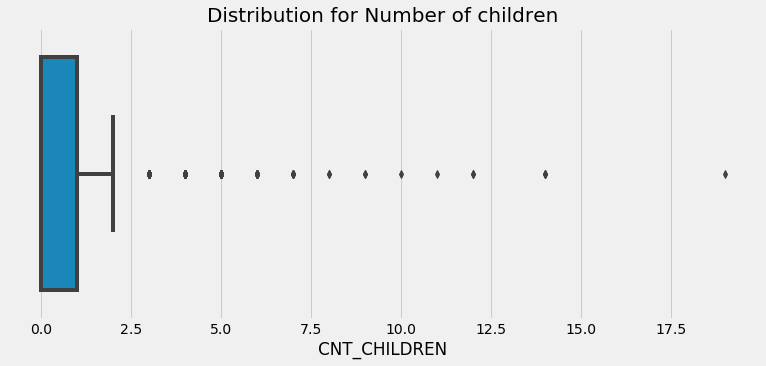

In [80]:
# lets check the Outliers of the CNT_CHILDREN Columns
sns.boxplot(data['CNT_CHILDREN'])
plt.title('Distribution for Number of children', fontsize = 20)
plt.show()

* After Looking at the Box plot, It become clear that there are Outliers, and these outliers are also important to be treated for a better predictive model.

In [81]:
data.CNT_CHILDREN.quantile([0.1,0.2,0.25,0.5,0.7,0.8,0.9,0.95,0.99,1])

0.10     0.0
0.20     0.0
0.25     0.0
0.50     0.0
0.70     1.0
0.80     1.0
0.90     2.0
0.95     2.0
0.99     3.0
1.00    19.0
Name: CNT_CHILDREN, dtype: float64

In [82]:
data[data.CNT_CHILDREN>6]

SK_ID_CURR TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
3079        103596      0         Cash loans           M            N   
12615       114709      0         Cash loans           M            Y   
23881       127782      1         Cash loans           F            N   
26195       130468      0         Cash loans           F            Y   
34545       140032      1         Cash loans           M            Y   
80948       193853      0         Cash loans           F            N   
132585      253779      0         Cash loans           F            N   
154317      278853      0         Cash loans           F            Y   
171125      298322      0    Revolving loans           F            N   
176011      303956      0         Cash loans           M            Y   
183878      313127      0         Cash loans           F            Y   
190547      320933      0         Cash loans           M            N   
220134      355015      0         Cash loans           F            N   
233611      370590      0         Cash loans           M            N   
265784      407877      0         Cash loans           F            N   
267998      410527      0         Cash loans           F            N   
276768      420739      1         Cash loans           M            Y   
305112      453499      0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
3079                 Y             7           85500.0    411813.0   
12615                N             8          112500.0    755190.0   
23881                N             9          180000.0    640080.0   
26195                Y             7          180000.0   1288350.0   
34545                N            11          315000.0   1007761.5   
80948                Y            12          337500.0    746280.0   
132585               Y            10           67500.0     92655.0   
154317               Y             8          103500.0    239850.0   
171125               Y            12          225000.0    202500.0   
176011               Y            14          225000.0   1085058.0   
183878               N            14           45000.0    810000.0   
190547               N             7          202500.0    226422.0   
220134               N             7          157500.0    450000.0   
233611               Y             7          103500.0    110331.0   
265784               Y            19          112500.0    135000.0   
267998               N            14           54000.0    604152.0   
276768               N             9          270000.0    526491.0   
305112               N             7          112500.0    143910.0   

        AMT_ANNUITY  AMT_GOODS_PRICE  NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
3079        17577.0         355500.0    Unaccompanied  Commercial associate   
12615       29947.5         675000.0    Unaccompanied         State servant   
23881       31131.0         450000.0    Unaccompanied  Commercial associate   
26195       41692.5        1125000.0    Unaccompanied               Working   
34545       38515.5         927000.0    Unaccompanied               Working   
80948       59094.0         675000.0           Family  Commercial associate   
132585       5301.0          76500.0    Unaccompanied  Commercial associate   
154317      23719.5         225000.0           Family               Working   
171125      10125.0         202500.0           Family  Commercial associate   
176011      55530.0         891000.0         Children               Working   
183878      23814.0         810000.0    Unaccompanied             Pensioner   
190547      20893.5         189000.0  Spouse, partner               Working   
220134      21888.0         450000.0    Unaccompanied               Working   
233611      10876.5         103500.0    Unaccompanied  Commercial associate   
265784       8788.5         135000.0    Unaccompanied               Working   
267998      25596.0      

* value range on 6 as compare to 5 is less. 
* So, after checking that we are sure to remove outlier those are greater than 6

In [83]:
# we remove outlier those are grater than 6
data=data[data.CNT_CHILDREN<6]  # keeping those values which are less than 6

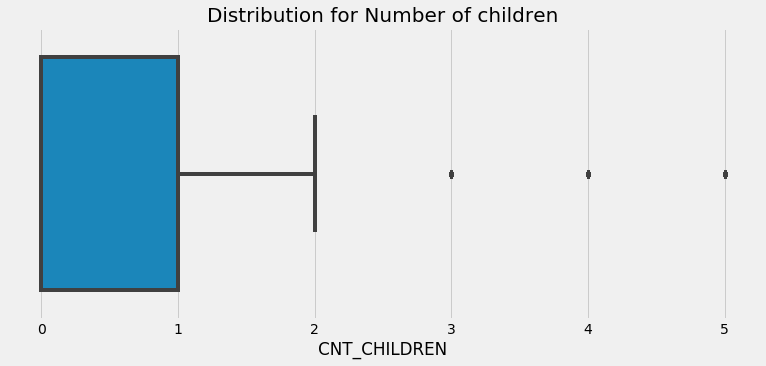

In [84]:
# lets check again the Outliers of the CNT_CHILDREN Columns
sns.boxplot(data['CNT_CHILDREN'])
plt.title('Distribution for Number of children', fontsize = 20)
plt.show()

* It's look fine.

In [85]:
data.shape

(246512, 72)

#### DAYS_EMPLOYED column

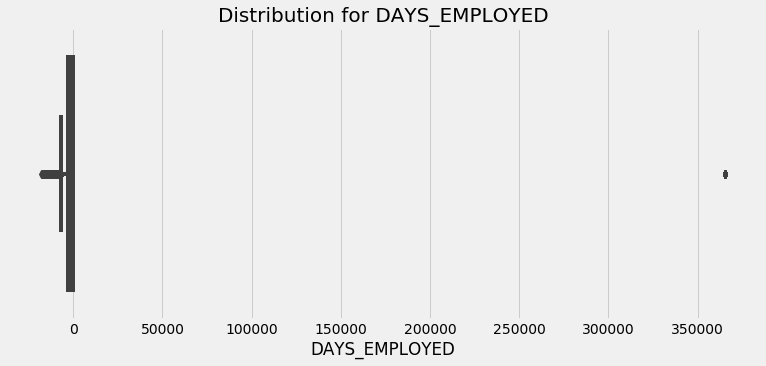

In [86]:
# checking the Outliers for DAYS_EMPLOYED
sns.boxplot(data['DAYS_EMPLOYED'])
plt.title('Distribution for DAYS_EMPLOYED', fontsize = 20)
plt.show()

* After Looking at the Box plot, It become clear that there are Outliers, and these outliers are also important to be treated for a better predictive model.

In [87]:
data.DAYS_EMPLOYED.value_counts()

 365243    44302
-199         131
-200         129
-230         121
-224         120
           ...  
-12012         1
-9963          1
-14057         1
-8733          1
-16343         1
Name: DAYS_EMPLOYED, Length: 12280, dtype: int64

* We need to keep this outlier because most of the values were of pension holder. 
* So, we will cap them instead of dropping. 
* we can assume that those pensioner who's number of working days after joining till retiredment is 0 

In [88]:
# Capping the outlier with 0
data.loc[(data['DAYS_EMPLOYED'] == 365243),'DAYS_EMPLOYED'] = 0

In [89]:
data.DAYS_EMPLOYED.value_counts()

 0        44304
-199        131
-200        129
-230        121
-224        120
          ...  
-15203        1
-13919        1
-11343        1
-11669        1
-11572        1
Name: DAYS_EMPLOYED, Length: 12279, dtype: int64

In [90]:
data.NAME_TYPE_SUITE.value_counts()

Unaccompanied      201273
Family              31753
Spouse, partner      8767
Children             2550
Other_B              1323
Other_A               637
Group of people       209
Name: NAME_TYPE_SUITE, dtype: int64

In [91]:
data.shape

(246512, 72)

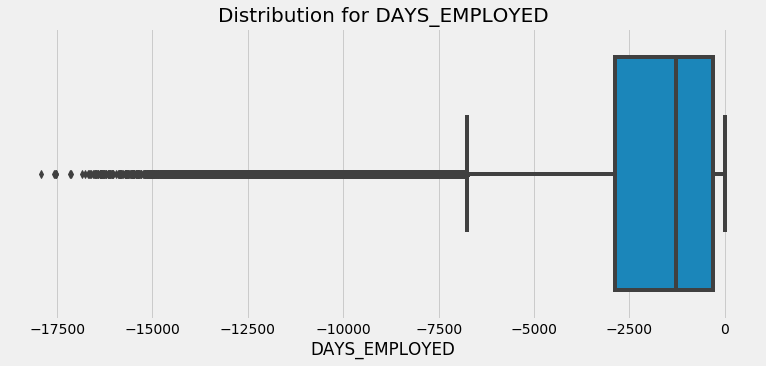

In [92]:
# checking again for the Outliers of DAYS_EMPLOYED
sns.boxplot(data['DAYS_EMPLOYED'])
plt.title('Distribution for DAYS_EMPLOYED', fontsize = 20)
plt.show()

* After Looking at the Box plot, It become clear that there are Outliers, and these outliers are also important to be treated for a better predictive model.

In [93]:
data[data.DAYS_EMPLOYED<-17200]

SK_ID_CURR TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
35191       140766      0         Cash loans           F            Y   
208899      342112      0         Cash loans           F            N   
234168      371247      0         Cash loans           F            N   
273069      416545      0         Cash loans           F            N   
280994      425566      0         Cash loans           F            Y   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
35191                Y             0          135000.0    284400.0   
208899               N             0          225000.0    247275.0   
234168               N             0          171000.0    284400.0   
273069               Y             0          135000.0    254700.0   
280994               Y             0          180000.0    225000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
35191       16011.0         225000.0   Unaccompanied               Working   
208899      17716.5         225000.0   Unaccompanied  Commercial associate   
234168      16456.5         225000.0   Unaccompanied               Working   
273069      14751.0         225000.0          Family         State servant   
280994      21919.5         225000.0   Unaccompanied               Working   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
35191   Secondary / secondary special                 Widow   
208899  Secondary / secondary special               Married   
234168  Secondary / secondary special               Married   
273069  Secondary / secondary special               Married   
280994  Secondary / secondary special  Single / not married   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
35191   House / apartment                    0.020246       24254   
208899  House / apartment                    0.024610       24460   
234168  House / apartment                    0.020713       24794   
273069  House / apartment                    0.024610       24468   
280994  House / apartment                    0.010643       24577   

        DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  \
35191          -17531            -1850.0            -4263           1   
208899         -17546           -11354.0            -4954           1   
234168         -17522            -2503.0            -3990           1   
273069         -17583            -9560.0            -4417           1   
280994         -17912            -4457.0            -4432           1   

       FLAG_EMP_PHONE FLAG_WORK_PHONE FLAG_CONT_MOBILE FLAG_PHONE FLAG_EMAIL  \
35191               1               0                1          1          0   
208899              1               0                1          1          0   
234168              1               0                1          0          0   
273069              1               0                1          1          0   
280994              1               0                1          0          0   

       CNT_FAM_MEMBERS REGION_RATING_CLIENT REGION_RATING_CLIENT_W_CITY  \
35191                1                    3                           3   
208899               2                    2                           2   
234168               2                    3                           3   
273069               2                    2                           2   
280994               1                    2                           2   

       WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
35191                      FRIDAY                        7   
208899                  WEDNESDAY                       15   
234168                     FRIDAY                       15   
273069                  WEDNESDAY                       14   
280994                     SUNDAY                       15   

       REG_REGION_NOT_LIVE_REGION REG_REGION_NOT_WORK_REGION  \
35191                           0                          0   
208899       

In [94]:
data.shape

(246512, 72)

In [95]:
# we remove outlier those are grater than -16852
data=data[data.DAYS_EMPLOYED > -16852]  # keeping those values which are less than -16852

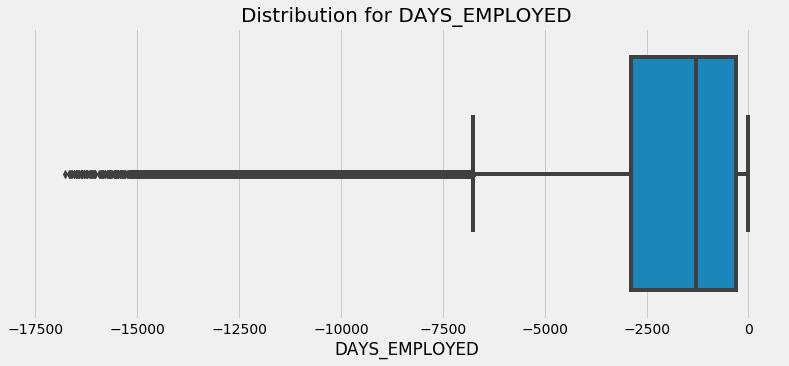

In [96]:
# checking again for the Outliers of DAYS_EMPLOYED
sns.boxplot(data['DAYS_EMPLOYED'])
plt.title('Distribution for DAYS_EMPLOYED', fontsize = 20)
plt.show()

* Outlier is removed and look fine.

In [97]:
data.shape

(246504, 72)

In [98]:
# lets check again the skewness of the data

from scipy.stats import skew

# lets select only the numerical features present inside the data
numerical_feats = data.dtypes[data.dtypes == 'int64'].index

# checking the skewness in all the numerical features
skewed_feats = data[numerical_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending = False)

# converting the features into a dataframe
skewness = pd.DataFrame({'skew':skewed_feats})

# checking the head of skewness dataset
skewness.head(100)

skew
CNT_CHILDREN             1.702369
DAYS_ID_PUBLISH          0.390060
DAYS_BIRTH               0.111469
FLAG_DOCUMENT_2          0.000000
FLAG_MOBIL               0.000000
SK_ID_CURR              -0.000893
HOUR_APPR_PROCESS_START -0.019572
DAYS_EMPLOYED           -1.972207

* After treating the outliers, we get to see that skewness of CNT_CHILDREN reduce form 1.923127 to 1.702369, but still there. We will leave that for know.
* And skewness of DAYS_EMPLOYED reduce from 1.667548 to -1.972207, but still there. We will leave that for know.

#### Lets check the skewness of dtypes: float64 

In [99]:
# lets check the skewness of the data

from scipy.stats import skew

# lets select only the numerical features present inside the data
numerical_feats = data.dtypes[data.dtypes == 'float64'].index

# checking the skewness in all the numerical features
skewed_feats = data[numerical_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending = False)

# converting the features into a dataframe
skewness = pd.DataFrame({'skew':skewed_feats})

# checking the head of skewness dataset
skewness.head(100)

skew
AMT_INCOME_TOTAL            383.484177
AMT_REQ_CREDIT_BUREAU_DAY    27.573417
AMT_REQ_CREDIT_BUREAU_HOUR   14.598592
OBS_30_CNT_SOCIAL_CIRCLE     14.167241
OBS_60_CNT_SOCIAL_CIRCLE     14.077367
AMT_REQ_CREDIT_BUREAU_WEEK    9.247778
AMT_REQ_CREDIT_BUREAU_MON     7.682132
DEF_60_CNT_SOCIAL_CIRCLE      5.480089
DEF_30_CNT_SOCIAL_CIRCLE      5.476113
AMT_REQ_CREDIT_BUREAU_QRT     2.663800
AMT_ANNUITY                   1.516857
REGION_POPULATION_RELATIVE    1.489254
AMT_GOODS_PRICE               1.316936
AMT_REQ_CREDIT_BUREAU_YEAR    1.226786
AMT_CREDIT                    1.206553
EXT_SOURCE_3                 -0.409363
DAYS_REGISTRATION            -0.584463
DAYS_LAST_PHONE_CHANGE       -0.645649
EXT_SOURCE_2                 -0.825578

#### AMT_INCOME_TOTAL column

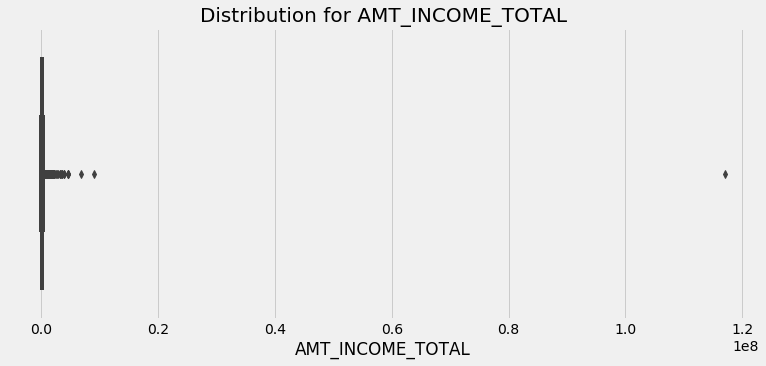

In [100]:
# checking for the Outliers of AMT_INCOME_TOTAL
sns.boxplot(data['AMT_INCOME_TOTAL'])
plt.title('Distribution for AMT_INCOME_TOTAL', fontsize = 20)
plt.show()

In [101]:
data.shape

(246504, 72)

In [102]:
# Dropping the outlier rows with Percentiles

upper_lim = data['AMT_INCOME_TOTAL'].quantile(.95)
lower_lim = data['AMT_INCOME_TOTAL'].quantile(.05)

data = data[(data['AMT_INCOME_TOTAL'] < upper_lim) & (data['AMT_INCOME_TOTAL'] > lower_lim)]

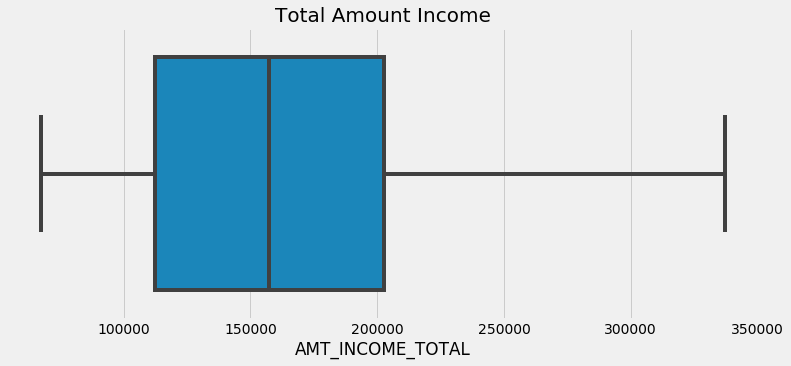

In [103]:
# checking again for the Outliers of AMT_INCOME_TOTAL
sns.boxplot(data['AMT_INCOME_TOTAL'])
plt.title('Total Amount Income', fontsize = 20)
plt.show()

* After droping the outlier rows with Percentiles we came to see that there are not outlier.

In [104]:
data.shape

(217785, 72)

#### AMT_REQ_CREDIT_BUREAU_DAY Column

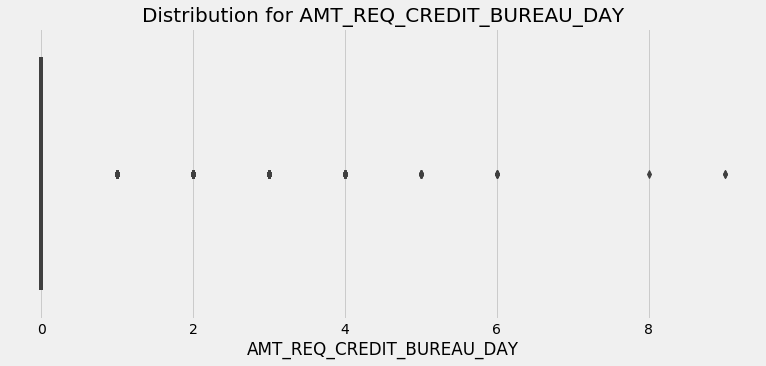

In [105]:
# checking for the Outliers of AMT_REQ_CREDIT_BUREAU_DAY
sns.boxplot(data['AMT_REQ_CREDIT_BUREAU_DAY'])
plt.title('Distribution for AMT_REQ_CREDIT_BUREAU_DAY', fontsize = 20)
plt.show()

* After Looking at the Box plot, It become clear that there are Outliers, and these outliers are also important to be treated for a better predictive model.

In [106]:
data.AMT_REQ_CREDIT_BUREAU_DAY.value_counts()

0.0    216563
1.0      1062
2.0        83
3.0        37
4.0        23
5.0         9
6.0         5
9.0         2
8.0         1
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64

In [107]:
data.AMT_REQ_CREDIT_BUREAU_DAY.quantile([0.1,0.2,0.25,0.5,0.7,0.8,0.9,0.95,0.99,1])

0.10    0.0
0.20    0.0
0.25    0.0
0.50    0.0
0.70    0.0
0.80    0.0
0.90    0.0
0.95    0.0
0.99    0.0
1.00    9.0
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

In [108]:
data[data.AMT_REQ_CREDIT_BUREAU_DAY > 4]

SK_ID_CURR TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
14881       117369      0         Cash loans           M            N   
20266       123647      0         Cash loans           F            Y   
51809       159997      0         Cash loans           F            N   
58685       168031      0         Cash loans           M            Y   
96290       211790      0         Cash loans           F            N   
110127      227725      0         Cash loans           F            Y   
126468      246671      0         Cash loans           M            Y   
126946      247218      0         Cash loans           F            N   
165196      291498      0         Cash loans           F            N   
170478      297582      0         Cash loans           M            Y   
177874      306132      0         Cash loans           F            N   
183941      313200      0         Cash loans           M            Y   
204001      336508      0         Cash loans           F            N   
207281      340255      0         Cash loans           F            N   
238129      375778      0         Cash loans           F            Y   
252278      391902      0         Cash loans           F            N   
302896      450931      0         Cash loans           M            Y   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
14881                Y             0          256500.0   1724220.0   
20266                Y             0          180000.0   1170000.0   
51809                N             1          126000.0    483480.0   
58685                N             2          247500.0    284400.0   
96290                N             0          202500.0    651600.0   
110127               N             0          270000.0    755190.0   
126468               Y             0          261000.0    855000.0   
126946               Y             0           81000.0    364896.0   
165196               N             0          135000.0   1334731.5   
170478               N             1          157500.0    472500.0   
177874               N             1           99000.0    225000.0   
183941               Y             0          202500.0    755190.0   
204001               N             0           85500.0    172692.0   
207281               N             0          202500.0    675000.0   
238129               Y             0          225000.0   1166724.0   
252278               N             0          180000.0    755190.0   
302896               N             0           99000.0    314100.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
14881       50544.0        1350000.0   Unaccompanied               Working   
20266       34209.0        1170000.0   Unaccompanied               Working   
51809       13986.0         382500.0   Unaccompanied  Commercial associate   
58685       15007.5         225000.0   Unaccompanied  Commercial associate   
96290       20808.0         562500.0   Unaccompanied             Pensioner   
110127      36328.5         675000.0   Unaccompanied  Commercial associate   
126468      25128.0         855000.0   Unaccompanied               Working   
126946      16200.0         315000.0   Unaccompanied             Pensioner   
165196      38380.5        1165500.0   Unaccompanied               Working   
170478      18616.5         472500.0   Unaccompanied         State servant   
177874       6579.0         225000.0   Unaccompanied               Working   
183941      36328.5         675000.0   Unaccompanied               Working   
204001      16227.0         162000.0   Unaccompanied             Pensioner   
207281      19476.0         675000.0          Family  Commercial associate   
238129      34245.0         913500.0   Unaccompanied  Commercial associate   
252278      33394.5         675000.0   Unaccompanied         State servant   
302896      12420.0         225000.0   Unaccompanied               Working   

                  NAME_EDUC

* value range on 4 as compare to 3 is less. 
* So, after checking that we are sure to remove outlier those are greater than 4

In [109]:
data.shape

(217785, 72)

In [110]:
# we remove outlier those are grater than 4
data=data[data.AMT_REQ_CREDIT_BUREAU_DAY < 4]  # keeping those values which are less than 4

In [111]:
data.shape

(217745, 72)

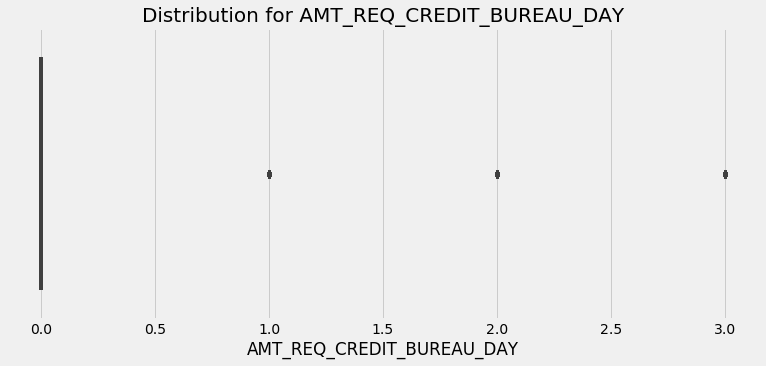

In [112]:
# checking for the Outliers of AMT_REQ_CREDIT_BUREAU_DAY
sns.boxplot(data['AMT_REQ_CREDIT_BUREAU_DAY'])
plt.title('Distribution for AMT_REQ_CREDIT_BUREAU_DAY', fontsize = 20)
plt.show()

* After droping it seems still some outlier is there.

In [113]:
data.AMT_REQ_CREDIT_BUREAU_DAY.value_counts()

0.0    216563
1.0      1062
2.0        83
3.0        37
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64

In [114]:
# lets check the skewness of the data

from scipy.stats import skew

# lets select only the numerical features present inside the data
numerical_feats = data.dtypes[data.dtypes == 'float64'].index

# checking the skewness in all the numerical features
skewed_feats = data[numerical_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending = False)

# converting the features into a dataframe
skewness = pd.DataFrame({'skew':skewed_feats})

# checking the head of skewness dataset
skewness.head(100)

skew
AMT_REQ_CREDIT_BUREAU_DAY   17.636981
OBS_30_CNT_SOCIAL_CIRCLE    15.288639
OBS_60_CNT_SOCIAL_CIRCLE    15.186843
AMT_REQ_CREDIT_BUREAU_HOUR  14.488354
AMT_REQ_CREDIT_BUREAU_WEEK   8.257345
AMT_REQ_CREDIT_BUREAU_MON    7.604834
DEF_30_CNT_SOCIAL_CIRCLE     5.638709
DEF_60_CNT_SOCIAL_CIRCLE     5.573623
AMT_REQ_CREDIT_BUREAU_QRT    2.646694
REGION_POPULATION_RELATIVE   1.433302
AMT_GOODS_PRICE              1.218194
AMT_REQ_CREDIT_BUREAU_YEAR   1.216069
AMT_CREDIT                   1.114061
AMT_ANNUITY                  1.065353
AMT_INCOME_TOTAL             0.695816
EXT_SOURCE_3                -0.403825
DAYS_REGISTRATION           -0.582694
DAYS_LAST_PHONE_CHANGE      -0.638161
EXT_SOURCE_2                -0.824796

### We can overcome Skewness through Log Transformation also.

In [115]:
#Log Transform

data['AMT_REQ_CREDIT_BUREAU_DAY'] = np.log1p(data['AMT_REQ_CREDIT_BUREAU_DAY'])
data['OBS_30_CNT_SOCIAL_CIRCLE'] = np.log1p(data['OBS_30_CNT_SOCIAL_CIRCLE'])

data['OBS_60_CNT_SOCIAL_CIRCLE'] = np.log1p(data['OBS_60_CNT_SOCIAL_CIRCLE'])
data['AMT_REQ_CREDIT_BUREAU_HOUR'] = np.log1p(data['AMT_REQ_CREDIT_BUREAU_HOUR'])

data['AMT_REQ_CREDIT_BUREAU_WEEK'] = np.log1p(data['AMT_REQ_CREDIT_BUREAU_WEEK'])
data['AMT_REQ_CREDIT_BUREAU_MON'] = np.log1p(data['AMT_REQ_CREDIT_BUREAU_MON'])

data['DEF_30_CNT_SOCIAL_CIRCLE'] = np.log1p(data['DEF_30_CNT_SOCIAL_CIRCLE'])
data['DEF_60_CNT_SOCIAL_CIRCLE'] = np.log1p(data['DEF_60_CNT_SOCIAL_CIRCLE'])

data['AMT_REQ_CREDIT_BUREAU_QRT'] = np.log1p(data['AMT_REQ_CREDIT_BUREAU_QRT'])
data['REGION_POPULATION_RELATIVE'] = np.log1p(data['REGION_POPULATION_RELATIVE'])

data['AMT_GOODS_PRICE'] = np.log1p(data['AMT_GOODS_PRICE'])
data['AMT_REQ_CREDIT_BUREAU_YEAR'] = np.log1p(data['AMT_REQ_CREDIT_BUREAU_YEAR'])
data['AMT_CREDIT'] = np.log1p(data['AMT_CREDIT'])
data['AMT_ANNUITY'] = np.log1p(data['AMT_ANNUITY'])


In [116]:
# lets check the skewness of the data

from scipy.stats import skew

# lets select only the numerical features present inside the data
numerical_feats = data.dtypes[data.dtypes == 'float64'].index

# checking the skewness in all the numerical features
skewed_feats = data[numerical_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending = False)

# converting the features into a dataframe
skewness = pd.DataFrame({'skew':skewed_feats})

# checking the head of skewness dataset
skewness.head(100)

skew
AMT_REQ_CREDIT_BUREAU_DAY   14.646126
AMT_REQ_CREDIT_BUREAU_HOUR  13.081207
AMT_REQ_CREDIT_BUREAU_WEEK   5.649528
DEF_60_CNT_SOCIAL_CIRCLE     3.391129
AMT_REQ_CREDIT_BUREAU_MON    2.899954
DEF_30_CNT_SOCIAL_CIRCLE     2.822085
AMT_REQ_CREDIT_BUREAU_QRT    1.931874
REGION_POPULATION_RELATIVE   1.371106
OBS_60_CNT_SOCIAL_CIRCLE     0.884426
OBS_30_CNT_SOCIAL_CIRCLE     0.875800
AMT_INCOME_TOTAL             0.695816
AMT_REQ_CREDIT_BUREAU_YEAR   0.008922
AMT_GOODS_PRICE             -0.321757
AMT_CREDIT                  -0.363798
EXT_SOURCE_3                -0.403825
AMT_ANNUITY                 -0.415090
DAYS_REGISTRATION           -0.582694
DAYS_LAST_PHONE_CHANGE      -0.638161
EXT_SOURCE_2                -0.824796

In [117]:
#Once again Log Transform

data['AMT_REQ_CREDIT_BUREAU_DAY'] = np.log1p(data['AMT_REQ_CREDIT_BUREAU_DAY'])
data['OBS_30_CNT_SOCIAL_CIRCLE'] = np.log1p(data['OBS_30_CNT_SOCIAL_CIRCLE'])
data['OBS_60_CNT_SOCIAL_CIRCLE'] = np.log1p(data['OBS_60_CNT_SOCIAL_CIRCLE'])
data['AMT_REQ_CREDIT_BUREAU_HOUR'] = np.log1p(data['AMT_REQ_CREDIT_BUREAU_HOUR'])
data['AMT_REQ_CREDIT_BUREAU_WEEK'] = np.log1p(data['AMT_REQ_CREDIT_BUREAU_WEEK'])
data['AMT_REQ_CREDIT_BUREAU_MON'] = np.log1p(data['AMT_REQ_CREDIT_BUREAU_MON'])
data['DEF_30_CNT_SOCIAL_CIRCLE'] = np.log1p(data['DEF_30_CNT_SOCIAL_CIRCLE'])
data['DEF_60_CNT_SOCIAL_CIRCLE'] = np.log1p(data['DEF_60_CNT_SOCIAL_CIRCLE'])

data['AMT_REQ_CREDIT_BUREAU_QRT'] = np.log1p(data['AMT_REQ_CREDIT_BUREAU_QRT'])
data['REGION_POPULATION_RELATIVE'] = np.log1p(data['REGION_POPULATION_RELATIVE'])

In [118]:
# lets check the skewness of the data

from scipy.stats import skew

# lets select only the numerical features present inside the data
numerical_feats = data.dtypes[data.dtypes == 'float64'].index

# checking the skewness in all the numerical features
skewed_feats = data[numerical_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending = False)

# converting the features into a dataframe
skewness = pd.DataFrame({'skew':skewed_feats})

# checking the head of skewness dataset
skewness.head(100)

skew
AMT_REQ_CREDIT_BUREAU_DAY   13.982741
AMT_REQ_CREDIT_BUREAU_HOUR  12.818374
AMT_REQ_CREDIT_BUREAU_WEEK   5.424211
DEF_60_CNT_SOCIAL_CIRCLE     3.164495
DEF_30_CNT_SOCIAL_CIRCLE     2.589170
AMT_REQ_CREDIT_BUREAU_MON    2.219241
AMT_REQ_CREDIT_BUREAU_QRT    1.751631
REGION_POPULATION_RELATIVE   1.312478
AMT_INCOME_TOTAL             0.695816
OBS_60_CNT_SOCIAL_CIRCLE     0.519974
OBS_30_CNT_SOCIAL_CIRCLE     0.511105
AMT_REQ_CREDIT_BUREAU_YEAR   0.008922
AMT_GOODS_PRICE             -0.321757
AMT_CREDIT                  -0.363798
EXT_SOURCE_3                -0.403825
AMT_ANNUITY                 -0.415090
DAYS_REGISTRATION           -0.582694
DAYS_LAST_PHONE_CHANGE      -0.638161
EXT_SOURCE_2                -0.824796

In [119]:
# Again Log Transform

data['AMT_REQ_CREDIT_BUREAU_DAY'] = np.log1p(data['AMT_REQ_CREDIT_BUREAU_DAY'])


data['AMT_REQ_CREDIT_BUREAU_HOUR'] = np.log1p(data['AMT_REQ_CREDIT_BUREAU_HOUR'])
data['AMT_REQ_CREDIT_BUREAU_WEEK'] = np.log1p(data['AMT_REQ_CREDIT_BUREAU_WEEK'])
data['AMT_REQ_CREDIT_BUREAU_MON'] = np.log1p(data['AMT_REQ_CREDIT_BUREAU_MON'])
data['DEF_30_CNT_SOCIAL_CIRCLE'] = np.log1p(data['DEF_30_CNT_SOCIAL_CIRCLE'])
data['DEF_60_CNT_SOCIAL_CIRCLE'] = np.log1p(data['DEF_60_CNT_SOCIAL_CIRCLE'])

data['AMT_REQ_CREDIT_BUREAU_QRT'] = np.log1p(data['AMT_REQ_CREDIT_BUREAU_QRT'])
data['REGION_POPULATION_RELATIVE'] = np.log1p(data['REGION_POPULATION_RELATIVE'])

In [120]:
# lets check the skewness of the data

from scipy.stats import skew

# lets select only the numerical features present inside the data
numerical_feats = data.dtypes[data.dtypes == 'float64'].index

# checking the skewness in all the numerical features
skewed_feats = data[numerical_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending = False)

# converting the features into a dataframe
skewness = pd.DataFrame({'skew':skewed_feats})

# checking the head of skewness dataset
skewness.head(100)

skew
AMT_REQ_CREDIT_BUREAU_DAY   13.747728
AMT_REQ_CREDIT_BUREAU_HOUR  12.729441
AMT_REQ_CREDIT_BUREAU_WEEK   5.363480
DEF_60_CNT_SOCIAL_CIRCLE     3.083945
DEF_30_CNT_SOCIAL_CIRCLE     2.504229
AMT_REQ_CREDIT_BUREAU_MON    2.010428
AMT_REQ_CREDIT_BUREAU_QRT    1.677761
REGION_POPULATION_RELATIVE   1.257120
AMT_INCOME_TOTAL             0.695816
OBS_60_CNT_SOCIAL_CIRCLE     0.519974
OBS_30_CNT_SOCIAL_CIRCLE     0.511105
AMT_REQ_CREDIT_BUREAU_YEAR   0.008922
AMT_GOODS_PRICE             -0.321757
AMT_CREDIT                  -0.363798
EXT_SOURCE_3                -0.403825
AMT_ANNUITY                 -0.415090
DAYS_REGISTRATION           -0.582694
DAYS_LAST_PHONE_CHANGE      -0.638161
EXT_SOURCE_2                -0.824796

* Somehow, skewness get overcome.(like in AMT_REQ_CREDIT_BUREAU_DAY column earlier skweness was 17.636981 and now it came down to 13.747728)

* For now we can leave those values as it is, But if we want to treat those values it should be by "Mode". Because frequent occuring of values is there. 

### Binning 

In [121]:
data.head()

SK_ID_CURR TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0       100002      1         Cash loans           M            N   
5       100008      0         Cash loans           M            N   
6       100009      0         Cash loans           F            Y   
8       100011      0         Cash loans           F            N   
10      100014      0         Cash loans           F            N   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                Y             0          202500.0   12.915581    10.114619   
5                Y             0           99000.0   13.103173    10.222614   
6                Y             1          171000.0   14.260662    10.628666   
8                Y             0          112500.0   13.834932    10.429029   
10               Y             1          112500.0   13.388568     9.960718   

    AMT_GOODS_PRICE  NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0         12.768544    Unaccompanied               Working   
5         13.026955  Spouse, partner         State servant   
6         14.148406    Unaccompanied  Commercial associate   
8         13.725040         Children             Pensioner   
10        13.388568    Unaccompanied               Working   

              NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0   Secondary / secondary special  Single / not married  House / apartment   
5   Secondary / secondary special               Married  House / apartment   
6                Higher education               Married  House / apartment   
8   Secondary / secondary special               Married  House / apartment   
10               Higher education               Married  House / apartment   

    REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                     0.018287        9461           -637            -3648.0   
5                     0.033978       16941          -1588            -4970.0   
6                     0.033978       13778          -3130            -1213.0   
8                     0.018129       20099              0            -7427.0   
10                    0.022049       10197           -679            -4427.0   

    DAYS_ID_PUBLISH  FLAG_MOBIL FLAG_EMP_PHONE FLAG_WORK_PHONE  \
0             -2120           1              1               0   
5              -477           1              1               1   
6              -619           1              1               0   
8             -3514           1              0               0   
10             -738           1              1               0   

   FLAG_CONT_MOBILE FLAG_PHONE FLAG_EMAIL CNT_FAM_MEMBERS  \
0                 1          1          0               1   
5                 1          1          0               2   
6                 1          1          0               3   
8                 1          0          0               2   
10                1          0          0               3   

   REGION_RATING_CLIENT REGION_RATING_CLIENT_W_CITY  \
0                     2                           2   
5                     2                           2   
6                     2                           2   
8                     2                           2   
10                    2                           2   

   WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                   WEDNESDAY                       10   
5                   WEDNESDAY                       16   
6                      SUNDAY                       16   
8                   WEDNESDAY                       14   
10                   SATURDAY                       15   

   REG_REGION_NOT_LIVE_REGION REG_REGION_NOT_WORK_REGION  \
0                           0                          0   
5                           0                          0   
6                           0                          0   
8                           0                          0   
10                          0                  

In [122]:
data.AMT_INCOME_TOTAL.describe()

count    217745.000000
mean     162336.481538
std       59307.978907
min       67567.500000
25%      112500.000000
50%      157500.000000
75%      202500.000000
max      337050.000000
Name: AMT_INCOME_TOTAL, dtype: float64

In [123]:
data.AMT_INCOME_TOTAL.quantile([0.01,0.1,0.2,0.25,0.5,0.7,0.75,0.9,0.95,0.99,1])

0.01     76500.0
0.10     90000.0
0.20    112500.0
0.25    112500.0
0.50    157500.0
0.70    180000.0
0.75    202500.0
0.90    247500.0
0.95    270000.0
0.99    315000.0
1.00    337050.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [124]:
data['Amount_Labels'] = pd.cut(data['AMT_INCOME_TOTAL'], bins=[50000,100000,200000,350000], labels=["Low","Midum","High"])

In [125]:
data.Amount_Labels.value_counts()

Midum    124952
High      60359
Low       32434
Name: Amount_Labels, dtype: int64

* we notice that after converting into categorical, it is pretty clear that most are in middle-income earners.

In [126]:
data.AMT_ANNUITY.quantile([0.01,0.1,0.2,0.25,0.5,0.7,0.75,0.9,0.95,0.99,1])

0.01     8.806724
0.10     9.370502
0.20     9.643291
0.25     9.742144
0.50    10.132494
0.70    10.366309
0.75    10.441719
0.90    10.707617
0.95    10.853399
0.99    11.107420
1.00    12.323860
Name: AMT_ANNUITY, dtype: float64

In [127]:
data.AMT_ANNUITY.describe()

count    217745.000000
mean         10.077835
std           0.515024
min           7.591357
25%           9.742144
50%          10.132494
75%          10.441719
max          12.323860
Name: AMT_ANNUITY, dtype: float64

In [128]:
data['Annuity_Labels'] = pd.cut(data['AMT_ANNUITY'], bins=[6,9,11,13], labels=["Low","Midum","High"])

In [129]:
data.Annuity_Labels.value_counts()   

Midum    207921
Low        5641
High       4183
Name: Annuity_Labels, dtype: int64

* we notice that after converting into categorical, it is pretty clear that most of them were mediumly on amount annuity.

In [130]:
data.AMT_CREDIT.quantile([0.01,0.1,0.2,0.25,0.5,0.7,0.75,0.9,0.95,0.99,1])

0.01    11.395099
0.10    12.199385
0.20    12.482520
0.25    12.558140
0.50    13.164045
0.70    13.534726
0.75    13.603123
0.90    13.933294
0.95    14.106952
0.99    14.403298
1.00    15.166183
Name: AMT_CREDIT, dtype: float64

In [131]:
data.AMT_CREDIT.describe()

count    217745.000000
mean         13.095736
std           0.687549
min          10.714440
25%          12.558140
50%          13.164045
75%          13.603123
max          15.166183
Name: AMT_CREDIT, dtype: float64

In [132]:
data['Credit_Labels'] = pd.cut(data['AMT_CREDIT'], bins=[9,12,14,16], labels=["Low","Midum","High"])

In [133]:
data.Credit_Labels.value_counts()

Midum    185615
High      18866
Low       13264
Name: Credit_Labels, dtype: int64

* we notice that after converting into categorical, it is pretty clear that most of them were mediumly on amount credited.

In [134]:
# Imbalace Percentage:

100*data.TARGET.value_counts()/ len(data)

0    92.079267
1     7.920733
Name: TARGET, dtype: float64

* Here percentage of 0 is more than 1. So, it is imbalance in percentage 

### Divide the data into two sets, i.e. Target = 1 is df_1 and Target = 0 is df_0.

In [135]:
df_1 = data[data['TARGET']==1]
df_0 = data[data['TARGET']==0]

In [136]:
df_1.head()

SK_ID_CURR TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0       100002      1         Cash loans           M            N   
26      100031      1         Cash loans           F            N   
40      100047      1         Cash loans           M            N   
42      100049      1         Cash loans           F            N   
81      100096      1         Cash loans           F            N   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                Y             0          202500.0   12.915581    10.114619   
26               Y             0          112500.0   13.795301    10.206458   
40               Y             0          202500.0   13.992469    10.463932   
42               N             0          135000.0   12.573746     9.696433   
81               Y             0           81000.0   12.437188     9.588400   

    AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0         12.768544   Unaccompanied               Working   
26        13.461690   Unaccompanied               Working   
40        13.658858   Unaccompanied  Commercial associate   
42        12.382129   Unaccompanied               Working   
81        12.437188   Unaccompanied             Pensioner   

              NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0   Secondary / secondary special  Single / not married  House / apartment   
26  Secondary / secondary special                 Widow  House / apartment   
40  Secondary / secondary special               Married  House / apartment   
42  Secondary / secondary special        Civil marriage  House / apartment   
81  Secondary / secondary special               Married  House / apartment   

    REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                     0.018287        9461           -637            -3648.0   
26                    0.017556       18724          -2628            -6573.0   
40                    0.024252       17482          -1262            -1182.0   
42                    0.007226       13384          -3597              -45.0   
81                    0.027487       24794              0            -5391.0   

    DAYS_ID_PUBLISH  FLAG_MOBIL FLAG_EMP_PHONE FLAG_WORK_PHONE  \
0             -2120           1              1               0   
26            -1827           1              1               0   
40            -1029           1              1               0   
42            -4409           1              1               1   
81            -4199           1              0               0   

   FLAG_CONT_MOBILE FLAG_PHONE FLAG_EMAIL CNT_FAM_MEMBERS  \
0                 1          1          0               1   
26                1          0          0               1   
40                1          0          0               2   
42                1          1          0               2   
81                1          0          0               2   

   REGION_RATING_CLIENT REGION_RATING_CLIENT_W_CITY  \
0                     2                           2   
26                    3                           2   
40                    2                           2   
42                    3                           3   
81                    2                           2   

   WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                   WEDNESDAY                       10   
26                     MONDAY                        9   
40                    TUESDAY                        9   
42                   THURSDAY                       11   
81                   THURSDAY                       10   

   REG_REGION_NOT_LIVE_REGION REG_REGION_NOT_WORK_REGION  \
0                           0                          0   
26                          0                          0   
40                          0                          0   
42                          0                          0   
81                          0                        

In [137]:
df_0.head()

SK_ID_CURR TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
5       100008      0         Cash loans           M            N   
6       100009      0         Cash loans           F            Y   
8       100011      0         Cash loans           F            N   
10      100014      0         Cash loans           F            N   
13      100017      0         Cash loans           M            Y   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
5                Y             0           99000.0   13.103173    10.222614   
6                Y             1          171000.0   14.260662    10.628666   
8                Y             0          112500.0   13.834932    10.429029   
10               Y             1          112500.0   13.388568     9.960718   
13               N             1          225000.0   13.730463    10.273930   

    AMT_GOODS_PRICE  NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
5         13.026955  Spouse, partner         State servant   
6         14.148406    Unaccompanied  Commercial associate   
8         13.725040         Children             Pensioner   
10        13.388568    Unaccompanied               Working   
13        13.455259    Unaccompanied               Working   

              NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
5   Secondary / secondary special            Married  House / apartment   
6                Higher education            Married  House / apartment   
8   Secondary / secondary special            Married  House / apartment   
10               Higher education            Married  House / apartment   
13  Secondary / secondary special            Married  House / apartment   

    REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
5                     0.033978       16941          -1588            -4970.0   
6                     0.033978       13778          -3130            -1213.0   
8                     0.018129       20099              0            -7427.0   
10                    0.022049       10197           -679            -4427.0   
13                    0.016209       14086          -3028             -643.0   

    DAYS_ID_PUBLISH  FLAG_MOBIL FLAG_EMP_PHONE FLAG_WORK_PHONE  \
5              -477           1              1               1   
6              -619           1              1               0   
8             -3514           1              0               0   
10             -738           1              1               0   
13            -4911           1              1               0   

   FLAG_CONT_MOBILE FLAG_PHONE FLAG_EMAIL CNT_FAM_MEMBERS  \
5                 1          1          0               2   
6                 1          1          0               3   
8                 1          0          0               2   
10                1          0          0               3   
13                1          0          0               3   

   REGION_RATING_CLIENT REGION_RATING_CLIENT_W_CITY  \
5                     2                           2   
6                     2                           2   
8                     2                           2   
10                    2                           2   
13                    2                           2   

   WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
5                   WEDNESDAY                       16   
6                      SUNDAY                       16   
8                   WEDNESDAY                       14   
10                   SATURDAY                       15   
13                   THURSDAY                       13   

   REG_REGION_NOT_LIVE_REGION REG_REGION_NOT_WORK_REGION  \
5                           0                          0   
6                           0                          0   
8                           0                          0   
10                          0                          0   
13                          0                          0   

   L

### Perform univariate analysis for categorical variables for both 0 and 1.Compare the target variable across categories of categorical variables.

In [138]:
df_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200498 entries, 5 to 307510
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   200498 non-null  int64   
 1   TARGET                       200498 non-null  object  
 2   NAME_CONTRACT_TYPE           200498 non-null  object  
 3   CODE_GENDER                  200498 non-null  object  
 4   FLAG_OWN_CAR                 200498 non-null  object  
 5   FLAG_OWN_REALTY              200498 non-null  object  
 6   CNT_CHILDREN                 200498 non-null  int64   
 7   AMT_INCOME_TOTAL             200498 non-null  float64 
 8   AMT_CREDIT                   200498 non-null  float64 
 9   AMT_ANNUITY                  200498 non-null  float64 
 10  AMT_GOODS_PRICE              200498 non-null  float64 
 11  NAME_TYPE_SUITE              200498 non-null  category
 12  NAME_INCOME_TYPE             200498 non-null

#### NAME_EDUCATION_TYPE

In [139]:
#calculate the percentage of each education category in df_0
df_0.NAME_EDUCATION_TYPE.value_counts(normalize=True)

Secondary / secondary special    0.704286
Higher education                 0.251968
Incomplete higher                0.032729
Lower secondary                  0.010499
Academic degree                  0.000519
Name: NAME_EDUCATION_TYPE, dtype: float64

In [140]:
#calculate the percentage of each education category in df_1
df_1.NAME_EDUCATION_TYPE.value_counts(normalize=True)

Secondary / secondary special    0.781991
Higher education                 0.169189
Incomplete higher                0.033861
Lower secondary                  0.014901
Academic degree                  0.000058
Name: NAME_EDUCATION_TYPE, dtype: float64

* We can clearly notice that variation in education type is df_0 and df_1

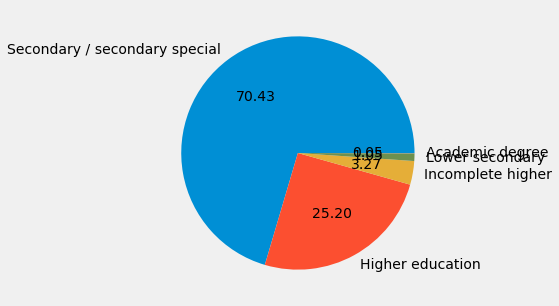

In [141]:
#plot the pie chart of education categories
plt.pie(df_0['NAME_EDUCATION_TYPE'].value_counts(), autopct='%1.2f', labels = df_0['NAME_EDUCATION_TYPE'].value_counts().index)
plt.show()

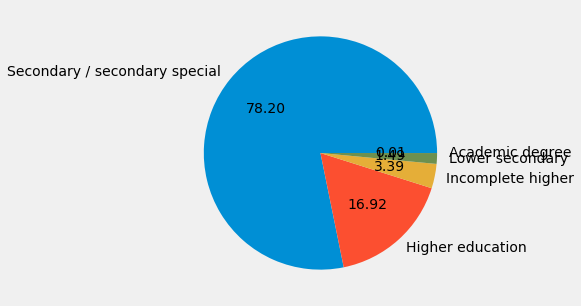

In [142]:
#plot the pie chart of education categories
plt.pie(df_1['NAME_EDUCATION_TYPE'].value_counts(), autopct='%1.2f', labels = df_1['NAME_EDUCATION_TYPE'].value_counts().index)
plt.show()

* From this we can see that Secondary / secondary special, Incomplete higher, Lower secondary is more in df_1 and Higher education, Academic degree is more in df_0 
* Means those who properly completed their education they were in (df_0)other cases and those who least educated they were in payment difficulty(df_1)

#### NAME_HOUSING_TYPE

In [143]:
#calculate the percentage of each housing category.
df_0.NAME_HOUSING_TYPE.value_counts(normalize=True)

House / apartment      0.892373
With parents           0.045392
Municipal apartment    0.035571
Rented apartment       0.014264
Office apartment       0.008449
Co-op apartment        0.003950
Name: NAME_HOUSING_TYPE, dtype: float64

In [144]:

#calculate the percentage of each housing category.
df_1.NAME_HOUSING_TYPE.value_counts(normalize=True)

House / apartment      0.860787
With parents           0.068708
Municipal apartment    0.036934
Rented apartment       0.023482
Office apartment       0.006726
Co-op apartment        0.003363
Name: NAME_HOUSING_TYPE, dtype: float64

* Variation can be seen 

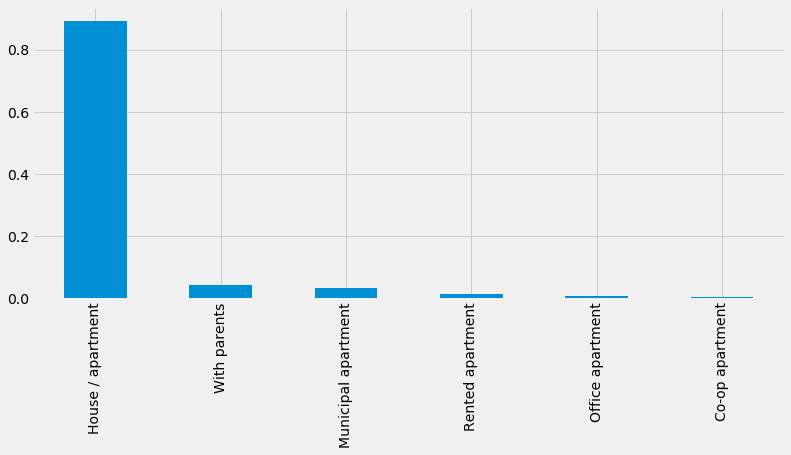

In [145]:
#calculate the percentage of each poutcome category.
df_0.NAME_HOUSING_TYPE.value_counts(normalize=True).plot.bar()
plt.show()

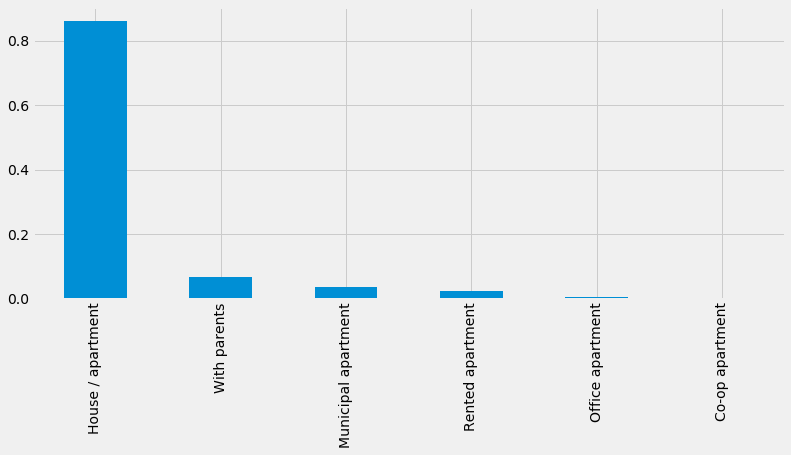

In [146]:

#calculate the percentage of each poutcome category.
df_1.NAME_HOUSING_TYPE.value_counts(normalize=True).plot.bar()
plt.show()


* From this we can see that House / apartment, Office apartment, Co-op apartment is more in df_0 and With parents, Municipal apartment, Rented apartment is more in df_1 
* Means those who own house, office or Co-op apartment they were in (df_0)other cases and those who leave with their parents and in rented they were in payment difficulty(df_1)

#### CNT_FAM_MEMBERS

In [147]:

#calculate the percentage of each family members category.
df_0.CNT_FAM_MEMBERS.value_counts(normalize=True)

2.0    0.516858
1.0    0.215703
3.0    0.173159
4.0    0.081881
5.0    0.010978
6.0    0.001167
7.0    0.000254
Name: CNT_FAM_MEMBERS, dtype: float64

In [148]:
#calculate the percentage of each family members category.
df_1.CNT_FAM_MEMBERS.value_counts(normalize=True)

2.0    0.487563
1.0    0.218995
3.0    0.191164
4.0    0.086392
5.0    0.013568
6.0    0.002145
7.0    0.000174
Name: CNT_FAM_MEMBERS, dtype: float64

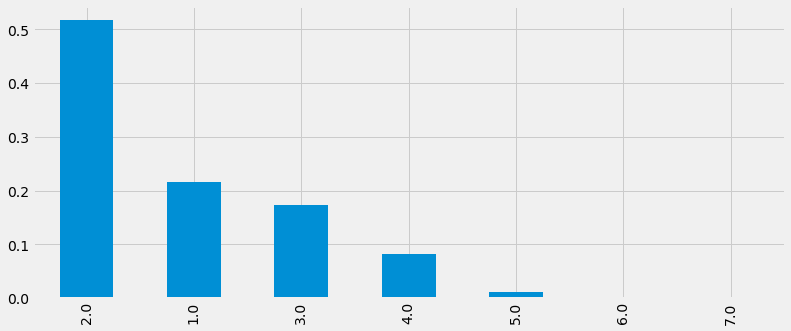

In [149]:
#calculate the percentage of each poutcome category.
df_0.CNT_FAM_MEMBERS.value_counts(normalize=True).plot.bar()
plt.show()

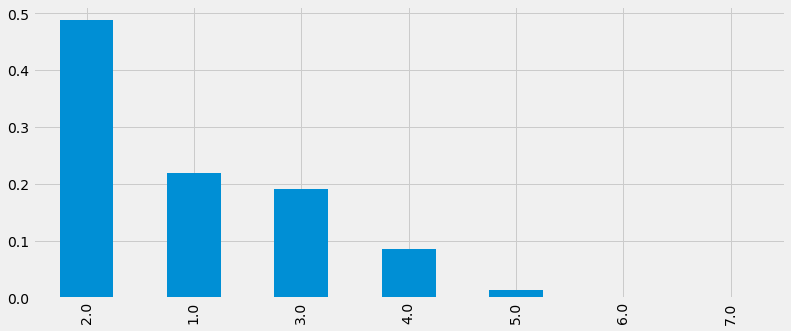

In [150]:
#calculate the percentage of each poutcome category.
df_1.CNT_FAM_MEMBERS.value_counts(normalize=True).plot.bar()
plt.show()

* From this we can see that client with family memebers 2 is more in df_0 and the clients with family memebers 1,3,4,5,6,7 is more in df_1
* Means those clients who have family members 2 they were in (df_0)other cases and the clients who have family members 1,3,4,5,6,7 they were in payment difficulty(df_1)

#### ORGANIZATION_TYPE

In [151]:

#calculate the percentage of each education category.
df_0.ORGANIZATION_TYPE.value_counts(normalize=True)

Business Entity Type 3    0.215912
XNA                       0.174186
Self-employed             0.117218
Other                     0.055517
Medicine                  0.039671
Business Entity Type 2    0.036748
Government                0.036020
School                    0.031517
Trade: type 7             0.024349
Kindergarten              0.023317
Construction              0.020753
Business Entity Type 1    0.020140
Transport: type 4         0.017856
Industry: type 9          0.011935
Trade: type 3             0.011706
Industry: type 3          0.010918
Security                  0.010629
Housing                   0.010075
Industry: type 11         0.009461
Bank                      0.008943
Military                  0.008843
Police                    0.008788
Transport: type 2         0.008404
Agriculture               0.007377
Security Ministries       0.007187
Postal                    0.006529
Trade: type 2             0.006070
Restaurant                0.005377
Services            

In [152]:
#calculate the percentage of each education category.
df_1.ORGANIZATION_TYPE.value_counts(normalize=True)

Business Entity Type 3    0.255117
Self-employed             0.150403
XNA                       0.112483
Other                     0.052705
Business Entity Type 2    0.040529
Construction              0.031542
Medicine                  0.031310
Government                0.029802
Trade: type 7             0.028817
Business Entity Type 1    0.021627
Transport: type 4         0.020815
School                    0.020699
Kindergarten              0.019656
Trade: type 3             0.015017
Industry: type 3          0.014727
Security                  0.013278
Industry: type 9          0.010031
Housing                   0.009683
Industry: type 11         0.009567
Agriculture               0.009161
Restaurant                0.008407
Transport: type 2         0.008291
Transport: type 3         0.007480
Postal                    0.007132
Trade: type 2             0.005566
Bank                      0.005392
Military                  0.005392
Industry: type 1          0.005160
Police              

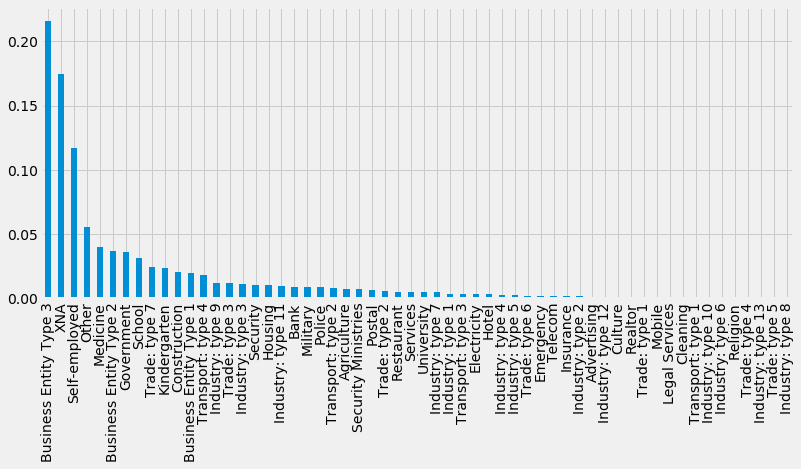

In [153]:
#calculate the percentage of each poutcome category.
df_0.ORGANIZATION_TYPE.value_counts(normalize=True).plot.bar()
plt.show()

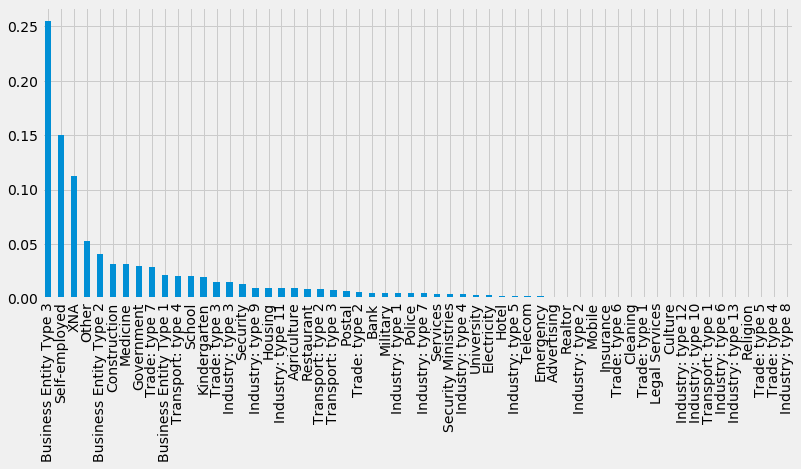

In [154]:
#calculate the percentage of each poutcome category.
df_1.ORGANIZATION_TYPE.value_counts(normalize=True).plot.bar()
plt.show()

* From this we can see that client working in organization Business Entity Type 3 & XNA is more in df_0 and the client who are self employed and others are more in df_1.
* Means those clients working in organization Business Entity Type 3 & XNA they were in (df_0)other cases and the clients who are self employed and others they were in payment difficulty(df_1)

#### REGION_RATING_CLIENT_W_CITY

In [155]:
# Our rating of the region where client lives with taking city into account (1,2,3)

#calculate the percentage of each education category.
df_0.REGION_RATING_CLIENT_W_CITY.value_counts(normalize=True)

2    0.762631
3    0.136665
1    0.100704
Name: REGION_RATING_CLIENT_W_CITY, dtype: float64

In [156]:
# Our rating of the region where client lives with taking city into account (1,2,3)

#calculate the percentage of each education category.
df_1.REGION_RATING_CLIENT_W_CITY.value_counts(normalize=True)

2    0.746391
3    0.194411
1    0.059199
Name: REGION_RATING_CLIENT_W_CITY, dtype: float64

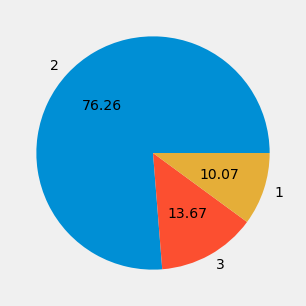

In [157]:
#plot the pie chart of REGION_RATING_CLIENT_W_CITY
plt.pie(df_0['REGION_RATING_CLIENT_W_CITY'].value_counts(), autopct='%1.2f',labels = df_0['REGION_RATING_CLIENT_W_CITY'].value_counts().index)
plt.show()

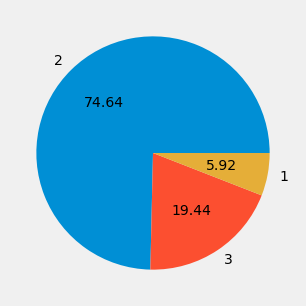

In [158]:
#plot the pie chart of REGION_RATING_CLIENT_W_CITY
plt.pie(df_1['REGION_RATING_CLIENT_W_CITY'].value_counts(), autopct='%1.2f',labels = df_1['REGION_RATING_CLIENT_W_CITY'].value_counts().index)
plt.show()

* From this we can see that client staying in region 2&1 is more in df_0 and the client staying in region 3 are more in df_1.
* Means those clients who stays in region 2&1 they were in (df_0)other cases and the clients who stays in region 3 are in payment difficulty(df_1)

### Compare the target variable across categories of categorical variables.

In [159]:
data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       

In [160]:
features = ['NAME_EDUCATION_TYPE', 'NAME_HOUSING_TYPE', 'CNT_FAM_MEMBERS','REGION_RATING_CLIENT_W_CITY','NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_FAMILY_STATUS','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','Amount_Labels','Annuity_Labels','Credit_Labels']
list(enumerate(features))

[(0, 'NAME_EDUCATION_TYPE'),
 (1, 'NAME_HOUSING_TYPE'),
 (2, 'CNT_FAM_MEMBERS'),
 (3, 'REGION_RATING_CLIENT_W_CITY'),
 (4, 'NAME_CONTRACT_TYPE'),
 (5, 'CODE_GENDER'),
 (6, 'FLAG_OWN_CAR'),
 (7, 'FLAG_OWN_REALTY'),
 (8, 'NAME_TYPE_SUITE'),
 (9, 'NAME_INCOME_TYPE'),
 (10, 'NAME_FAMILY_STATUS'),
 (11, 'FLAG_EMP_PHONE'),
 (12, 'FLAG_WORK_PHONE'),
 (13, 'FLAG_CONT_MOBILE'),
 (14, 'REGION_RATING_CLIENT'),
 (15, 'REGION_RATING_CLIENT_W_CITY'),
 (16, 'Amount_Labels'),
 (17, 'Annuity_Labels'),
 (18, 'Credit_Labels')]

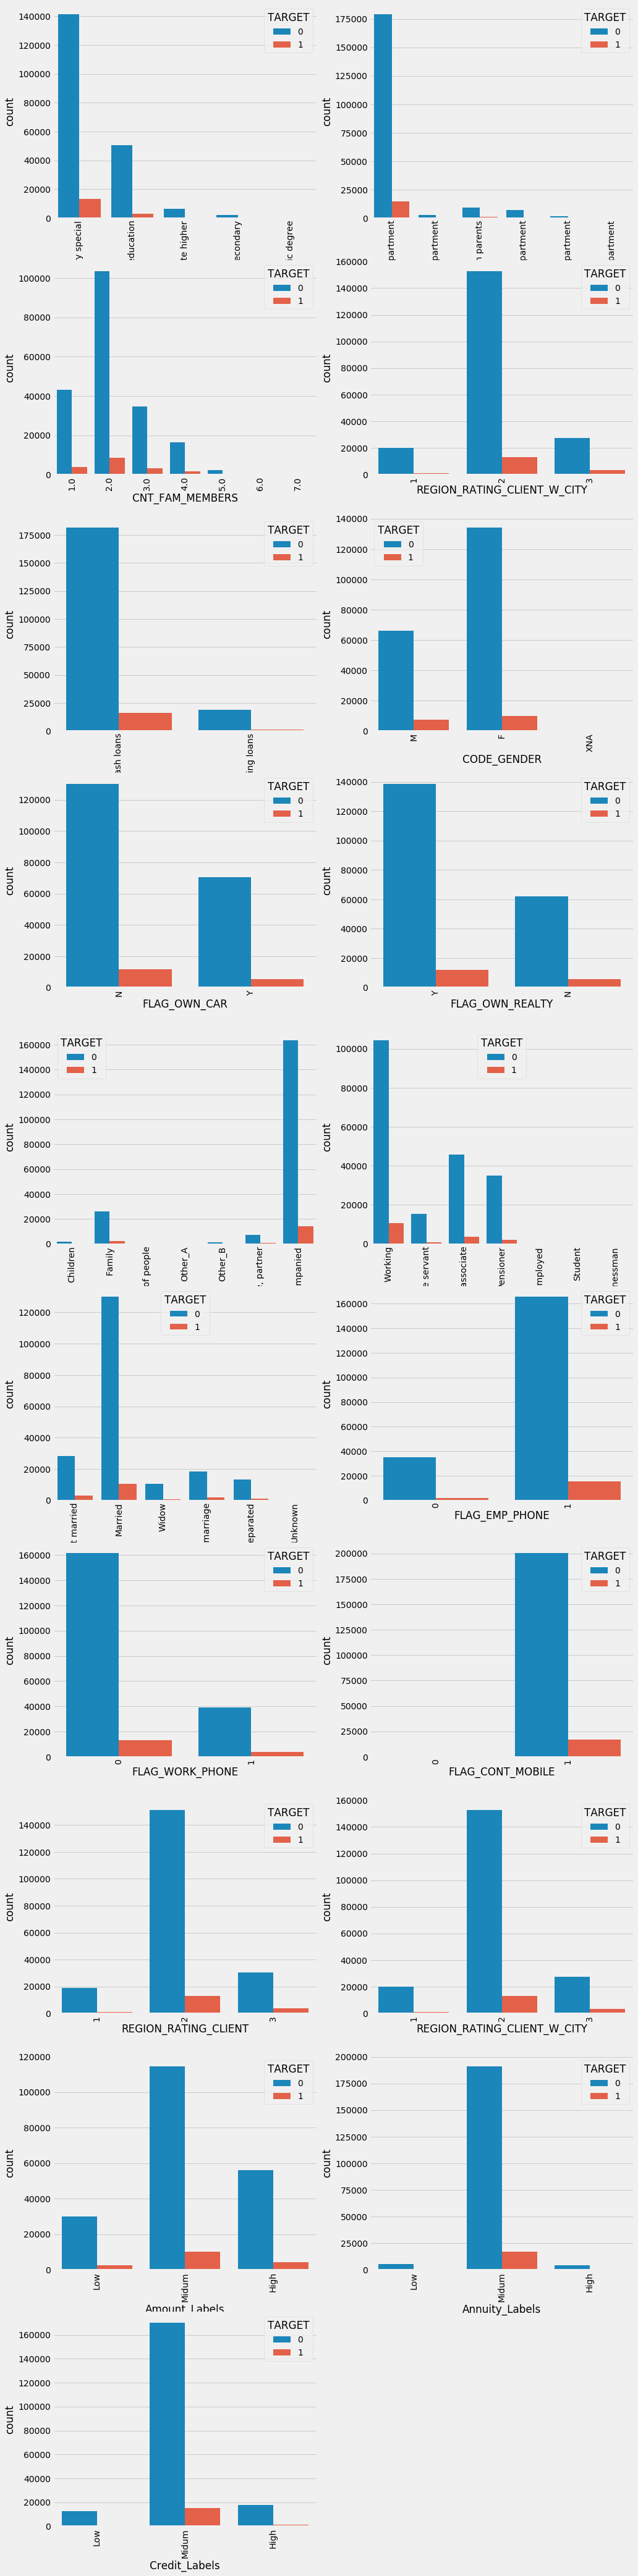

In [161]:
features = ['NAME_EDUCATION_TYPE', 'NAME_HOUSING_TYPE', 'CNT_FAM_MEMBERS','REGION_RATING_CLIENT_W_CITY','NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_FAMILY_STATUS','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','Amount_Labels','Annuity_Labels','Credit_Labels']
plt.figure(figsize = (15, 70))
for i in enumerate(features):
    plt.subplot(10, 2, i[0]+1)
    sns.countplot(x = i[1], hue = 'TARGET', data = data)
    plt.xticks(rotation = 90)

* It is very much clear that payment difficulties involve with the clients those are uncomplete or less education, female also facing problem, those are in cash loans, those who own car, single working, married, medium in earning 

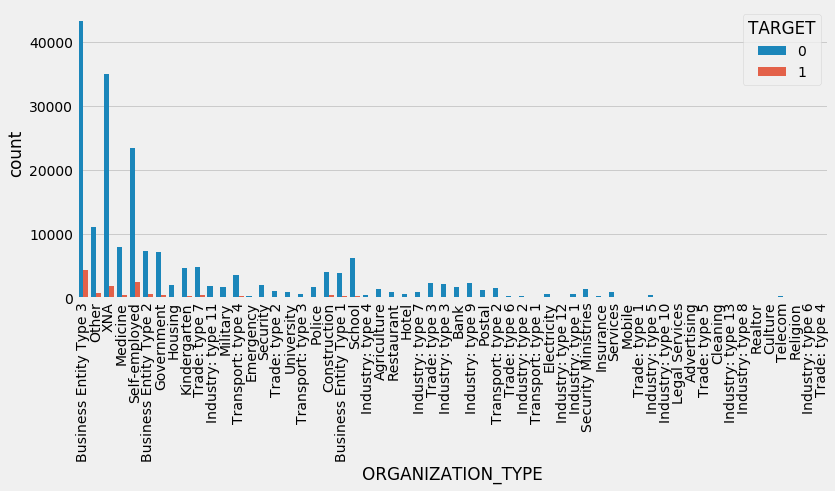

In [162]:
# Countplot

sns.countplot(x= 'ORGANIZATION_TYPE', hue = 'TARGET', data =data)
plt.xticks(rotation = 90)
plt.show()

#### Determining top 10 Correlation between df_0 and df_1

In [163]:
df_1.corr()

SK_ID_CURR  CNT_CHILDREN  AMT_INCOME_TOTAL  \
SK_ID_CURR                    1.000000     -0.009656          0.007782   
CNT_CHILDREN                 -0.009656      1.000000         -0.008486   
AMT_INCOME_TOTAL              0.007782     -0.008486          1.000000   
AMT_CREDIT                   -0.013421      0.008670          0.298446   
AMT_ANNUITY                  -0.016648      0.036306          0.352372   
AMT_GOODS_PRICE              -0.013969      0.002507          0.300591   
REGION_POPULATION_RELATIVE    0.003067     -0.026560          0.074684   
DAYS_BIRTH                    0.011850     -0.270644          0.012147   
DAYS_EMPLOYED                -0.000379     -0.023593         -0.051205   
DAYS_REGISTRATION            -0.000419      0.150225          0.030952   
DAYS_ID_PUBLISH               0.005883     -0.037462         -0.017195   
FLAG_MOBIL                         NaN           NaN               NaN   
HOUR_APPR_PROCESS_START       0.008555     -0.022285          0.055779   
EXT_SOURCE_2                  0.010806     -0.016187          0.111684   
EXT_SOURCE_3                 -0.003249     -0.023320         -0.048323   
OBS_30_CNT_SOCIAL_CIRCLE     -0.014638      0.037497         -0.005037   
DEF_30_CNT_SOCIAL_CIRCLE     -0.003843      0.009702         -0.017843   
OBS_60_CNT_SOCIAL_CIRCLE     -0.014106      0.036370         -0.005328   
DEF_60_CNT_SOCIAL_CIRCLE     -0.006570      0.004006         -0.021887   
DAYS_LAST_PHONE_CHANGE       -0.004328      0.010809         -0.065147   
FLAG_DOCUMENT_2                    NaN           NaN               NaN   
AMT_REQ_CREDIT_BUREAU_HOUR   -0.009349     -0.001147          0.000354   
AMT_REQ_CREDIT_BUREAU_DAY    -0.008102     -0.013570         -0.001355   
AMT_REQ_CREDIT_BUREAU_WEEK   -0.004726     -0.008065          0.011594   
AMT_REQ_CREDIT_BUREAU_MON     0.002376     -0.009886          0.069722   
AMT_REQ_CREDIT_BUREAU_QRT     0.001638     -0.020642          0.017967   
AMT_REQ_CREDIT_BUREAU_YEAR    0.012966     -0.032034          0.072990   

                            AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
SK_ID_CURR                   -0.013421    -0.016648        -0.013969   
CNT_CHILDREN                  0.008670     0.036306         0.002507   
AMT_INCOME_TOTAL              0.298446     0.352372         0.300591   
AMT_CREDIT                    1.000000     0.822099         0.982390   
AMT_ANNUITY                   0.822099     1.000000         0.817912   
AMT_GOODS_PRICE               0.982390     0.817912         1.000000   
REGION_POPULATION_RELATIVE    0.051261     0.043736         0.061450   
DAYS_BIRTH                    0.133637     0.024269         0.130657   
DAYS_EMPLOYED                -0.088419    -0.067591        -0.090257   
DAYS_REGISTRATION            -0.017200     0.038962        -0.016947   
DAYS_ID_PUBLISH              -0.053537    -0.027426        -0.057076   
FLAG_MOBIL                         NaN          NaN              NaN   
HOUR_APPR_PROCESS_START       0.023075     0.020744         0.033066   
EXT_SOURCE_2                  0.090068     0.081733         0.100151   
EXT_SOURCE_3                  0.081603     0.052766         0.083982   
OBS_30_CNT_SOCIAL_CIRCLE      0.014855     0.009597         0.014147   
DEF_30_CNT_SOCIAL_CIRCLE     -0.017207    -0.010827        -0.014534   
OBS_60_CNT_SOCIAL_CIRCLE      0.014861     0.010367         0.014207   
DEF_60_CNT_SOCIAL_CIRCLE     -0.026108    -0.018790        -0.023490   
DAYS_LAST_PHONE_CHANGE       -0.088705    -0.068184        -0.096253   
FLAG_DOCUMENT_2                    NaN          NaN              NaN   
AMT_REQ_CREDIT_BUREAU_HOUR   -0.000037     0.013021         0.001342   
AMT_REQ_CREDIT_BUREAU_DAY    -0.005289    -0.004561        -0.004695   
AMT_REQ_CREDIT_BUREAU_WEEK   -0.000841     0.030886         0.000005   
AMT_REQ_CREDIT_BUREAU_MON     0.044076     0.057914         0.046459   
AMT_REQ_CREDIT_BUREAU_QRT    -0.024390    -0.011570        -0.025138   
AMT_REQ_CRE

In [164]:
df_1.corr().unstack().reset_index()

level_0                     level_1         0
0                    SK_ID_CURR                  SK_ID_CURR  1.000000
1                    SK_ID_CURR                CNT_CHILDREN -0.009656
2                    SK_ID_CURR            AMT_INCOME_TOTAL  0.007782
3                    SK_ID_CURR                  AMT_CREDIT -0.013421
4                    SK_ID_CURR                 AMT_ANNUITY -0.016648
5                    SK_ID_CURR             AMT_GOODS_PRICE -0.013969
6                    SK_ID_CURR  REGION_POPULATION_RELATIVE  0.003067
7                    SK_ID_CURR                  DAYS_BIRTH  0.011850
8                    SK_ID_CURR               DAYS_EMPLOYED -0.000379
9                    SK_ID_CURR           DAYS_REGISTRATION -0.000419
10                   SK_ID_CURR             DAYS_ID_PUBLISH  0.005883
11                   SK_ID_CURR                  FLAG_MOBIL       NaN
12                   SK_ID_CURR     HOUR_APPR_PROCESS_START  0.008555
13                   SK_ID_CURR                EXT_SOURCE_2  0.010806
14                   SK_ID_CURR                EXT_SOURCE_3 -0.003249
15                   SK_ID_CURR    OBS_30_CNT_SOCIAL_CIRCLE -0.014638
16                   SK_ID_CURR    DEF_30_CNT_SOCIAL_CIRCLE -0.003843
17                   SK_ID_CURR    OBS_60_CNT_SOCIAL_CIRCLE -0.014106
18                   SK_ID_CURR    DEF_60_CNT_SOCIAL_CIRCLE -0.006570
19                   SK_ID_CURR      DAYS_LAST_PHONE_CHANGE -0.004328
20                   SK_ID_CURR             FLAG_DOCUMENT_2       NaN
21                   SK_ID_CURR  AMT_REQ_CREDIT_BUREAU_HOUR -0.009349
22                   SK_ID_CURR   AMT_REQ_CREDIT_BUREAU_DAY -0.008102
23                   SK_ID_CURR  AMT_REQ_CREDIT_BUREAU_WEEK -0.004726
24                   SK_ID_CURR   AMT_REQ_CREDIT_BUREAU_MON  0.002376
25                   SK_ID_CURR   AMT_REQ_CREDIT_BUREAU_QRT  0.001638
26                   SK_ID_CURR  AMT_REQ_CREDIT_BUREAU_YEAR  0.012966
27                 CNT_CHILDREN                  SK_ID_CURR -0.009656
28                 CNT_CHILDREN                CNT_CHILDREN  1.000000
29                 CNT_CHILDREN            AMT_INCOME_TOTAL -0.008486
30                 CNT_CHILDREN                  AMT_CREDIT  0.008670
31                 CNT_CHILDREN                 AMT_ANNUITY  0.036306
32                 CNT_CHILDREN             AMT_GOODS_PRICE  0.002507
33                 CNT_CHILDREN  REGION_POPULATION_RELATIVE -0.026560
34                 CNT_CHILDREN                  DAYS_BIRTH -0.270644
35                 CNT_CHILDREN               DAYS_EMPLOYED -0.023593
36                 CNT_CHILDREN           DAYS_REGISTRATION  0.150225
37                 CNT_CHILDREN             DAYS_ID_PUBLISH -0.037462
38                 CNT_CHILDREN                  FLAG_MOBIL       NaN
39                 CNT_CHILDREN     HOUR_APPR_PROCESS_START -0.022285
40                 CNT_CHILDREN                EXT_SOURCE_2 -0.016187
41                 CNT_CHILDREN                EXT_SOURCE_3 -0.023320
42                 CNT_CHILDREN    OBS_30_CNT_SOCIAL_CIRCLE  0.037497
43                 CNT_CHILDREN    DEF_30_CNT_SOCIAL_CIRCLE  0.009702
44                 CNT_CHILDREN    OBS_60_CNT_SOCIAL_CIRCLE  0.036370
45                 CNT_CHILDREN    DEF_60_CNT_SOCIAL_CIRCLE  0.004006
46                 CNT_CHILDREN      DAYS_LAST_PHONE_CHANGE  0.010809
47                 CNT_CHILDREN             FLAG_DOCUMENT_2       NaN
48                 CNT_CHILDREN  AMT_REQ_CREDIT_BUREAU_HOUR -0.001147
49                 CNT_CHILDREN   AMT_REQ_CREDIT_BUREAU_DAY -0.013570
50                 CNT_CHILDREN  AMT_REQ_CREDIT_BUREAU_WEEK -0.008065
51                 CNT_CHILDREN   AMT_REQ_CREDIT_BUREAU_MON -0.009886
52                 CNT_CHILDREN   AMT_REQ_CREDIT_BUREAU_QRT -0.020642
53                 CNT_CHILDREN  AMT_REQ_CREDIT_BUREAU_YEAR -0.032034
54             AMT_INCOME_TOTAL                  SK_ID_CURR  0.007782
55             AMT_INCOME_TOTAL                CNT_CHILDREN -0.008486
56             AMT_INCOME_TOTAL   

In [165]:
corr = df_1.corr()

corr = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corr

SK_ID_CURR  CNT_CHILDREN  AMT_INCOME_TOTAL  \
SK_ID_CURR                         NaN     -0.009656          0.007782   
CNT_CHILDREN                       NaN           NaN         -0.008486   
AMT_INCOME_TOTAL                   NaN           NaN               NaN   
AMT_CREDIT                         NaN           NaN               NaN   
AMT_ANNUITY                        NaN           NaN               NaN   
AMT_GOODS_PRICE                    NaN           NaN               NaN   
REGION_POPULATION_RELATIVE         NaN           NaN               NaN   
DAYS_BIRTH                         NaN           NaN               NaN   
DAYS_EMPLOYED                      NaN           NaN               NaN   
DAYS_REGISTRATION                  NaN           NaN               NaN   
DAYS_ID_PUBLISH                    NaN           NaN               NaN   
FLAG_MOBIL                         NaN           NaN               NaN   
HOUR_APPR_PROCESS_START            NaN           NaN               NaN   
EXT_SOURCE_2                       NaN           NaN               NaN   
EXT_SOURCE_3                       NaN           NaN               NaN   
OBS_30_CNT_SOCIAL_CIRCLE           NaN           NaN               NaN   
DEF_30_CNT_SOCIAL_CIRCLE           NaN           NaN               NaN   
OBS_60_CNT_SOCIAL_CIRCLE           NaN           NaN               NaN   
DEF_60_CNT_SOCIAL_CIRCLE           NaN           NaN               NaN   
DAYS_LAST_PHONE_CHANGE             NaN           NaN               NaN   
FLAG_DOCUMENT_2                    NaN           NaN               NaN   
AMT_REQ_CREDIT_BUREAU_HOUR         NaN           NaN               NaN   
AMT_REQ_CREDIT_BUREAU_DAY          NaN           NaN               NaN   
AMT_REQ_CREDIT_BUREAU_WEEK         NaN           NaN               NaN   
AMT_REQ_CREDIT_BUREAU_MON          NaN           NaN               NaN   
AMT_REQ_CREDIT_BUREAU_QRT          NaN           NaN               NaN   
AMT_REQ_CREDIT_BUREAU_YEAR         NaN           NaN               NaN   

                            AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
SK_ID_CURR                   -0.013421    -0.016648        -0.013969   
CNT_CHILDREN                  0.008670     0.036306         0.002507   
AMT_INCOME_TOTAL              0.298446     0.352372         0.300591   
AMT_CREDIT                         NaN     0.822099         0.982390   
AMT_ANNUITY                        NaN          NaN         0.817912   
AMT_GOODS_PRICE                    NaN          NaN              NaN   
REGION_POPULATION_RELATIVE         NaN          NaN              NaN   
DAYS_BIRTH                         NaN          NaN              NaN   
DAYS_EMPLOYED                      NaN          NaN              NaN   
DAYS_REGISTRATION                  NaN          NaN              NaN   
DAYS_ID_PUBLISH                    NaN          NaN              NaN   
FLAG_MOBIL                         NaN          NaN              NaN   
HOUR_APPR_PROCESS_START            NaN          NaN              NaN   
EXT_SOURCE_2                       NaN          NaN              NaN   
EXT_SOURCE_3                       NaN          NaN              NaN   
OBS_30_CNT_SOCIAL_CIRCLE           NaN          NaN              NaN   
DEF_30_CNT_SOCIAL_CIRCLE           NaN          NaN              NaN   
OBS_60_CNT_SOCIAL_CIRCLE           NaN          NaN              NaN   
DEF_60_CNT_SOCIAL_CIRCLE           NaN          NaN              NaN   
DAYS_LAST_PHONE_CHANGE             NaN          NaN              NaN   
FLAG_DOCUMENT_2                    NaN          NaN              NaN   
AMT_REQ_CREDIT_BUREAU_HOUR         NaN          NaN              NaN   
AMT_REQ_CREDIT_BUREAU_DAY          NaN          NaN              NaN   
AMT_REQ_CREDIT_BUREAU_WEEK         NaN          NaN              NaN   
AMT_REQ_CREDIT_BUREAU_MON          NaN          NaN              NaN   
AMT_REQ_CREDIT_BUREAU_QRT          NaN          NaN              NaN   
AMT_REQ_CRE

In [166]:
corrdf = corr.unstack().reset_index()
corrdf.columns = ['VAR1', 'VAR2', 'Correlation']
corrdf.dropna(subset = ['Correlation'], inplace = True)
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
# Since we see correlation as an absolute value, we are converting it into absolute value
corrdf['Correlation'] = corrdf['Correlation'].abs()
corrdf.sort_values(by = 'Correlation', ascending = False).head(10)

VAR1                      VAR2  Correlation
474  OBS_60_CNT_SOCIAL_CIRCLE  OBS_30_CNT_SOCIAL_CIRCLE         1.00
138           AMT_GOODS_PRICE                AMT_CREDIT         0.98
502  DEF_60_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE         0.86
111               AMT_ANNUITY                AMT_CREDIT         0.82
139           AMT_GOODS_PRICE               AMT_ANNUITY         0.82
475  OBS_60_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE         0.42
447  DEF_30_CNT_SOCIAL_CIRCLE  OBS_30_CNT_SOCIAL_CIRCLE         0.41
110               AMT_ANNUITY          AMT_INCOME_TOTAL         0.35
503  DEF_60_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE         0.34
501  DEF_60_CNT_SOCIAL_CIRCLE  OBS_30_CNT_SOCIAL_CIRCLE         0.33

In [167]:
corr = df_0.corr()

corr = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corrdf0 = corr.unstack().reset_index()
corrdf0.columns = ['VAR1', 'VAR2', 'Correlation']
corrdf0.dropna(subset = ['Correlation'], inplace = True)
corrdf0['Correlation'] = round(corrdf0['Correlation'], 2)
# Since we see correlation as an absolute value, we are converting it into absolute value
corrdf0['Correlation_abs'] = corrdf0['Correlation'].abs()
corrdf0.sort_values(by = 'Correlation_abs', ascending = False).head(10)

VAR1                      VAR2  Correlation  \
474  OBS_60_CNT_SOCIAL_CIRCLE  OBS_30_CNT_SOCIAL_CIRCLE         1.00   
138           AMT_GOODS_PRICE                AMT_CREDIT         0.99   
502  DEF_60_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE         0.85   
139           AMT_GOODS_PRICE               AMT_ANNUITY         0.83   
111               AMT_ANNUITY                AMT_CREDIT         0.83   
110               AMT_ANNUITY          AMT_INCOME_TOTAL         0.39   
475  OBS_60_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE         0.38   
447  DEF_30_CNT_SOCIAL_CIRCLE  OBS_30_CNT_SOCIAL_CIRCLE         0.37   
190                DAYS_BIRTH              CNT_CHILDREN        -0.35   
137           AMT_GOODS_PRICE          AMT_INCOME_TOTAL         0.33   

     Correlation_abs  
474             1.00  
138             0.99  
502             0.85  
139             0.83  
111             0.83  
110             0.39  
475             0.38  
447             0.37  
190             0.35  
137             0.33

* After analysis we can see that df_1 is highly correlated than df_0

### Perform univariate for numerical variables for both 0 and 1.Compared the target variable across categories of continuous variables.

In [168]:
#calculate the percentage of each children category.
df_0.CNT_CHILDREN.value_counts(normalize=True)

0    0.697064
1    0.200930
2    0.088819
3    0.011686
4    0.001227
5    0.000274
Name: CNT_CHILDREN, dtype: float64

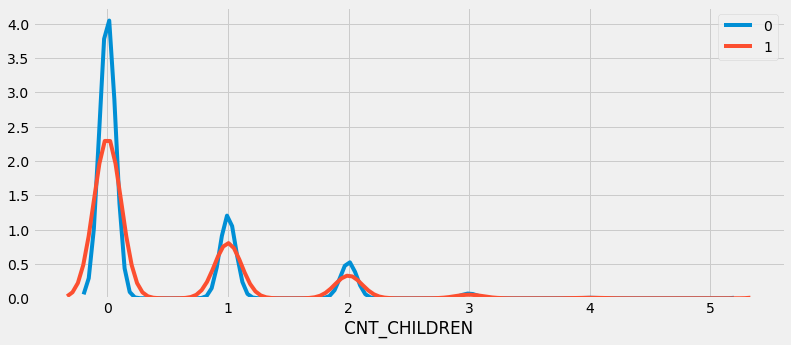

In [169]:
# I wanted to analyse continuous column with respect to the target column

sns.distplot(df_0['CNT_CHILDREN'], hist = False, label=0)# Target = 0
sns.distplot(df_1['CNT_CHILDREN'], hist = False, label=1)# Taget = 1
plt.show()

* we can see that list number of children client has had more in other cases and less in payment difficulties but they has payment difficulties

In [170]:
#calculate the percentage of each income category.
df_0.AMT_INCOME_TOTAL.value_counts(normalize=True)

135000.000    0.129772
112500.000    0.110131
157500.000    0.097801
180000.000    0.092255
90000.000     0.078624
225000.000    0.078594
202500.000    0.062569
270000.000    0.042404
315000.000    0.023422
247500.000    0.021033
81000.000     0.020559
126000.000    0.017152
121500.000    0.013920
292500.000    0.013591
99000.000     0.013102
103500.000    0.012015
144000.000    0.011761
76500.000     0.010978
171000.000    0.010095
117000.000    0.008958
166500.000    0.007900
72000.000     0.007806
108000.000    0.007137
162000.000    0.006564
189000.000    0.006459
94500.000     0.006409
216000.000    0.005596
148500.000    0.005496
85500.000     0.005431
130500.000    0.004788
193500.000    0.004215
153000.000    0.003895
211500.000    0.003806
139500.000    0.003167
175500.000    0.003087
234000.000    0.002613
207000.000    0.002454
252000.000    0.002239
184500.000    0.002105
261000.000    0.002010
238500.000    0.001791
243000.000    0.001646
256500.000    0.001591
220500.000 

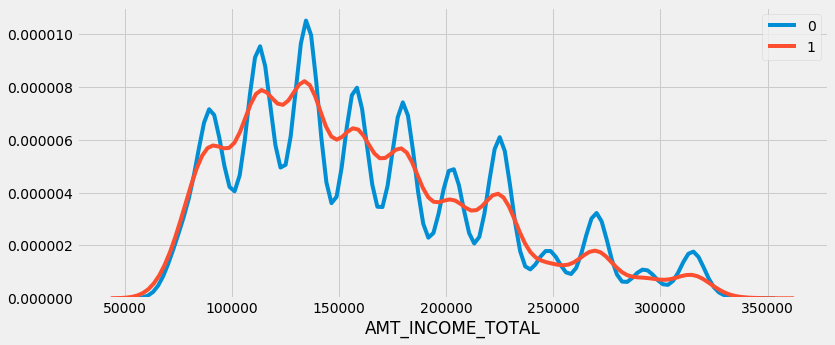

In [171]:
# I wanted to analyse continuous column with respect to the target column

sns.distplot(df_0['AMT_INCOME_TOTAL'], hist = False, label=0)# Target = 0
sns.distplot(df_1['AMT_INCOME_TOTAL'], hist = False, label=1)# Taget = 1
plt.show()

* clearly we can see that those are mid earners has payment difficulties

In [172]:
#calculate the percentage of each credit category.
df_0.AMT_CREDIT.value_counts(normalize=True)


13.017005    0.032025
13.422469    0.030379
12.323860    0.026813
12.506181    0.025746
12.100718    0.021556
13.710151    0.020803
13.603123    0.014314
12.447846    0.014135
13.208616    0.013262
13.933294    0.012424
13.534726    0.012080
13.890804    0.010080
11.813037    0.009806
13.164045    0.009766
14.068874    0.009312
13.026955    0.009157
12.558140    0.009082
13.569509    0.008010
12.504513    0.007367
12.419170    0.007247
12.660331    0.007202
14.115616    0.007013
12.218500    0.006758
12.387773    0.006688
13.199326    0.006494
13.822408    0.006369
12.911645    0.006070
12.793862    0.005995
13.139214    0.005990
13.429114    0.005960
13.369350    0.005860
12.729324    0.005811
13.117393    0.005067
13.635643    0.005027
13.292209    0.004993
13.756080    0.004738
13.112315    0.004529
14.251195    0.004489
13.279369    0.004349
12.657470    0.004234
11.937023    0.004020
13.173991    0.003561
11.967187    0.003387
13.498689    0.003367
13.609767    0.003357
13.207609 

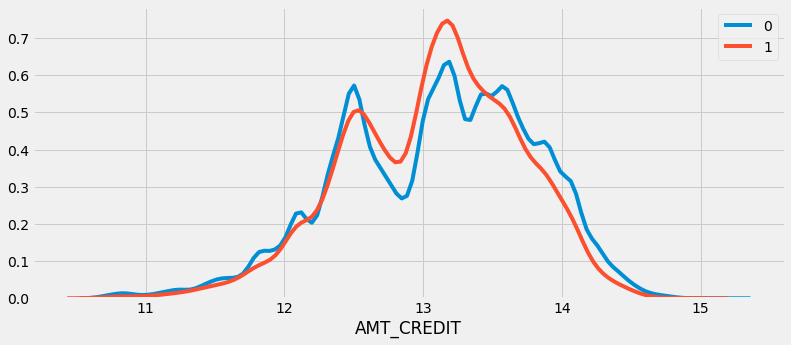

In [173]:
# I wanted to analyse continuous column with respect to the target column

sns.distplot(df_0['AMT_CREDIT'], hist = False, label=0)# Target = 0
sns.distplot(df_1['AMT_CREDIT'], hist = False, label=1)# Taget = 1
plt.show()

* credit amount is more in payment difficulty than other cases

In [174]:
#calculate the percentage of each annuity category.
df_0.AMT_ANNUITY.value_counts(normalize=True)

9.510519     0.020145
9.105091     0.018484
10.540091    0.005940
9.222862     0.005716
8.817446     0.005591
               ...   
11.180051    0.000005
11.084893    0.000005
8.075272     0.000005
11.338441    0.000005
10.765607    0.000005
Name: AMT_ANNUITY, Length: 12150, dtype: float64

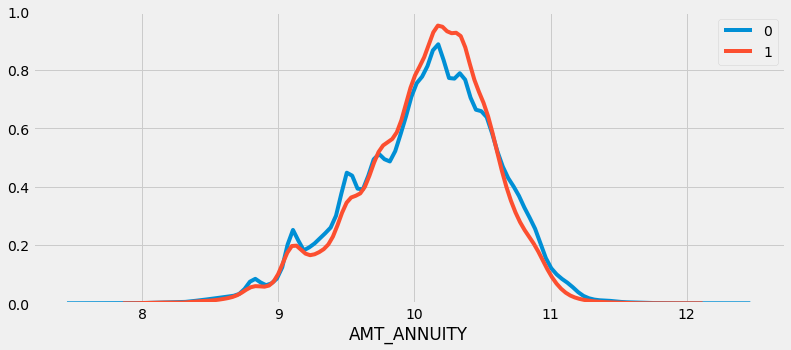

In [175]:
# I wanted to analyse continuous column with respect to the target column

sns.distplot(df_0['AMT_ANNUITY'], hist = False, label=0)# Target = 0
sns.distplot(df_1['AMT_ANNUITY'], hist = False, label=1)# Taget = 1
plt.show()

* it seems normaly distributed mid range annuity is more in payment difficulty 

In [176]:
#calculate the percentage of each product category.
df_0.AMT_GOODS_PRICE.value_counts(normalize=True)

13.422469    0.083951
13.017005    0.082305
12.323860    0.079437
13.710151    0.051158
12.506181    0.039028
13.026955    0.031616
13.933294    0.031407
12.100718    0.030010
11.813037    0.022878
13.429114    0.018180
12.660331    0.017362
14.115616    0.015920
12.382129    0.015402
12.793862    0.014938
12.419170    0.014504
13.046564    0.013930
13.199326    0.013237
13.112315    0.012010
12.911645    0.010040
13.065795    0.009736
12.218500    0.009526
13.279369    0.009342
12.729324    0.008758
11.407576    0.008638
12.343663    0.007860
11.967187    0.007771
13.353477    0.007491
13.487008    0.006828
13.442272    0.006738
14.269766    0.006239
11.630717    0.006005
14.403298    0.005850
13.075274    0.005686
12.586223    0.005676
13.604791    0.005407
13.455259    0.005197
13.715139    0.005097
11.908347    0.005032
12.854487    0.004833
13.547632    0.004738
12.554971    0.004579
12.437188    0.004434
13.758941    0.004055
13.937287    0.004010
12.363081    0.003990
11.119898 

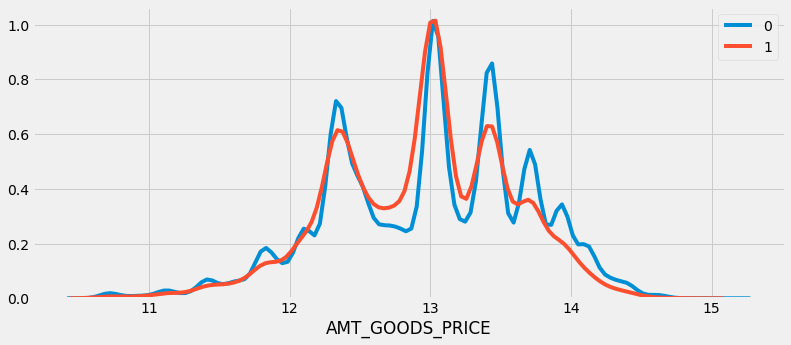

In [177]:
# I wanted to analyse continuous column with respect to the target column

sns.distplot(df_0['AMT_GOODS_PRICE'], hist = False, label=0)# Target = 0
sns.distplot(df_1['AMT_GOODS_PRICE'], hist = False, label=1)# Taget = 1
plt.show()

* both are in same

In [178]:
#calculate the percentage of each region category.
df_0.REGION_POPULATION_RELATIVE.value_counts(normalize=True)



0.033978    0.056060
0.029405    0.041083
0.024252    0.040160
0.043244    0.039527
0.025391    0.038948
0.029930    0.036639
0.027487    0.036090
0.018571    0.029422
0.018333    0.025063
0.018129    0.023686
0.020091    0.023317
0.021885    0.023167
0.019651    0.022998
0.014882    0.022040
0.065468    0.021965
0.023737    0.021890
0.031052    0.020968
0.019126    0.020519
0.018287    0.019686
0.017726    0.019317
0.017556    0.018494
0.014211    0.015756
0.016209    0.014813
0.006947    0.014140
0.022049    0.012838
0.009858    0.012419
0.009884    0.011841
0.011501    0.011806
0.004923    0.011501
0.009995    0.010469
0.010789    0.010379
0.010476    0.010140
0.011457    0.010115
0.014158    0.010010
0.007250    0.009521
0.009051    0.009122
0.010337    0.008973
0.006564    0.008728
0.007045    0.008474
0.009519    0.008289
0.010120    0.008110
0.008515    0.008040
0.009493    0.007436
0.010392    0.007167
0.009205    0.007077
0.006150    0.006688
0.007226    0.006688
0.006782    0

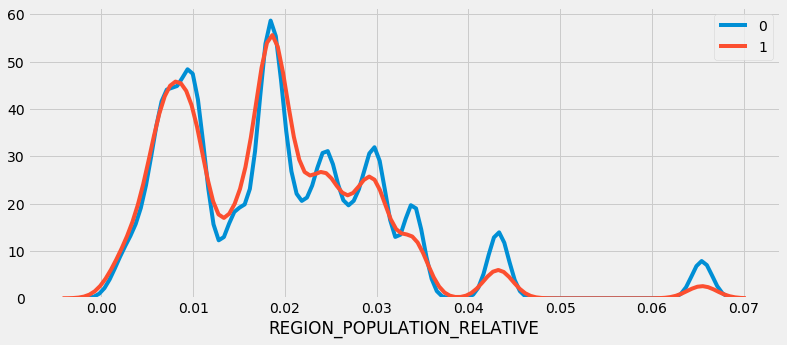

In [179]:
# I wanted to analyse continuous column with respect to the target column

sns.distplot(df_0['REGION_POPULATION_RELATIVE'], hist = False, label=0)# Target = 0
sns.distplot(df_1['REGION_POPULATION_RELATIVE'], hist = False, label=1)# Taget = 1
plt.show()

* look same in peak and seems mostly involve in other cases

In [180]:
#calculate the percentage of each duration category.
df_0.HOUR_APPR_PROCESS_START.value_counts(normalize=True)

10    0.122226
11    0.121842
12    0.111901
13    0.102141
14    0.091781
9     0.088091
15    0.081866
16    0.068450
17    0.049936
8     0.047038
18    0.030000
7     0.027995
6     0.016733
19    0.012040
5     0.010539
4     0.006389
20    0.004035
3     0.003726
21    0.001372
2     0.000888
22    0.000534
1     0.000264
23    0.000125
0     0.000090
Name: HOUR_APPR_PROCESS_START, dtype: float64

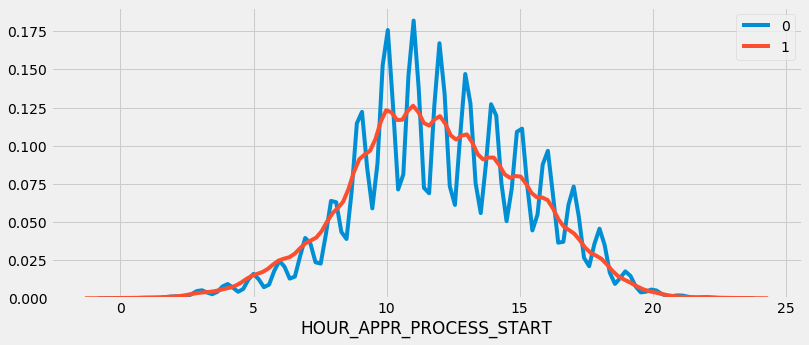

In [181]:
# I wanted to analyse continuous column with respect to the target column

sns.distplot(df_0['HOUR_APPR_PROCESS_START'], hist = False, label=0)# Target = 0
sns.distplot(df_1['HOUR_APPR_PROCESS_START'], hist = False, label=1)# Taget = 1
plt.show()

* mostly involve in other cases

### Perform bivariate analysis for numerical variables for both 0 and 1

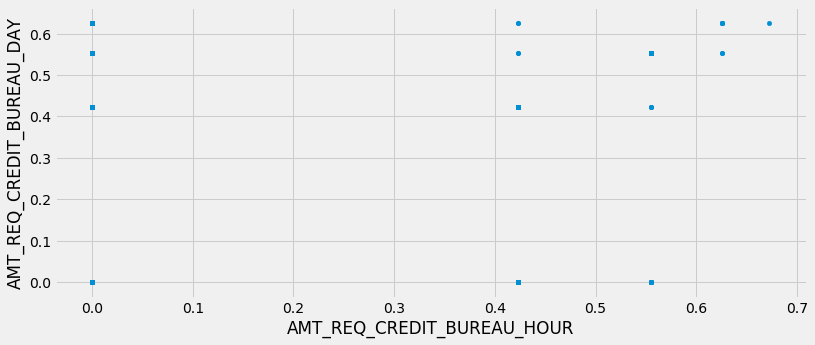

In [182]:
#plot the scatter plot
df_0.plot.scatter(x="AMT_REQ_CREDIT_BUREAU_HOUR",y="AMT_REQ_CREDIT_BUREAU_DAY")
plt.show()

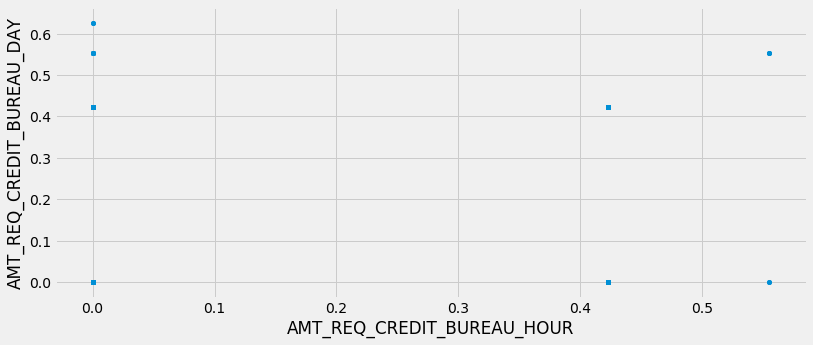

In [183]:
#Scatter plot of AMT_REQ_CREDIT_BUREAU_HOUR and AMT_REQ_CREDIT_BUREAU_DAY variable df_1
df_1.plot.scatter(x="AMT_REQ_CREDIT_BUREAU_HOUR",y="AMT_REQ_CREDIT_BUREAU_DAY")
plt.show()

* The Number of enquiries to Credit Bureau about the client one hour before application and one day before application for df_0 lies in between 0.4 to 0.7.  
* The Number of enquiries to Credit Bureau about the client one hour before application and one day before application for df_1 lies in between 0.4 to 0.65.  
* So we can infer that enqueries were more for others that is in df_0, while there was less enqueries in df_1, so those enqueries close to 0.7 can disrupt the clients credit score

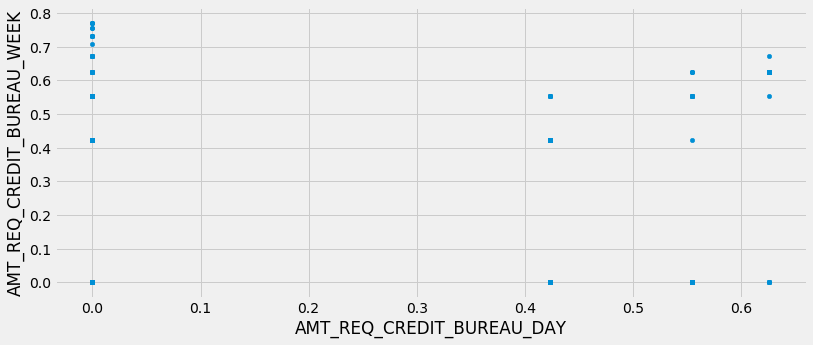

In [184]:

df_0.plot.scatter(x="AMT_REQ_CREDIT_BUREAU_DAY",y="AMT_REQ_CREDIT_BUREAU_WEEK")
plt.show()

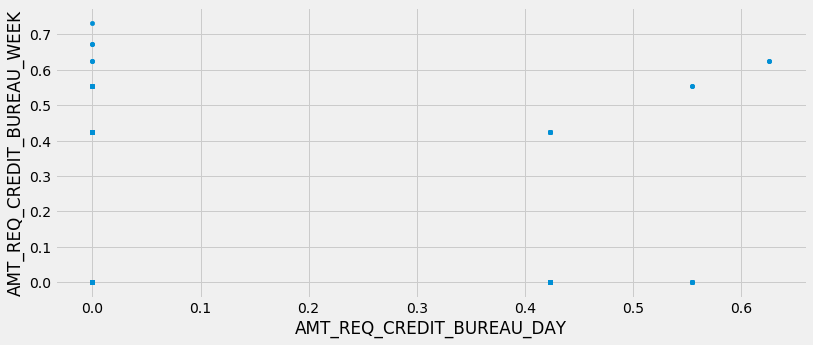

In [185]:

#Scatter plot of AMT_REQ_CREDIT_BUREAU_DAY and AMT_REQ_CREDIT_BUREAU_WEEK variable in df_1
df_1.plot.scatter(x="AMT_REQ_CREDIT_BUREAU_DAY",y="AMT_REQ_CREDIT_BUREAU_WEEK")
plt.show()

* The Number of enquiries to Credit Bureau about the client one day before application and one week before application(excluding previous one day) for df_0 lies in between 0.4 to 0.7.  
* The Number of enquiries to Credit Bureau about the client one day before application and one week before application(excluding previous one day) for df_1 lies in between 0.4 to 0.6.  
* So we can infer that enqueries were more for others that is in df_0, while there was less enqueries in df_1, so those enqueries close to 0.7 can disrupt the clients credit score

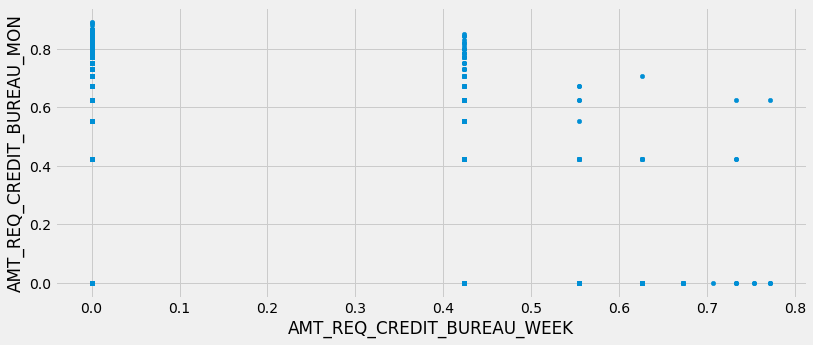

In [186]:

df_0.plot.scatter(x="AMT_REQ_CREDIT_BUREAU_WEEK",y="AMT_REQ_CREDIT_BUREAU_MON")
plt.show()

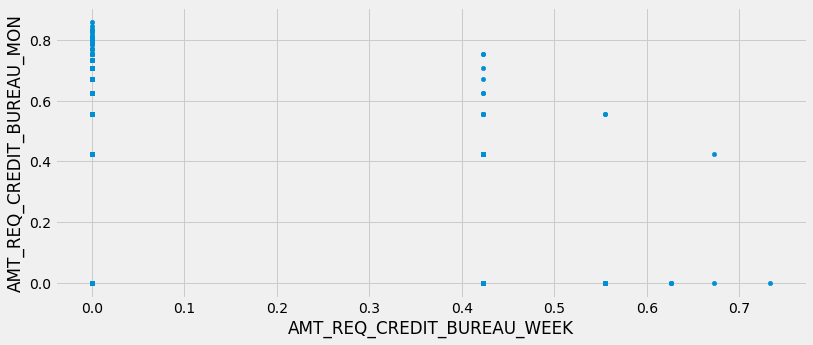

In [187]:
#Scatter plot of AMT_REQ_CREDIT_BUREAU_DAY and AMT_REQ_CREDIT_BUREAU_WEEK variable in df_1
df_1.plot.scatter(x="AMT_REQ_CREDIT_BUREAU_WEEK",y="AMT_REQ_CREDIT_BUREAU_MON")
plt.show()

* The Number of enquiries to Credit Bureau about the client one week before application(excluding previous one day) and one month before application(excluding previous one week) for df_0 lies in between 0.4 to 0.8.  
* The Number of enquiries to Credit Bureau about the client one week before application(excluding previous one day) and one month before application(excluding previous one week) for df_1 lies in between 0.4 to 0.75.  
* So we can infer that enqueries were more for others that is in df_0, while there was less enqueries in df_1, so those enqueries close to 0.8 can disrupt the clients credit score

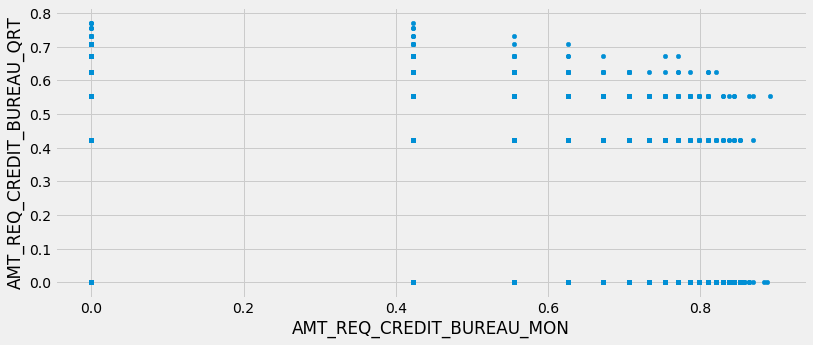

In [188]:

df_0.plot.scatter(x="AMT_REQ_CREDIT_BUREAU_MON",y="AMT_REQ_CREDIT_BUREAU_QRT")
plt.show()

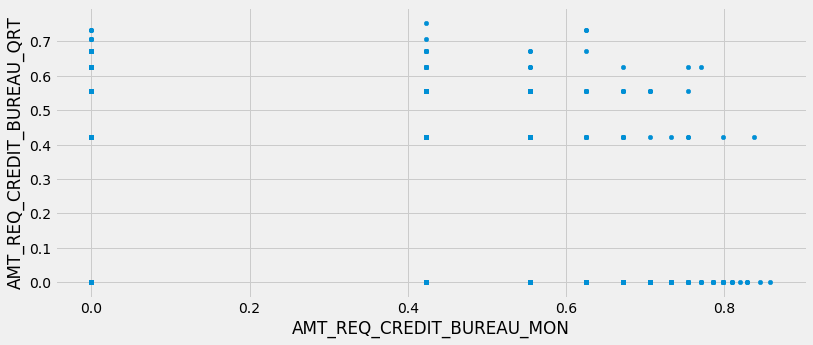

In [189]:
#Scatter plot of AMT_REQ_CREDIT_BUREAU_MON and AMT_REQ_CREDIT_BUREAU_QRT variable in df_1
df_1.plot.scatter(x="AMT_REQ_CREDIT_BUREAU_MON",y="AMT_REQ_CREDIT_BUREAU_QRT")
plt.show()

* The Number of enquiries to Credit Bureau about the client one month before application(excluding previous one week) and one quarter before application(excluding previous one month) for df_0 lies in between 0.4 to 0.9.  
* The Number of enquiries to Credit Bureau about the client one month before application(excluding previous one week) and one quarter before application(excluding previous one month) for df_1 lies in between 0.4 to 0.9.  
* So we can infer that enqueries were more for others that is in df_0, while there was less enqueries in df_1, so those enqueries close to 0.8 can disrupt the clients credit score

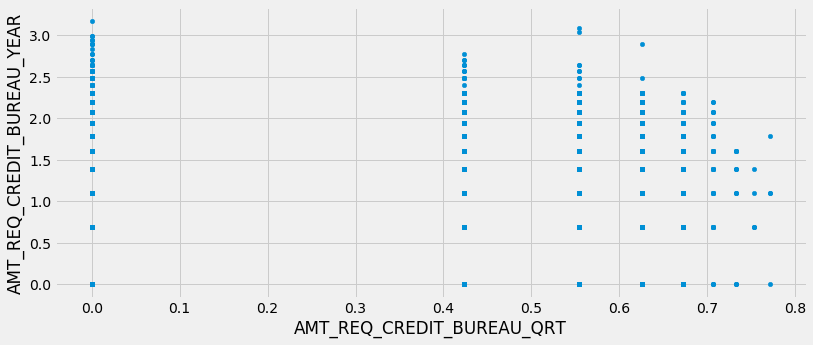

In [190]:

df_0.plot.scatter(x="AMT_REQ_CREDIT_BUREAU_QRT",y="AMT_REQ_CREDIT_BUREAU_YEAR")
plt.show()

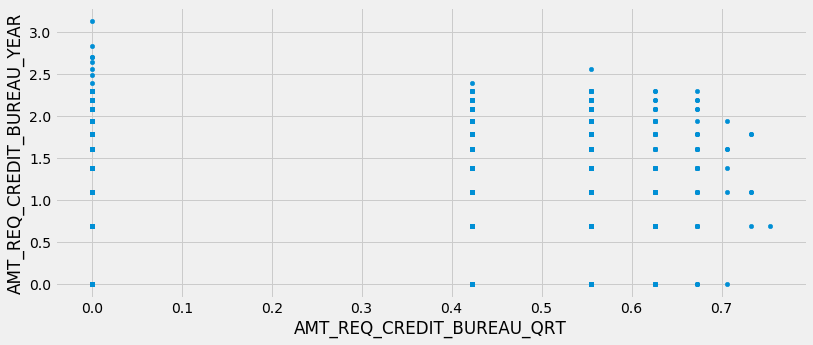

In [191]:
df_1.plot.scatter(x="AMT_REQ_CREDIT_BUREAU_QRT",y="AMT_REQ_CREDIT_BUREAU_YEAR")
plt.show()

* The Number of enquiries to Credit Bureau about the client one quarter before application(excluding previous one month) lies between 0.4 to 0.8 and one year before application(excluding previous 3 months) for df_0 lies in between 0.5 to 3.  
* The Number of enquiries to Credit Bureau about the client one quarter before application(excluding previous one month) lies between 0.4 to 0.8 and one year before application(excluding previous 3 months) for df_1 lies in between 0.5 to 3.    
* So we can infer that enqueries were more for others that is in df_0, while there was less enqueries in df_1, so those enqueries close to 0.8 can disrupt the clients credit score
* And moreover requests close to 3 were done for some of the clients which can hamper their credit scores.

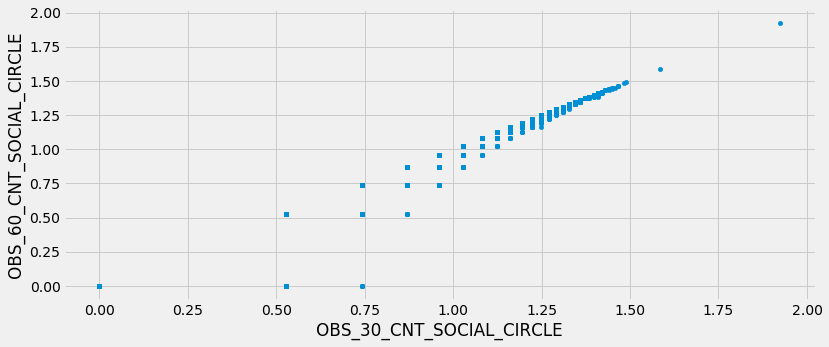

In [192]:
df_0.plot.scatter(x="OBS_30_CNT_SOCIAL_CIRCLE",y="OBS_60_CNT_SOCIAL_CIRCLE")
plt.show()


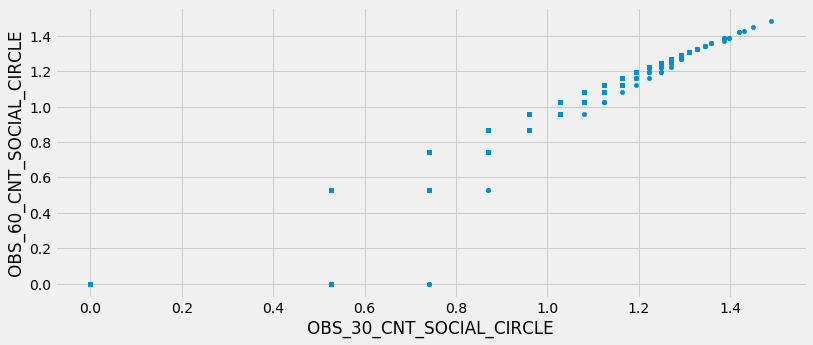

In [193]:
df_1.plot.scatter(x="OBS_30_CNT_SOCIAL_CIRCLE",y="OBS_60_CNT_SOCIAL_CIRCLE")
plt.show()

* The number of observations of client's social surroundings with observable 30 DPD and 60 DPD(days past due) default were more in df_0(others) than df_1 ranging from 0.5 to 2.  
* So there were more numbers of defaulters for a client ranging from 0.5 to 1.4 . The more the value more likely that they will default the loan.


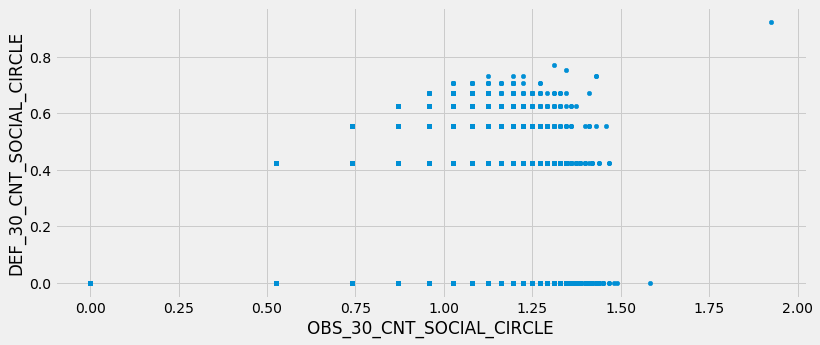

In [194]:

df_0.plot.scatter(x="OBS_30_CNT_SOCIAL_CIRCLE",y="DEF_30_CNT_SOCIAL_CIRCLE")
plt.show()


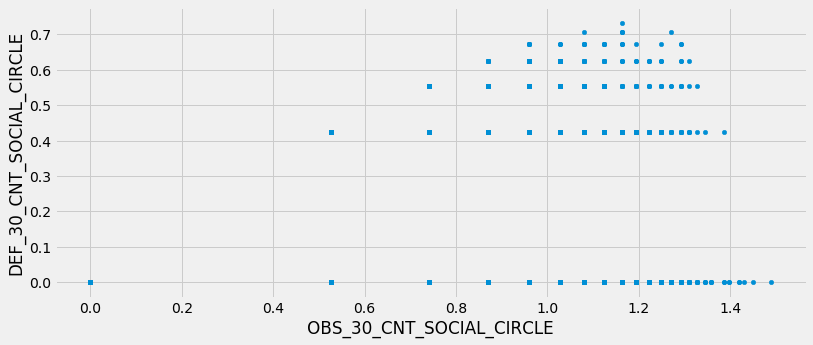

In [195]:
df_1.plot.scatter(x="OBS_30_CNT_SOCIAL_CIRCLE",y="DEF_30_CNT_SOCIAL_CIRCLE")
plt.show()


* The number of observations of client's social surroundings with observable 30 DPD and client with surroundings defaulted on 30 DPD(days past due) default were more in df_0(others) than df_1 ranging from 0.5 to 1.5.  
* So there were more numbers of defaulters for a client ranging from 0.5 to 1.5 . The more the value more likely that they will default the loan.

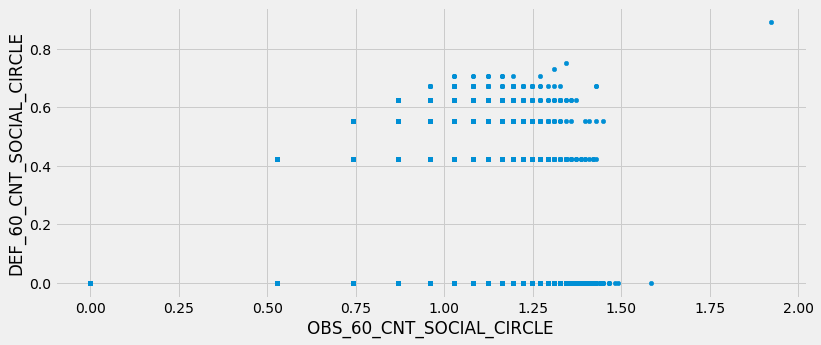

In [196]:
df_0.plot.scatter(x="OBS_60_CNT_SOCIAL_CIRCLE",y="DEF_60_CNT_SOCIAL_CIRCLE")
plt.show()


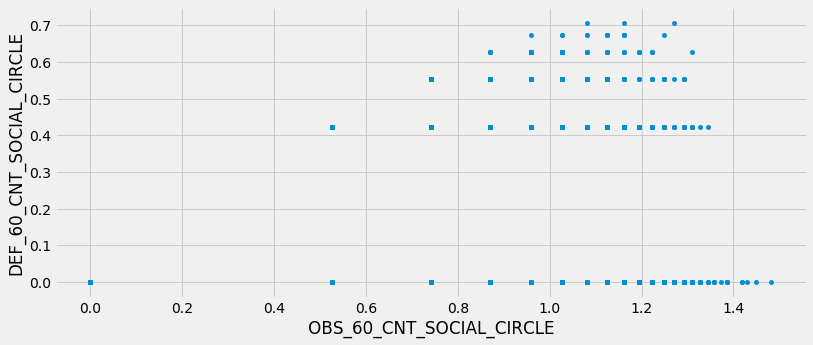

In [197]:
df_1.plot.scatter(x="OBS_60_CNT_SOCIAL_CIRCLE",y="DEF_60_CNT_SOCIAL_CIRCLE")
plt.show()

* The number of observations of client's social surroundings with observable 60 DPD and client with surroundings defaulted on 60 DPD(days past due) default were more in df_0(others) than df_1 ranging from 0.5 to 1.5.  
* So there were more numbers of defaulters for a client ranging from 0.5 to 1.5 . The more the value more likely that they will default the loan.

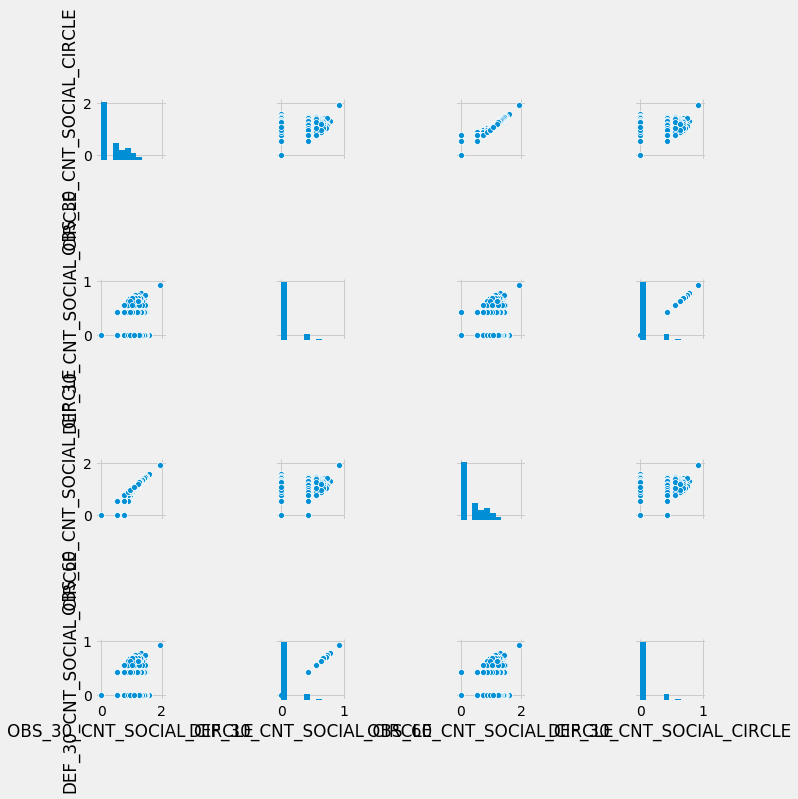

In [198]:
#plot the pair plot
sns.pairplot(data = df_0, vars = ['OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE'])
plt.show()

* we can see the variation data

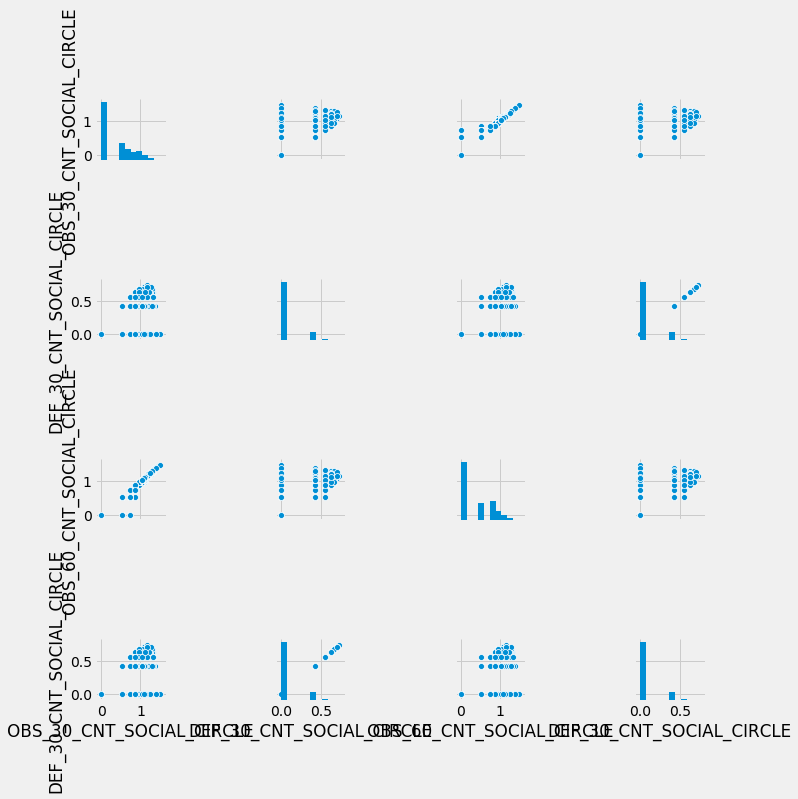

In [199]:
#plot the pair plot
sns.pairplot(data = df_1, vars = ['OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE'])
plt.show()

#### Comparing both the variable

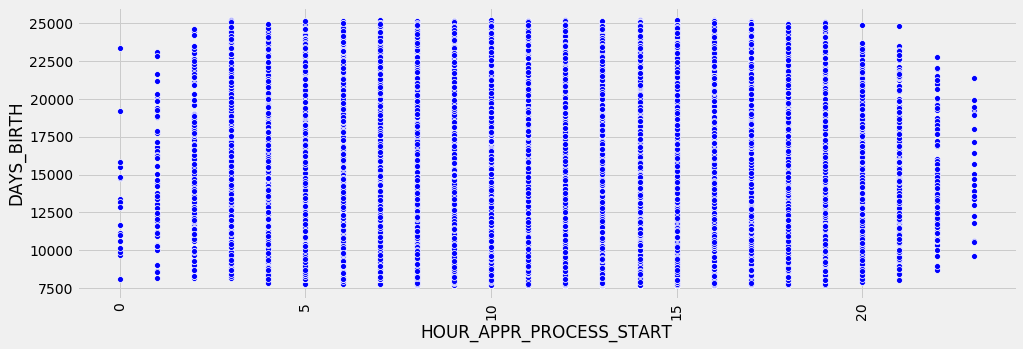

In [200]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 5)
sns.scatterplot(df_0['HOUR_APPR_PROCESS_START'],
            df_0['DAYS_BIRTH'],
            color = 'blue',
            )

plt.xticks(rotation = 90)
plt.show()

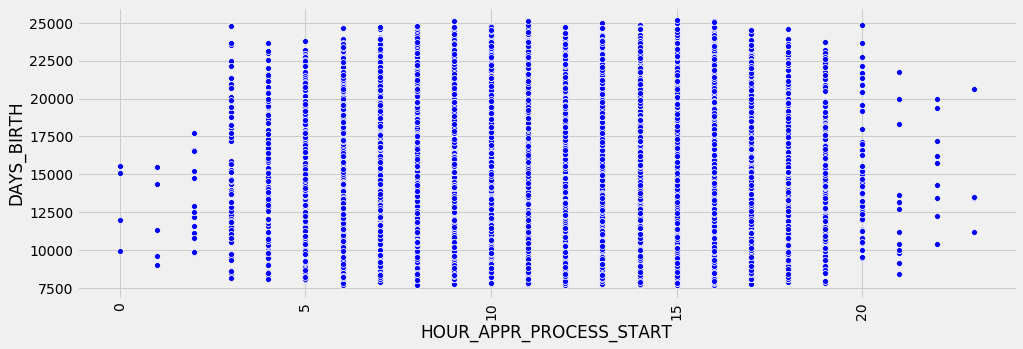

In [201]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 5)
sns.scatterplot(df_1['HOUR_APPR_PROCESS_START'],
            df_1['DAYS_BIRTH'],
            color = 'blue',
            )

plt.xticks(rotation = 90)
plt.show()

* we can see that in df_1 middle were highly concentrated where in df_0 it remain same from start to end 
* That means those are in payment difficulty they were those clients who taken 5 to 15 of hours to register or fill the form

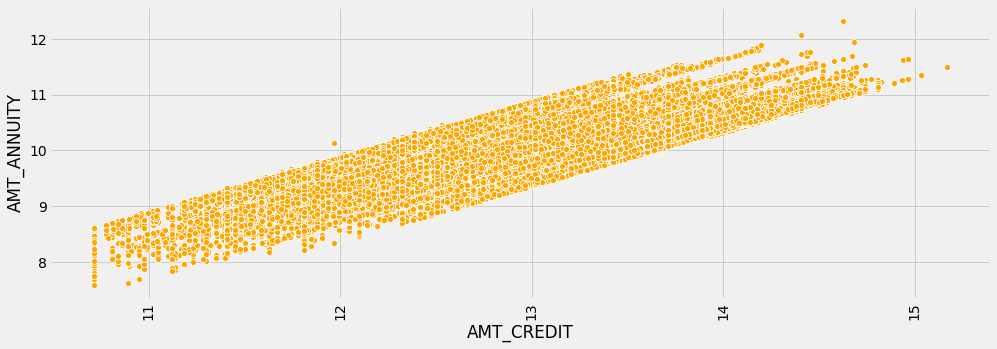

In [202]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 5)
sns.scatterplot(df_0['AMT_CREDIT'],
            df_0['AMT_ANNUITY'],
            color = 'orange',
            )

plt.xticks(rotation = 90)
plt.show()

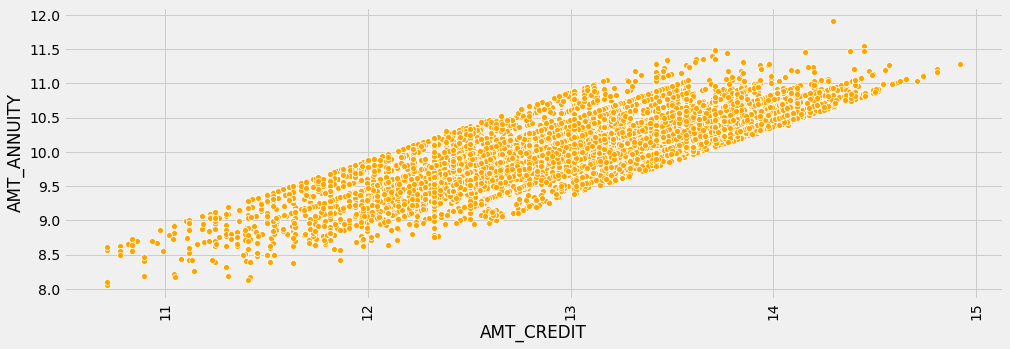

In [203]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 5)
sns.scatterplot(df_1['AMT_CREDIT'],
            df_1['AMT_ANNUITY'],
            color = 'orange',
            )

plt.xticks(rotation = 90)
plt.show()

* we can see that in df_1 middle were highly concentrated where in df_0 it remain same from start to end 
* That means those are in payment difficulty they were those clients whose credit value in  12 to 14 of range 

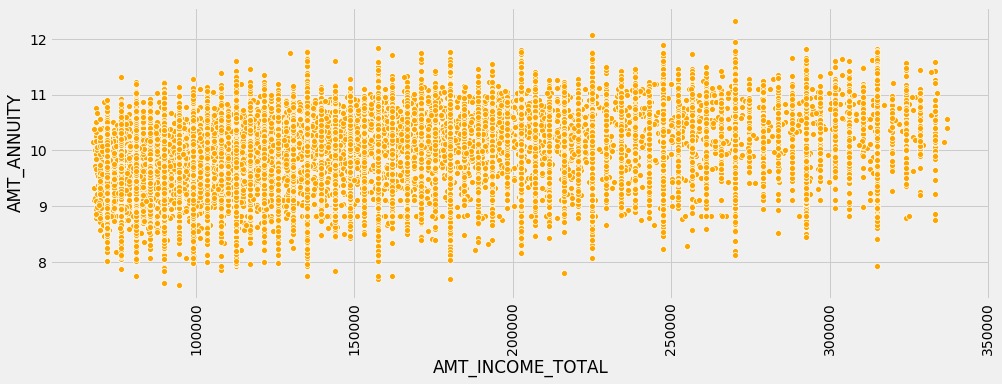

In [204]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 5)
sns.scatterplot(df_0['AMT_INCOME_TOTAL'],
            df_0['AMT_ANNUITY'],
            color = 'orange',
            )

plt.xticks(rotation = 90)
plt.show()

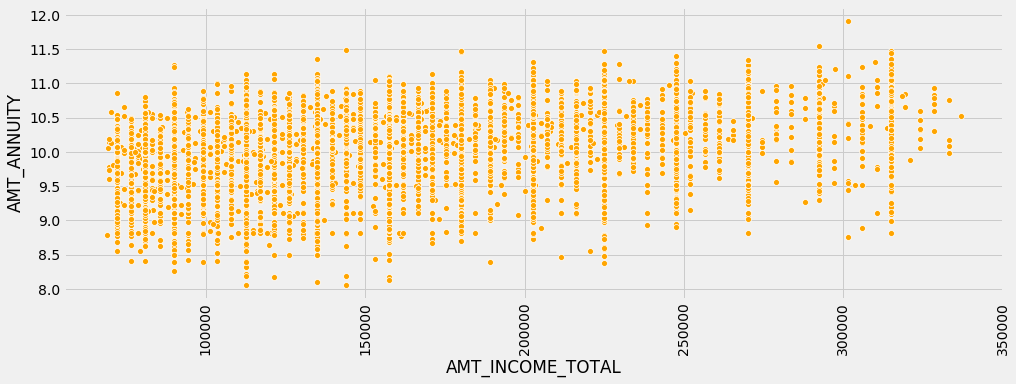

In [205]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 5)
sns.scatterplot(df_1['AMT_INCOME_TOTAL'],
            df_1['AMT_ANNUITY'],
            color = 'orange',
            )

plt.xticks(rotation = 90)
plt.show()

* we can see that in df_1 begining were highly concentrated where in df_0 it remain same from start to end 
* That means those are in payment difficulty they were those clients whose income total lies in range from begning like 60,000 to 2,00,000

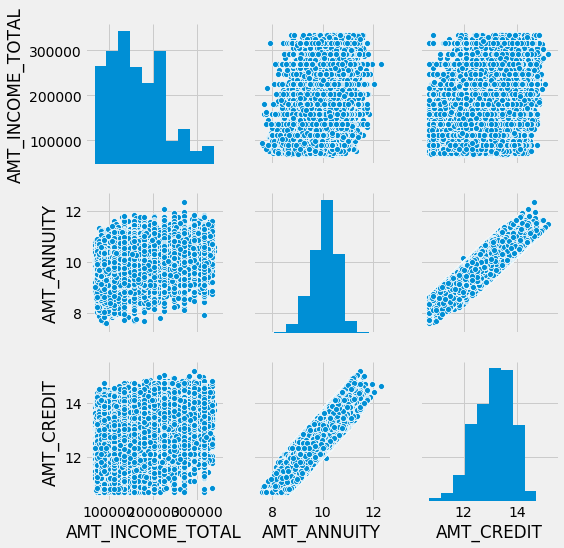

In [206]:
#plot the pair plot
sns.pairplot(data = df_0, vars = ['AMT_INCOME_TOTAL','AMT_ANNUITY','AMT_CREDIT'])
plt.show()

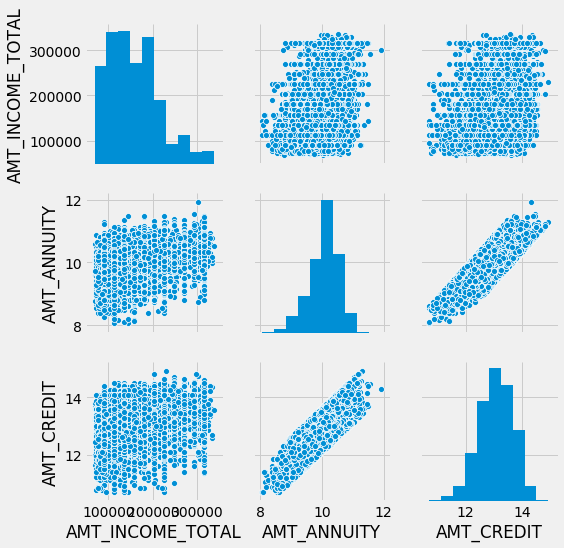

In [207]:
#plot the pair plot of AMT_INCOME_TOTAL, AMT_ANNUITY and AMT_CREDIT in df_1 dataframe.
sns.pairplot(data = df_1, vars = ['AMT_INCOME_TOTAL','AMT_ANNUITY','AMT_CREDIT'])
plt.show()

* We can clearly see the variation

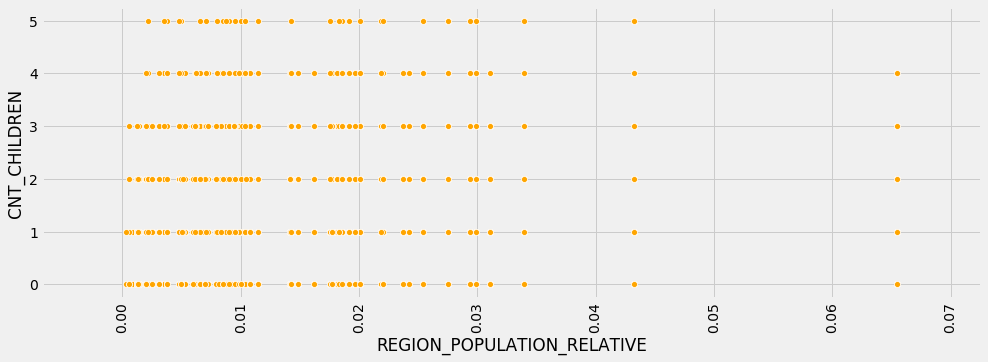

In [208]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 5)
sns.scatterplot(df_0['REGION_POPULATION_RELATIVE'],
            df_0['CNT_CHILDREN'],
            color = 'orange',
            )

plt.xticks(rotation = 90)
plt.show()


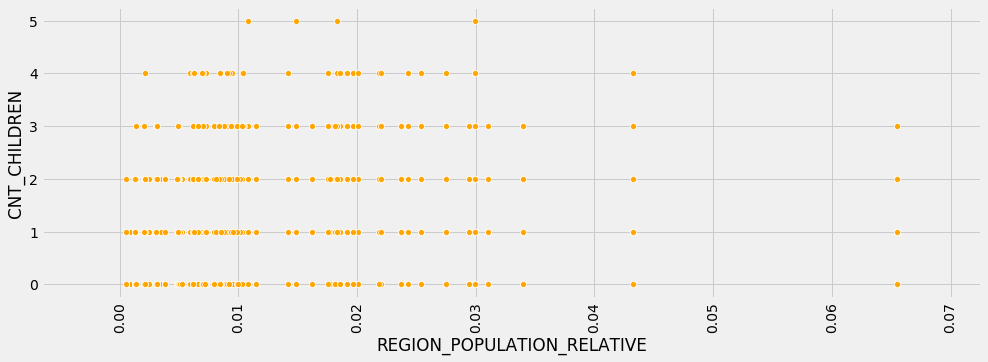

In [209]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 5)
sns.scatterplot(df_1['REGION_POPULATION_RELATIVE'],
            df_1['CNT_CHILDREN'],
            color = 'orange',
            )

plt.xticks(rotation = 90)
plt.show()

* we can notice that in df_1 range 0 to 0.01 lives in population region were payment difficulty and than in range 0.02 also.
* where as df_0 holds somewhat same 

In [210]:
# 'DAYS_LAST_PHONE_CHANGE','DAYS_EMPLOYED','DAYS_REGISTRATION','
df_0.DAYS_ID_PUBLISH.describe()

count    200498.000000
mean      -3059.500579
std        1486.013657
min       -7197.000000
25%       -4325.000000
50%       -3346.000000
75%       -1832.000000
max           0.000000
Name: DAYS_ID_PUBLISH, dtype: float64

#### For better analysis we will convert value into absolute

In [211]:
df_0.DAYS_ID_PUBLISH=df_0.DAYS_ID_PUBLISH.apply(lambda x: np.abs(x))

C:\Users\Abhisek Chand\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [212]:
df_1.DAYS_ID_PUBLISH=df_1.DAYS_ID_PUBLISH.apply(lambda x: np.abs(x))

In [213]:
# 'DAYS_LAST_PHONE_CHANGE','DAYS_EMPLOYED','DAYS_REGISTRATION'
df_0.DAYS_ID_PUBLISH.describe()

count    200498.000000
mean       3059.500579
std        1486.013657
min           0.000000
25%        1832.000000
50%        3346.000000
75%        4325.000000
max        7197.000000
Name: DAYS_ID_PUBLISH, dtype: float64

* we can see that it change

In [214]:
# 'DAYS_LAST_PHONE_CHANGE','DAYS_EMPLOYED'
df_0.DAYS_REGISTRATION.describe()

count    200498.000000
mean      -5019.900782
std        3520.205187
min      -24672.000000
25%       -7529.000000
50%       -4552.000000
75%       -2042.000000
max           0.000000
Name: DAYS_REGISTRATION, dtype: float64

In [215]:
df_0.DAYS_REGISTRATION=df_0.DAYS_REGISTRATION.apply(lambda x: np.abs(x))

In [216]:
df_1.DAYS_REGISTRATION=df_1.DAYS_REGISTRATION.apply(lambda x: np.abs(x))

In [217]:
# 'DAYS_LAST_PHONE_CHANGE'
df_0.DAYS_EMPLOYED.describe()

count    200498.000000
mean      -2083.784522
std        2410.427131
min      -16767.000000
25%       -2946.000000
50%       -1319.000000
75%        -328.000000
max           0.000000
Name: DAYS_EMPLOYED, dtype: float64

In [218]:
df_0.DAYS_EMPLOYED=df_0.DAYS_EMPLOYED.apply(lambda x: np.abs(x))

In [219]:
df_1.DAYS_EMPLOYED=df_1.DAYS_EMPLOYED.apply(lambda x: np.abs(x))

In [220]:
# '','','','
df_0.DAYS_LAST_PHONE_CHANGE.describe()

count    200498.000000
mean      -1009.233499
std         836.509455
min       -4185.000000
25%       -1625.000000
50%        -832.000000
75%        -299.000000
max           0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

In [221]:
df_0.DAYS_LAST_PHONE_CHANGE=df_0.DAYS_LAST_PHONE_CHANGE.apply(lambda x: np.abs(x))

In [222]:
df_1.DAYS_LAST_PHONE_CHANGE=df_1.DAYS_LAST_PHONE_CHANGE.apply(lambda x: np.abs(x))

#### After changing we will continue our analysis

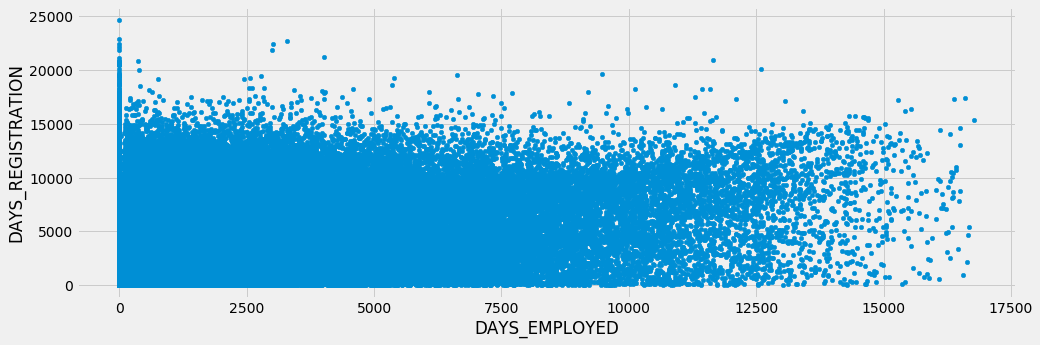

In [223]:
df_0.plot.scatter(x="DAYS_EMPLOYED",y="DAYS_REGISTRATION")
plt.show()

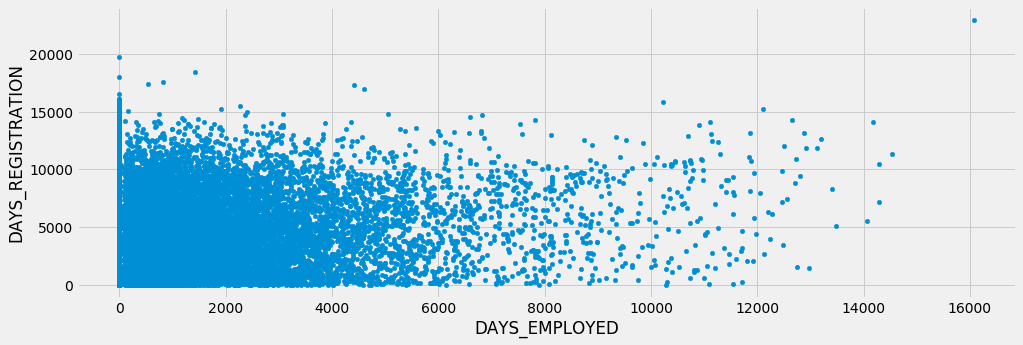

In [224]:
df_1.plot.scatter(x="DAYS_EMPLOYED",y="DAYS_REGISTRATION")
plt.show()

* From here , (df_1)payment difficult clients were more on begining where df_0(other cases) seem continue till 12,500 in range

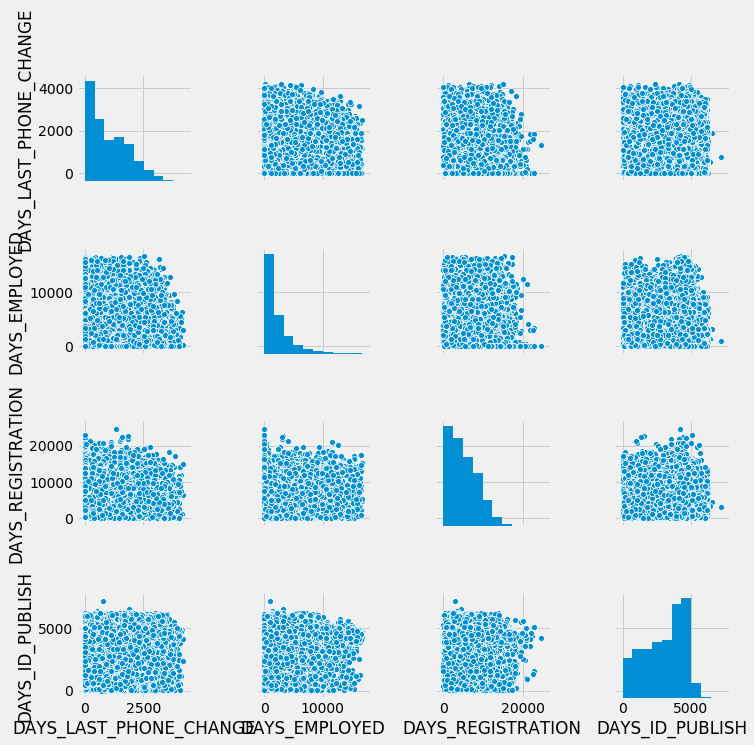

In [225]:
#plot the pair plot df_0
sns.pairplot(data = df_0, vars = ['DAYS_LAST_PHONE_CHANGE','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH'])
plt.show()

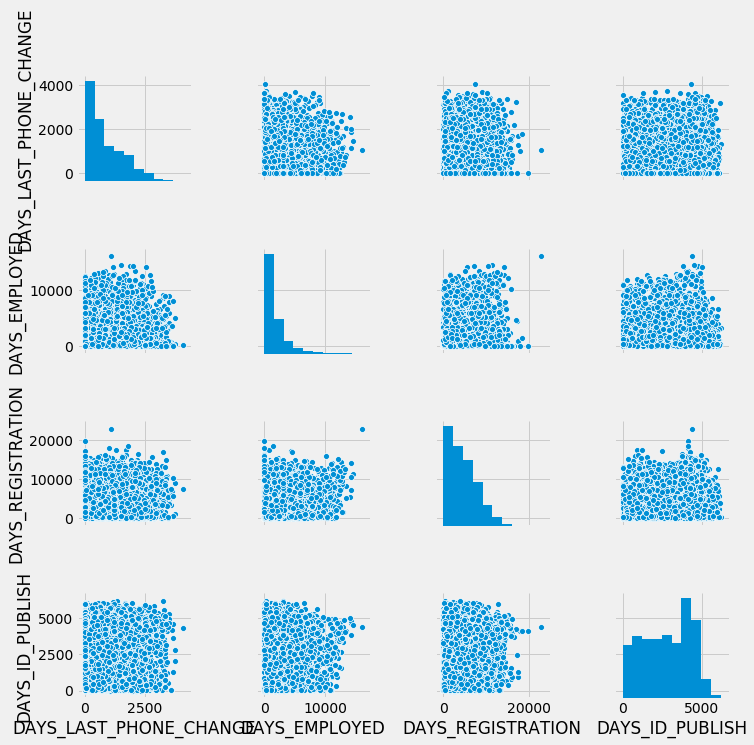

In [226]:
#plot the pair plot in df_1
sns.pairplot(data = df_1, vars = ['DAYS_LAST_PHONE_CHANGE','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH'])
plt.show()

* we can see that more were in df_1 than df_0(huge variance)

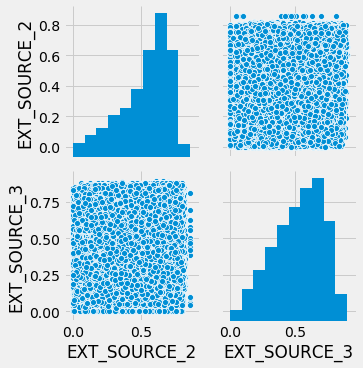

In [227]:
#plot the pair plot in df_0
sns.pairplot(data = df_0, vars = ['EXT_SOURCE_2','EXT_SOURCE_3'])
plt.show()

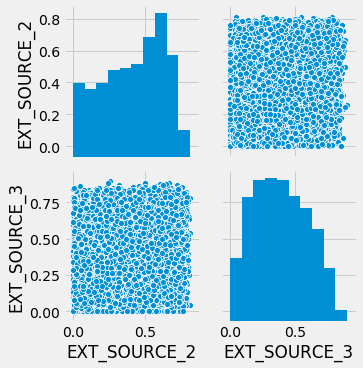

In [228]:
#plot the pair plot df_1
sns.pairplot(data = df_1, vars = ['EXT_SOURCE_2','EXT_SOURCE_3'])
plt.show()

* df_1 is more than df_0 

### Merge both the files "Application _data" and "Previous_Application"

In [229]:
data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       

In [230]:
data.shape

(217745, 75)

In [231]:
pre_data1.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [232]:
pre_data1.shape

(1670214, 37)

In [233]:
df_merge = pd.merge(data, pre_data1, on = "SK_ID_CURR", how = 'inner')

In [234]:
df_merge.shape

(1048328, 111)

In [235]:
# missing value after merging both the data sets
df_merge.isnull().sum()

SK_ID_CURR                            0
TARGET                                0
NAME_CONTRACT_TYPE_x                  0
CODE_GENDER                           0
FLAG_OWN_CAR                          0
FLAG_OWN_REALTY                       0
CNT_CHILDREN                          0
AMT_INCOME_TOTAL                      0
AMT_CREDIT_x                          0
AMT_ANNUITY_x                         0
AMT_GOODS_PRICE_x                     0
NAME_TYPE_SUITE_x                     0
NAME_INCOME_TYPE                      0
NAME_EDUCATION_TYPE                   0
NAME_FAMILY_STATUS                    0
NAME_HOUSING_TYPE                     0
REGION_POPULATION_RELATIVE            0
DAYS_BIRTH                            0
DAYS_EMPLOYED                         0
DAYS_REGISTRATION                     0
DAYS_ID_PUBLISH                       0
FLAG_MOBIL                            0
FLAG_EMP_PHONE                        0
FLAG_WORK_PHONE                       0
FLAG_CONT_MOBILE                      0


In [236]:
# Look at the number of unique categries in a column
df_merge.nunique().sort_values()

FLAG_DOCUMENT_2                       1
FLAG_MOBIL                            1
FLAG_DOCUMENT_12                      1
FLAG_DOCUMENT_11                      2
LIVE_REGION_NOT_WORK_REGION           2
REG_CITY_NOT_LIVE_CITY                2
REG_CITY_NOT_WORK_CITY                2
LIVE_CITY_NOT_WORK_CITY               2
FLAG_DOCUMENT_3                       2
FLAG_DOCUMENT_4                       2
FLAG_DOCUMENT_5                       2
FLAG_DOCUMENT_6                       2
FLAG_DOCUMENT_7                       2
FLAG_DOCUMENT_8                       2
FLAG_DOCUMENT_9                       2
FLAG_DOCUMENT_10                      2
FLAG_DOCUMENT_13                      2
FLAG_DOCUMENT_14                      2
FLAG_DOCUMENT_15                      2
FLAG_DOCUMENT_16                      2
FLAG_DOCUMENT_17                      2
FLAG_DOCUMENT_18                      2
FLAG_DOCUMENT_19                      2
FLAG_DOCUMENT_20                      2
FLAG_DOCUMENT_21                      2


* From this we can know which are category and continous attributes

### Perform univariate and bivariate analysis to find some pattern

#### Univariate analysis

In [237]:
df_merge.head()

SK_ID_CURR TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0      100002      1           Cash loans           M            N   
1      100008      0           Cash loans           M            N   
2      100008      0           Cash loans           M            N   
3      100008      0           Cash loans           M            N   
4      100008      0           Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0               Y             0          202500.0     12.915581   
1               Y             0           99000.0     13.103173   
2               Y             0           99000.0     13.103173   
3               Y             0           99000.0     13.103173   
4               Y             0           99000.0     13.103173   

   AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE_x NAME_INCOME_TYPE  \
0      10.114619          12.768544     Unaccompanied          Working   
1      10.222614          13.026955   Spouse, partner    State servant   
2      10.222614          13.026955   Spouse, partner    State servant   
3      10.222614          13.026955   Spouse, partner    State servant   
4      10.222614          13.026955   Spouse, partner    State servant   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1  Secondary / secondary special               Married  House / apartment   
2  Secondary / secondary special               Married  House / apartment   
3  Secondary / secondary special               Married  House / apartment   
4  Secondary / secondary special               Married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018287        9461           -637            -3648.0   
1                    0.033978       16941          -1588            -4970.0   
2                    0.033978       16941          -1588            -4970.0   
3                    0.033978       16941          -1588            -4970.0   
4                    0.033978       16941          -1588            -4970.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL FLAG_EMP_PHONE FLAG_WORK_PHONE  \
0            -2120           1              1               0   
1             -477           1              1               1   
2             -477           1              1               1   
3             -477           1              1               1   
4             -477           1              1               1   

  FLAG_CONT_MOBILE FLAG_PHONE FLAG_EMAIL CNT_FAM_MEMBERS REGION_RATING_CLIENT  \
0                1          1          0               1                    2   
1                1          1          0               2                    2   
2                1          1          0               2                    2   
3                1          1          0               2                    2   
4                1          1          0               2                    2   

  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START_x  \
0                           2                    WEDNESDAY   
1                           2                    WEDNESDAY   
2                           2                    WEDNESDAY   
3                           2                    WEDNESDAY   
4                           2                    WEDNESDAY   

   HOUR_APPR_PROCESS_START_x REG_REGION_NOT_LIVE_REGION  \
0                         10                          0   
1                         16                          0   
2                         16                          0   
3                         16                          0   
4                         16                          0   

  REG_REGION_NOT_WORK_REGION LIVE_REGION_NOT_WORK_REGION  \
0                          0                           0   
1                          0                           0   
2         

In [238]:
df_merge.NAME_CONTRACT_STATUS.value_counts()

Approved        650281
Canceled        192664
Refused         186565
Unused offer     18818
Name: NAME_CONTRACT_STATUS, dtype: int64

#### NAME_CONTRACT_TYPE_x - Identification if loan is cash or revolving

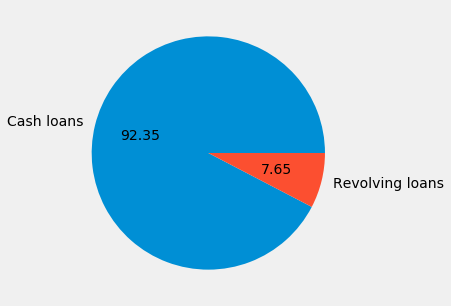

In [239]:
#plot the pie chart of NAME_CONTRACT_TYPE_x
plt.pie(df_merge['NAME_CONTRACT_TYPE_x'].value_counts(), autopct='%1.2f', labels = df_merge['NAME_CONTRACT_TYPE_x'].value_counts().index)
plt.show()

* Contract for Cash loan type of the previous application is more (i.e.92.35) than Contract for Revolving loans type of the previous application (i.e.7.65).  
* So we can infer that most of the clients are willing to pay loan in cast format than through Revolving Loans(i.e.by credit cards)

#### NAME_CONTRACT_TYPE_y - Contract product type (Cash loan, consumer loan [POS] ,...) of the previous application

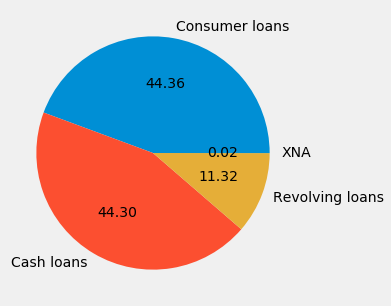

In [240]:
#plot the pie chart of NAME_CONTRACT_TYPE_y
plt.pie(df_merge['NAME_CONTRACT_TYPE_y'].value_counts(), autopct='%1.2f', labels = df_merge['NAME_CONTRACT_TYPE_y'].value_counts().index)
plt.show()

* Contract for Cash loan type of the previous application is 44.30 than Contract for Consumer loans type of the previous application is 44.36 and revolving loans had 11.32.  
* So we can infer that most of the clients are willing to pay loan in cast format and personal loans(i.e.Consumer loans) than through Revolving Loans(i.e.by credit cards)

#### NAME_FAMILY_STATUS - Family status of the client


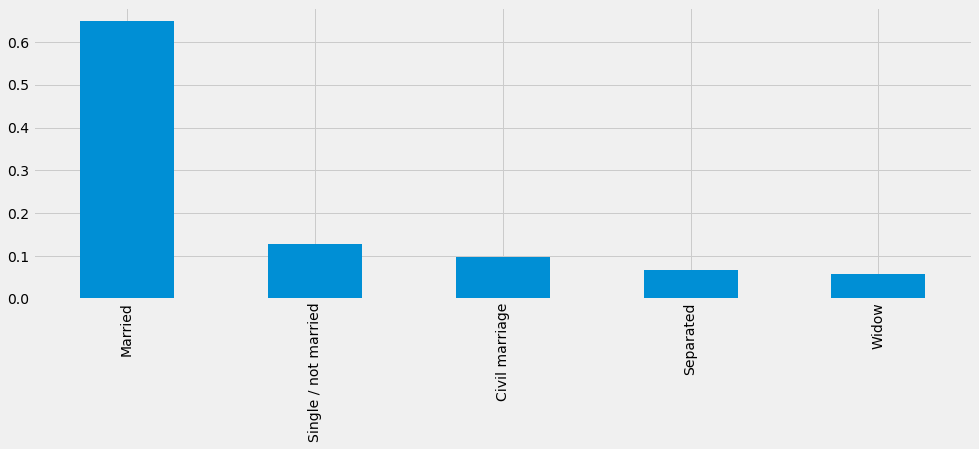

In [241]:

df_merge.NAME_FAMILY_STATUS.value_counts(normalize=True).plot.bar()
plt.show()

* Most of the clients who are married were taking loans

#### CNT_FAM_MEMBERS - How many family members does client have


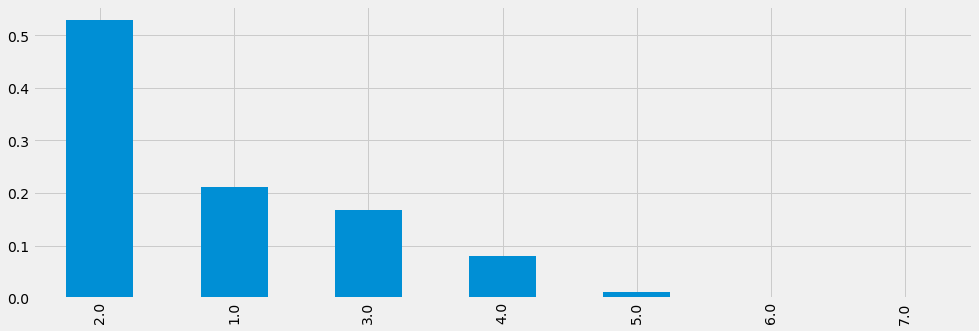

In [242]:

df_merge.CNT_FAM_MEMBERS.value_counts(normalize=True).plot.bar()
plt.show()

* Family members with 2 childeren had taken more loans

#### CODE_REJECT_REASON - Why was the previous application rejected

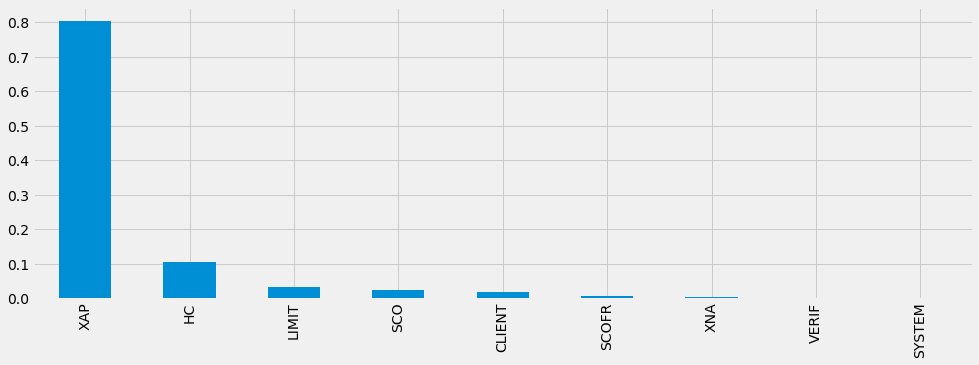

In [243]:

df_merge.CODE_REJECT_REASON.value_counts(normalize=True).plot.bar()
plt.show()

* Previous application types of clients are mostly in XAP(a consumer loan has no cashloanpurpose) while very few of the clients had some resons in previous applications(i.e. Limit, Hc, Sco)

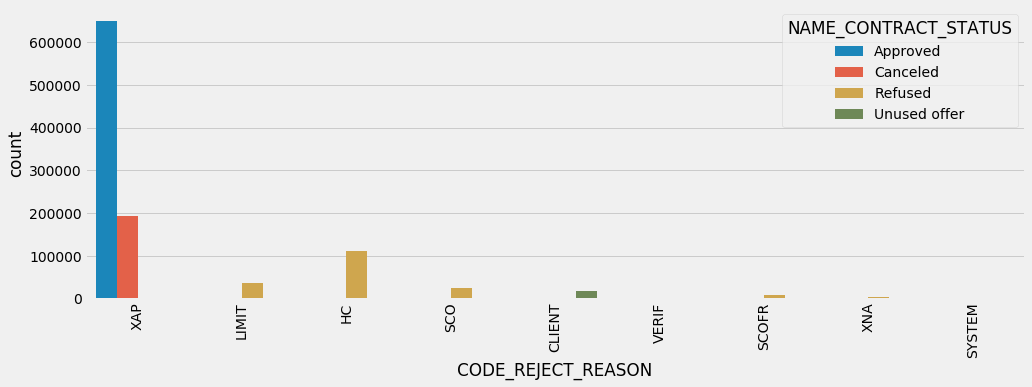

In [244]:
# Countplot with respect to NAME_CONTRACT_STATUS

sns.countplot(x= 'CODE_REJECT_REASON', hue = 'NAME_CONTRACT_STATUS', data =df_merge)
plt.xticks(rotation = 90)
plt.show()

* Most of the clients with XAP(a consumer loan has no cashloanpurpose) had their loans approved, while the applications for clients whose prvious application had been rejected(i.e. Limit, Hc, Sco) got their loan refused

#### WEEKDAY_APPR_PROCESS_START_x - On which day of the week did the client apply for the loan

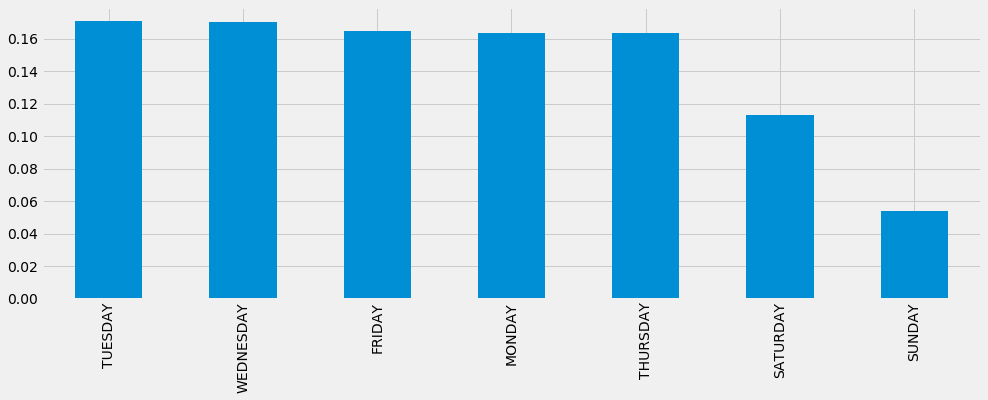

In [245]:

df_merge.WEEKDAY_APPR_PROCESS_START_x.value_counts(normalize=True).plot.bar()
plt.show()

* Maximum clients applied loan on tuesday followed by wesnesday and friday.

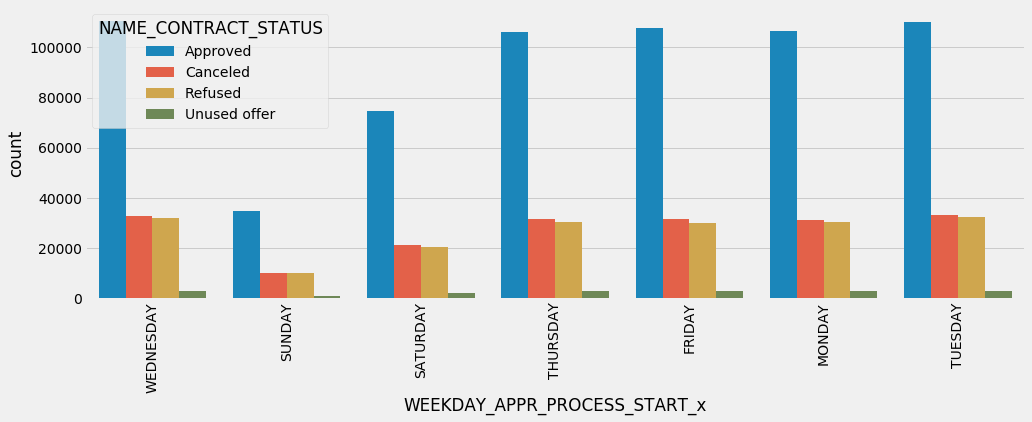

In [246]:
# Countplot with respect to NAME_CONTRACT_STATUS

sns.countplot(x= 'WEEKDAY_APPR_PROCESS_START_x', hue = 'NAME_CONTRACT_STATUS', data =df_merge)
plt.xticks(rotation = 90)
plt.show()

* We can infer that most of the loans were approved on Thursday,Friday,Monday,Tuesday and significant numbers of cancelled and refused offers were also there in these days since most of the clients applied loans on these days only

#### WEEKDAY_APPR_PROCESS_START - On which day of the week did the client apply for previous application

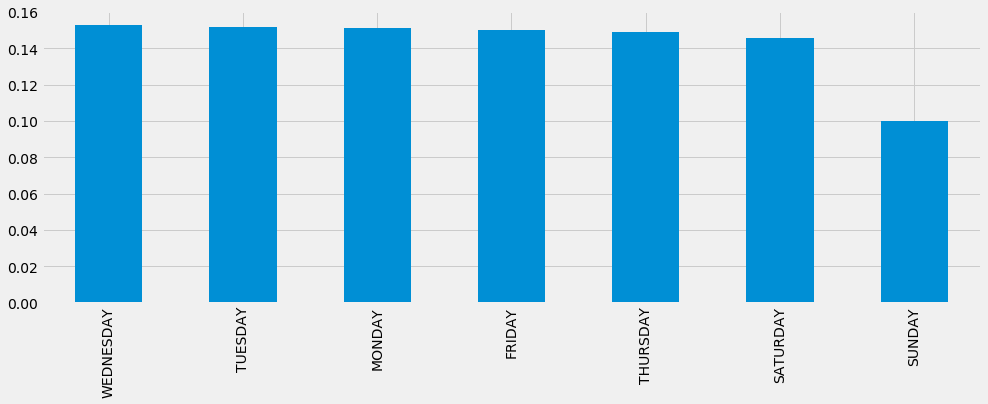

In [247]:
#Ploting of each WEEKDAY_APPR_PROCESS_START_y category.
df_merge.WEEKDAY_APPR_PROCESS_START_y.value_counts(normalize=True).plot.bar()
plt.show()

* Maximum clients applied loan on wesnesday followed by tuesday,monday and friday.

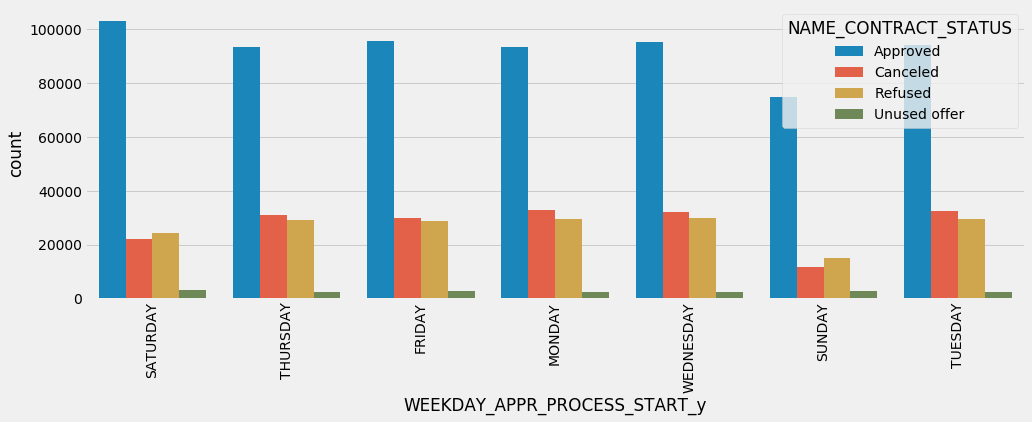

In [248]:
# Countplot with respect to NAME_CONTRACT_STATUS

sns.countplot(x= 'WEEKDAY_APPR_PROCESS_START_y', hue = 'NAME_CONTRACT_STATUS', data =df_merge)
plt.xticks(rotation = 90)
plt.show()

* We can infer that most of the loans were approved on ThursdayThursday,Friday,Monday and significant numbers of cancelled and refused offers were also there in these days since most of the clients applied loans on these days only

#### NAME_CASH_LOAN_PURPOSE - Purpose of the cash loan

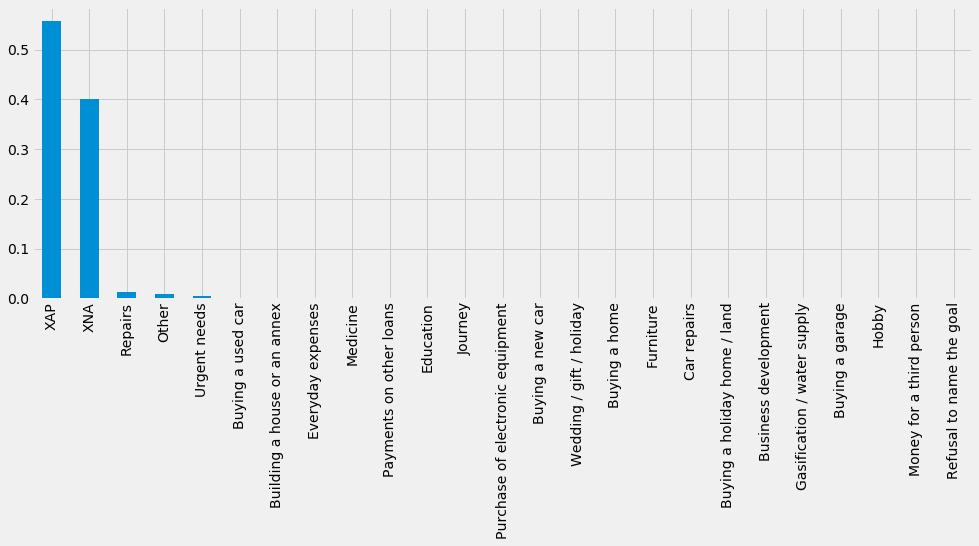

In [249]:

df_merge.NAME_CASH_LOAN_PURPOSE.value_counts(normalize=True).plot.bar()
plt.show()

* Most clients don't had any reasons (i.e,XNA = not available,XAP = not applicable)

#### CHANNEL_TYPE - Through which channel we acquired the client on the previous application

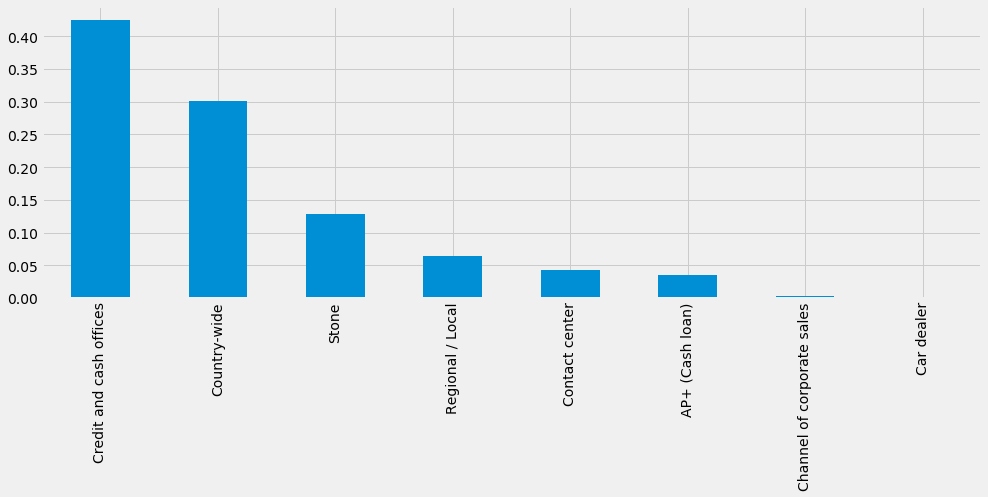

In [250]:

df_merge.CHANNEL_TYPE.value_counts(normalize=True).plot.bar()
plt.show()

* Most clients took loan from Credit and cash offices followed by Country wise offices.

#### NFLAG_INSURED_ON_APPROVAL - Did the client requested insurance during the previous application

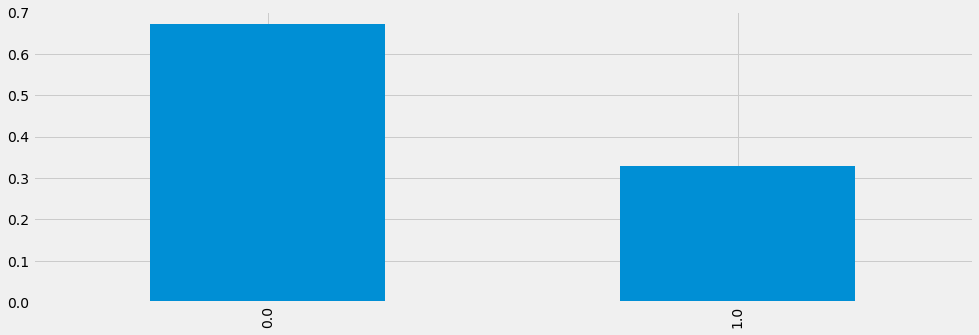

In [251]:

df_merge.NFLAG_INSURED_ON_APPROVAL.value_counts(normalize=True).plot.bar()
plt.show()

* Most of the clients had not requested insurance during the previous application were very few requested insurance during the previous application.

#### NAME_CLIENT_TYPE - Was the client old or new client when applying for the previous application

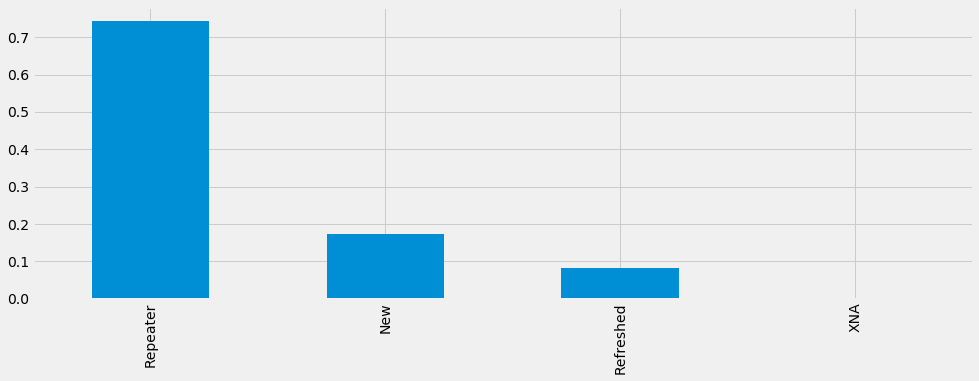

In [252]:

df_merge.NAME_CLIENT_TYPE.value_counts(normalize=True).plot.bar()
plt.show()

* Most of  the clients were Repeater  when applying loan for the previous application than newer clients

#### multiple plots

In [253]:
features =['NAME_CONTRACT_TYPE_x','NAME_FAMILY_STATUS','CNT_FAM_MEMBERS','WEEKDAY_APPR_PROCESS_START_x','NAME_CONTRACT_TYPE_y','WEEKDAY_APPR_PROCESS_START_y','NAME_CASH_LOAN_PURPOSE','CODE_REJECT_REASON','CHANNEL_TYPE','NFLAG_INSURED_ON_APPROVAL','NAME_CLIENT_TYPE']
list(enumerate(features))

[(0, 'NAME_CONTRACT_TYPE_x'),
 (1, 'NAME_FAMILY_STATUS'),
 (2, 'CNT_FAM_MEMBERS'),
 (3, 'WEEKDAY_APPR_PROCESS_START_x'),
 (4, 'NAME_CONTRACT_TYPE_y'),
 (5, 'WEEKDAY_APPR_PROCESS_START_y'),
 (6, 'NAME_CASH_LOAN_PURPOSE'),
 (7, 'CODE_REJECT_REASON'),
 (8, 'CHANNEL_TYPE'),
 (9, 'NFLAG_INSURED_ON_APPROVAL'),
 (10, 'NAME_CLIENT_TYPE')]

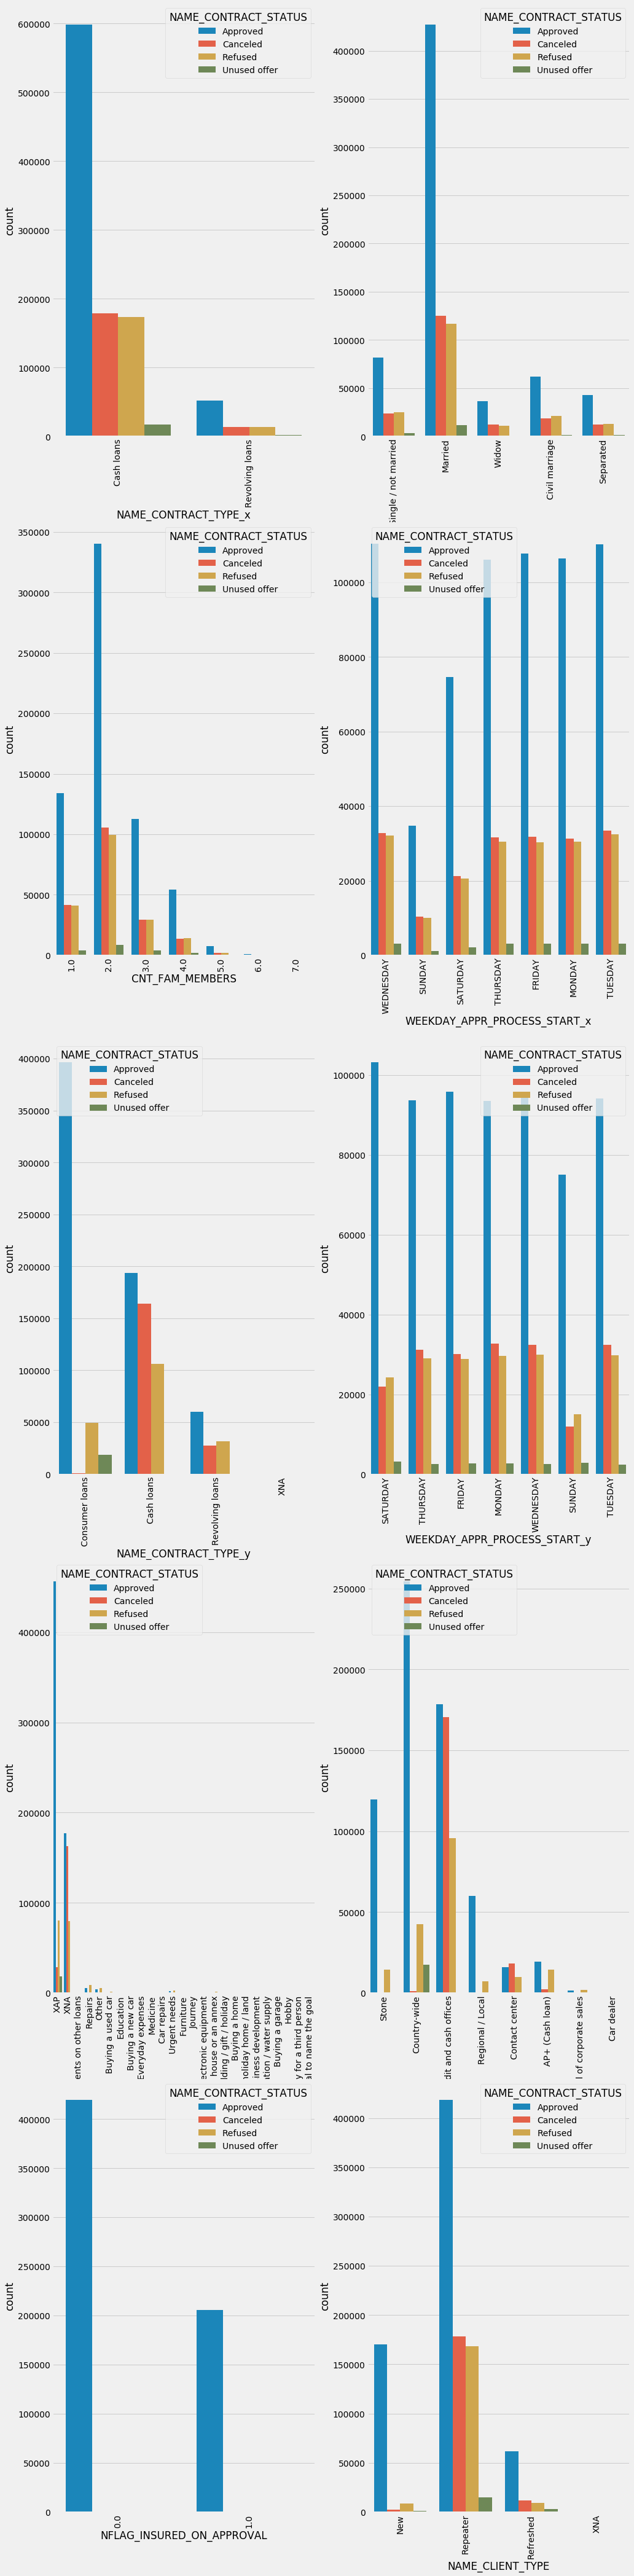

In [254]:
features = ['NAME_CONTRACT_TYPE_x','NAME_FAMILY_STATUS','CNT_FAM_MEMBERS','WEEKDAY_APPR_PROCESS_START_x','NAME_CONTRACT_TYPE_y','WEEKDAY_APPR_PROCESS_START_y','NAME_CASH_LOAN_PURPOSE','CHANNEL_TYPE','NFLAG_INSURED_ON_APPROVAL','NAME_CLIENT_TYPE']
plt.figure(figsize = (15, 70))
for i in enumerate(features):
    plt.subplot(5, 2, i[0]+1)
    sns.countplot(x = i[1], hue = 'NAME_CONTRACT_STATUS', data = df_merge)
    plt.xticks(rotation = 90)

#### Bivariate analysis 

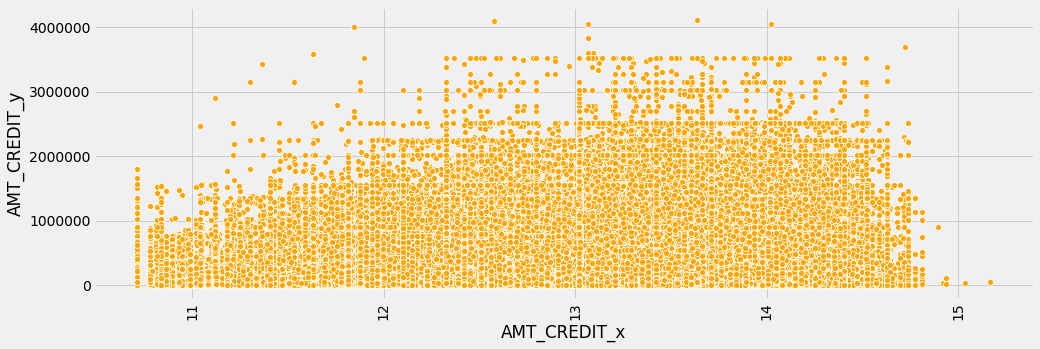

In [255]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 5)
sns.scatterplot(df_merge['AMT_CREDIT_x'],
            df_merge['AMT_CREDIT_y'],
            color = 'orange',
            )

plt.xticks(rotation = 90)
plt.show()

* we can see that credit amount on AMT_CREDIT_x is more and less in range 20lakh.
* credit is more in current than previous

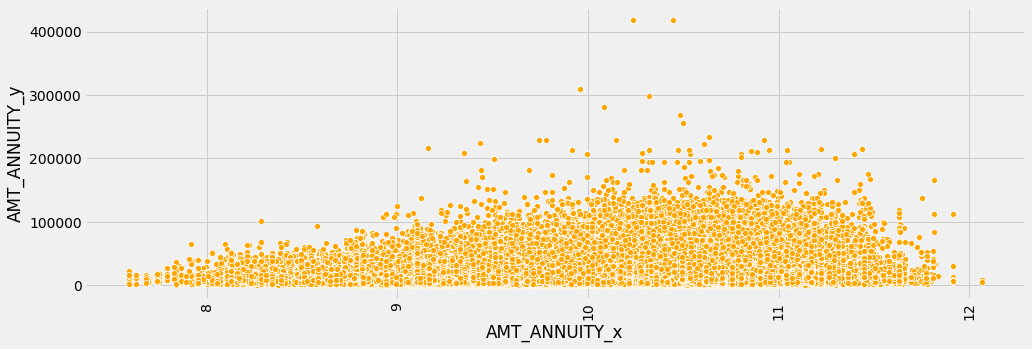

In [256]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 5)
sns.scatterplot(df_merge['AMT_ANNUITY_x'],
            df_merge['AMT_ANNUITY_y'],
            color = 'orange',
            )

plt.xticks(rotation = 90)
plt.show()

* annuity in current is more than previous application process

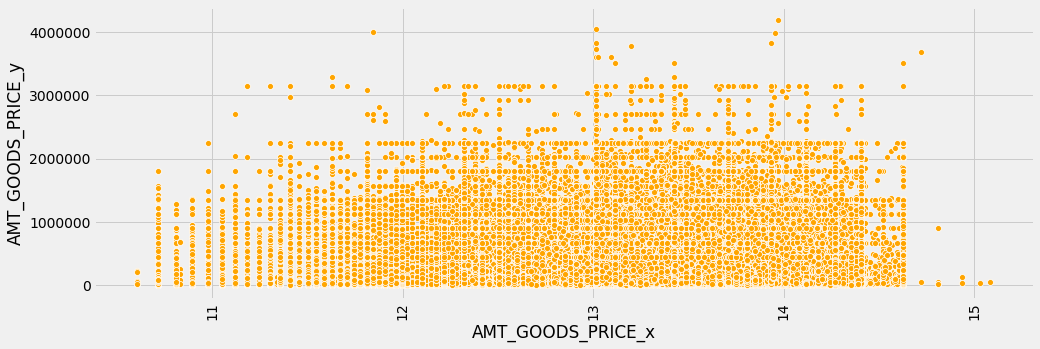

In [257]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 5)
sns.scatterplot(df_merge['AMT_GOODS_PRICE_x'],
            df_merge['AMT_GOODS_PRICE_y'],
            color = 'orange',
            )

plt.xticks(rotation = 90)
plt.show()

* goods price is more in current than previous application process

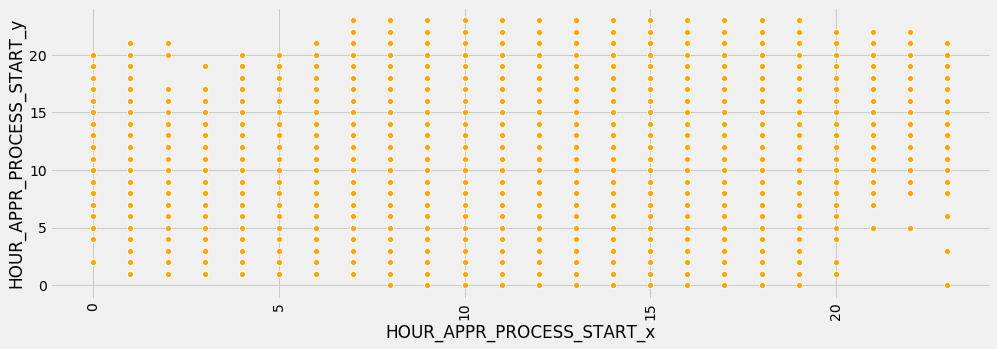

In [258]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 5)
sns.scatterplot(df_merge['HOUR_APPR_PROCESS_START_x'],
            df_merge['HOUR_APPR_PROCESS_START_y'],
            color = 'orange',
            )

plt.xticks(rotation = 90)
plt.show()


* seems no change in repeating more than 1 application in current as well as previous

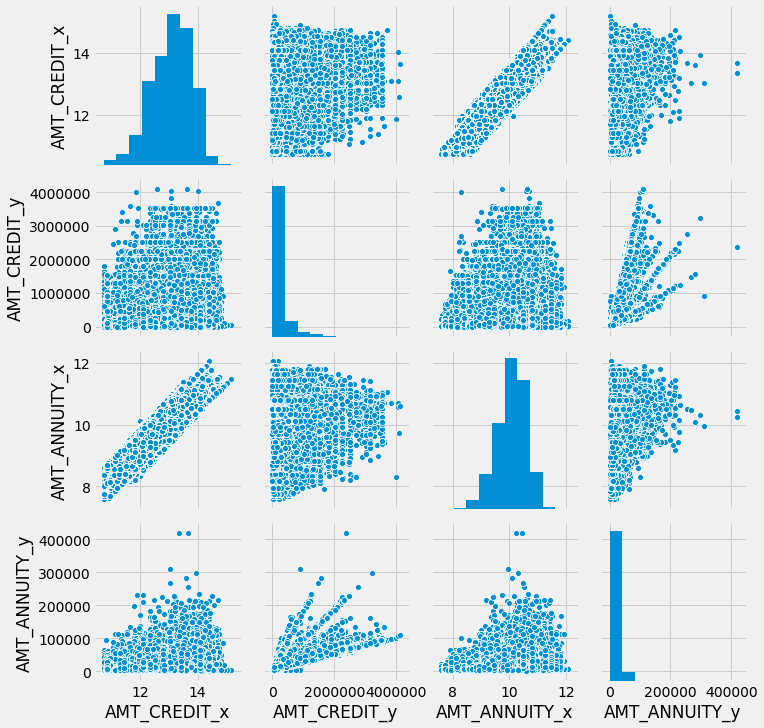

In [259]:

sns.pairplot(data = df_merge, vars = ['AMT_CREDIT_x','AMT_CREDIT_y','AMT_ANNUITY_x','AMT_ANNUITY_y'])
plt.show()

* we can understand a better view to acknowledge the data set

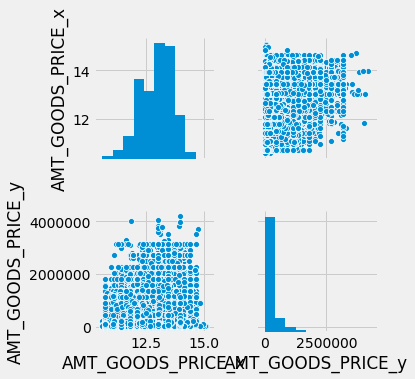

In [260]:

sns.pairplot(data = df_merge, vars = ['AMT_GOODS_PRICE_x','AMT_GOODS_PRICE_y'])
plt.show()

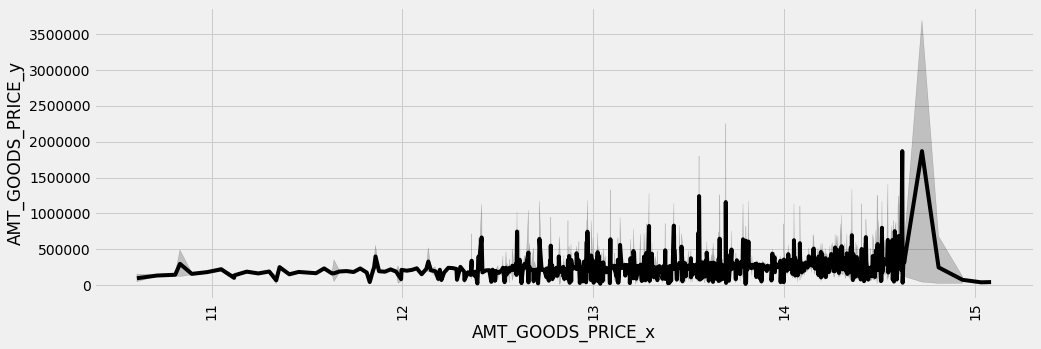

In [261]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 5)
sns.lineplot(df_merge['AMT_GOODS_PRICE_x'],
              df_merge['AMT_GOODS_PRICE_y'],
                color = 'black')

plt.xticks(rotation = 90)
plt.show()

* in previous application consumer loan is there but in current application only cash loans and revolving loan is there 
* so, we can infer that at beging both are same but at end current application holds more than previous

#### So, from this analysis we can see that current applicants of same or repeted clients were applied more that new once. And due to certain parameters like NAME_EDUCATION_TYPE, NAME_HOUSING_TYPE, CNT_FAM_MEMBERS, ORGANIZATION_TYPE, REGION_RATING_CLIENT_W_CITY
 